# **Market Insider - Data Science Batch 38**
### **Anggota:**
1. Achmad Hilman Shadiqin
2. Figo Akmal Munir
3. Andreawan Sofian
4. Nabilah Astiarini
5. Dzakwan Darussalam
6. Riyan Maula


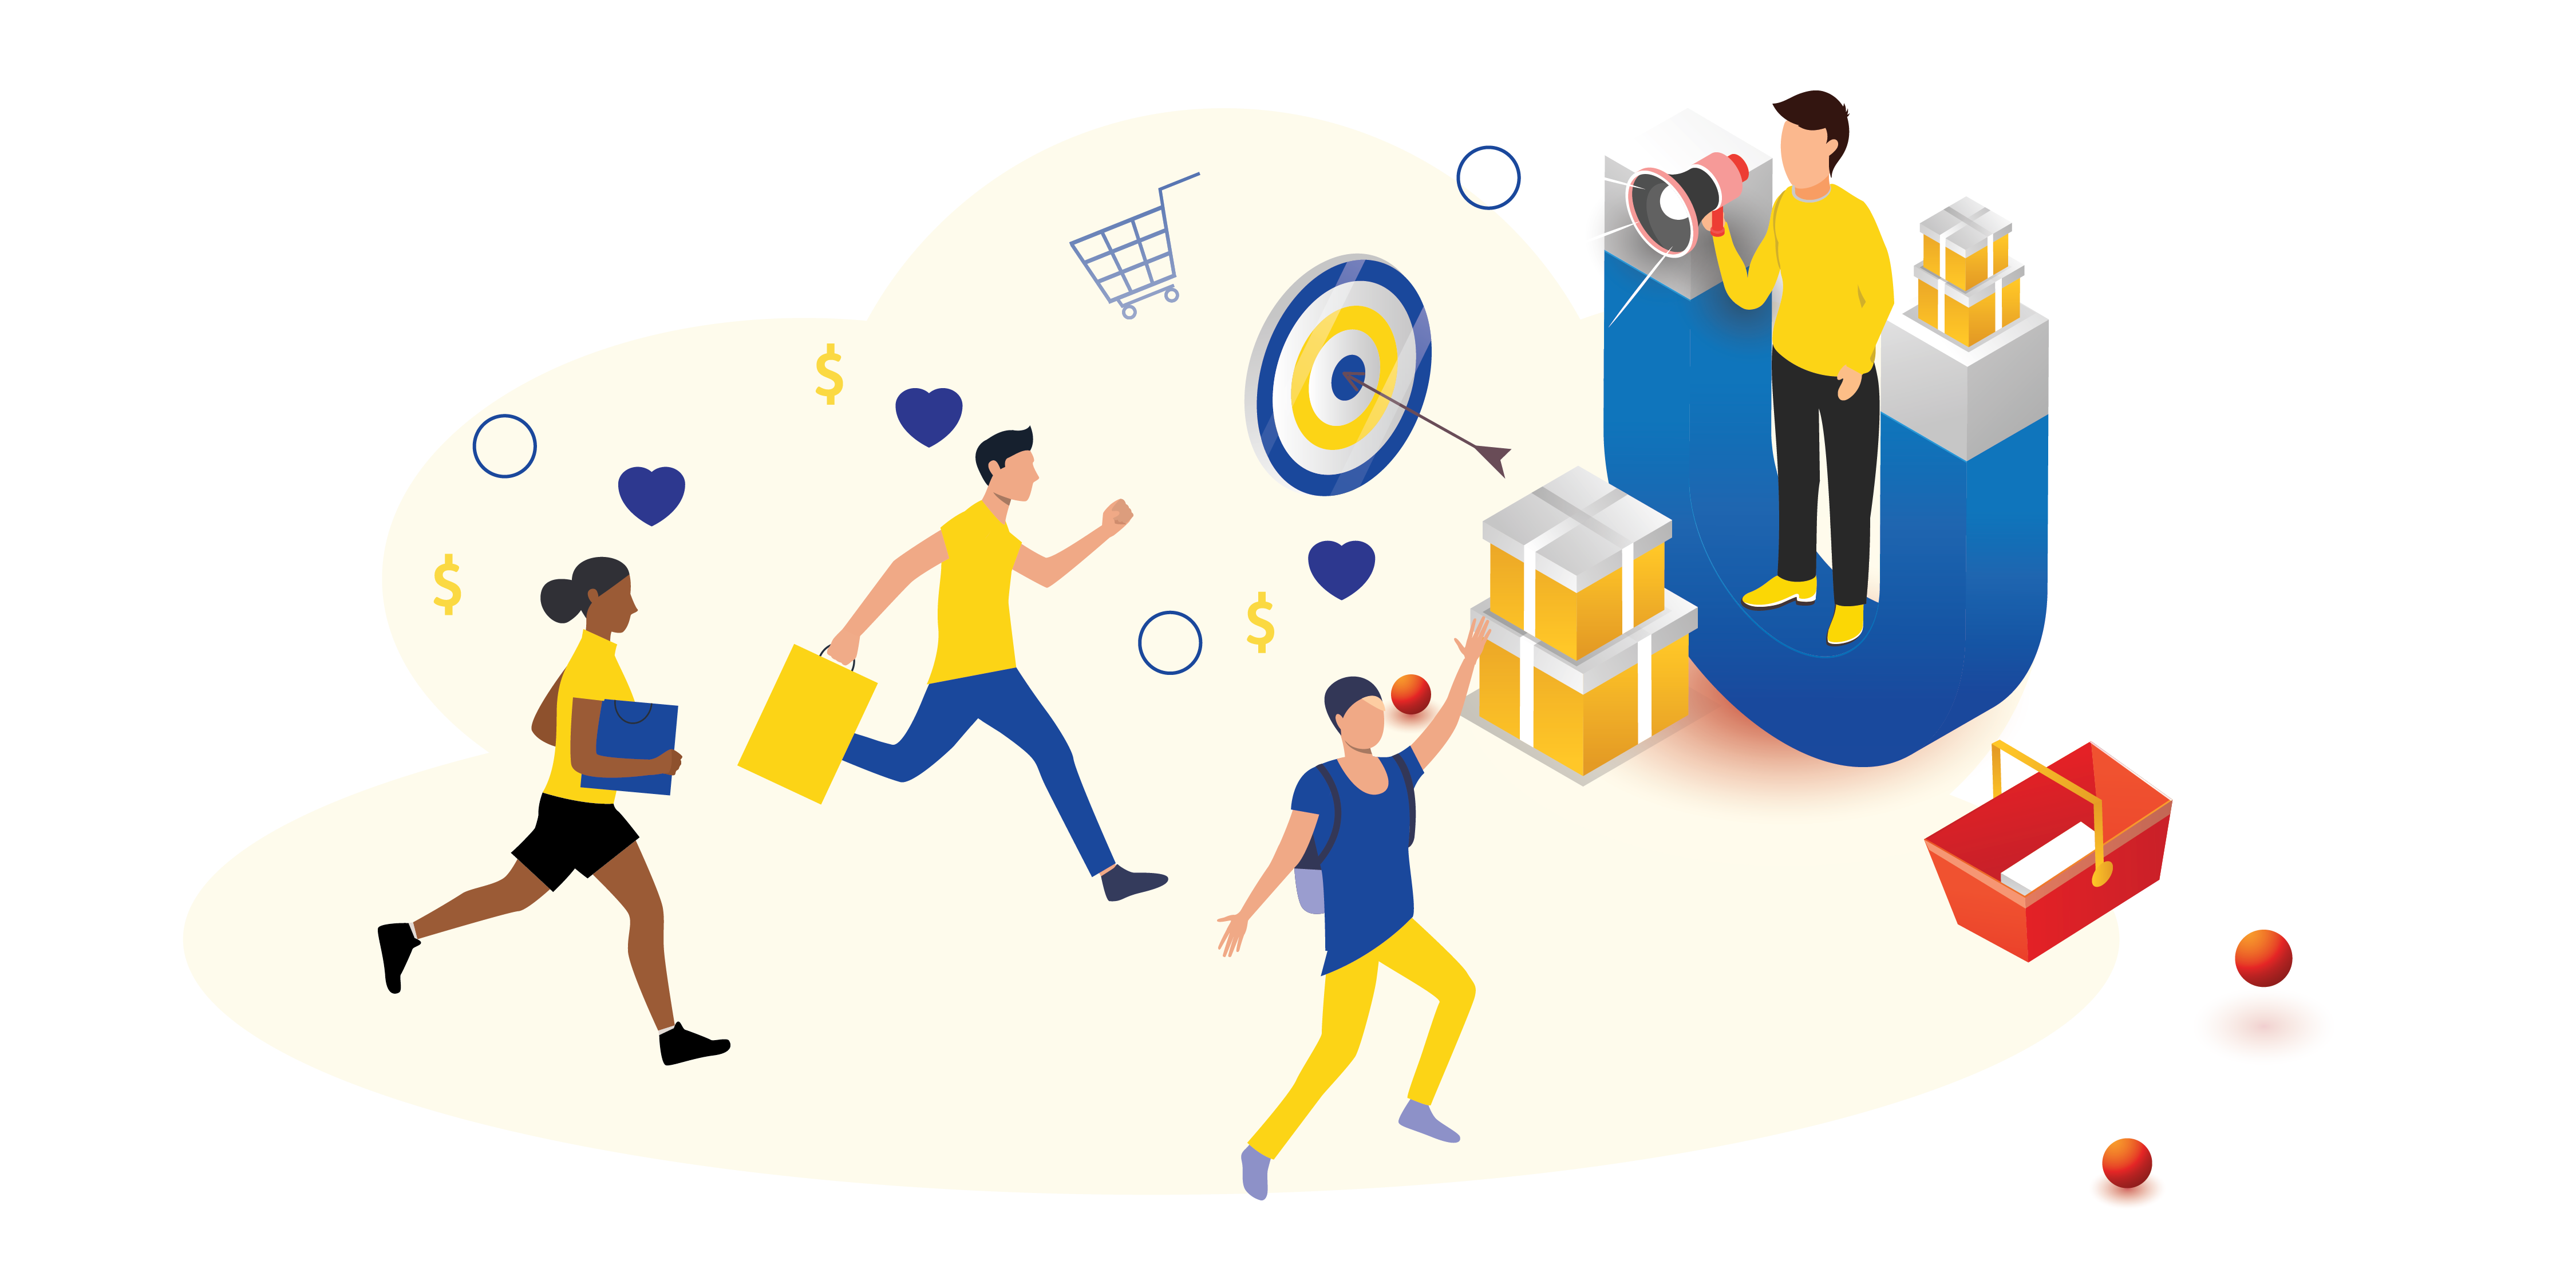

### **Table of Contents** <a id=100></a>
1. [Introduction](#1)
2. [Imports](#2)
3. [EDA + Business Insights](#3)
    - 3.1 [Descriptive Statistics](#3.1)
    - 3.2 [Univariate Analysis](#3.2)
    - 3.3 [Multivariate Analysis](#3.3)
    - 3.4 [Business Insights](#3.4)
4. [Data Pre-Processing](#4)
    - 4.1 [Splitting Data](#4.1)
    - 4.2 [Handling Missing Values](#4.2)
    - 4.3 [Handling Duplicates Values](#4.3)
    - 4.4 [Handling Outliers](#4.4)
    - 4.5 [Handling Invalid Values](#4.5)
    - 4.6 [Feature Extraction](#4.6)
    - 4.7 [Feature Encoding](#4.7)
    - 4.8 [Feature Transformation](#4.8)
    - 4.9 [Feature Selection](#4.9)
    - 4.10 [Imbalance Handling](#4.10)
5. [Machine Learning Modelling & Evaluation](#5)
    - 5.1 [Modeling & Evaluation](#5.1)
        - 5.1.1 [Default Parameter](#5.1.1)
        - 5.1.2 [Hyper Tuning Parameter](#5.1.2)
    - 5.2 [Business Simulation & Recommendation](#5.2)
        - 5.1.1 [Business Simulation](#5.2.1)
        - 5.1.2 [Business Recommendation](#5.2.2)

# **1. Introduction** <a id=1></a>
[back to top](#100)

### **Problem Statement**

A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service

### **Attributes**

**People**

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if customer complained in the last 2 years, 0 otherwise

**Products**

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

* NumDealsPurchases: Number of purchases made with a discount
* NumWebPurchases: Number of purchases made through the company’s web site
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s web site in the last month

### **Acknowledgements**
O. Parr-Rud. Business Analytics Using SAS Enterprise Guide and SAS Enterprise Miner. SAS Institute, 2014.

### **Inspiration**
The main objective is to train a predictive model which allows the company to maximize the profit of the next marketing campaign.

# **2. Imports Dataset** <a id=2></a>
[back to top](#100)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import dan backup raw dataset
raw_data = pd.read_csv('marketing_campaign.csv', sep=';')
data = raw_data.copy()
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

# **3. EDA + Business Insights** <a id=3></a>
[back to top](#100)


## **3.1 Data Overview** <a id=3.1></a>

In [ ]:
# menampilkan informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# total unique values setiap feature
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [ ]:
# Z_CostContact adalah jumlah biaya yang digunakan di setiap kampanye, karena semua nilainya sama di semua pelanggan, maka tidak dapat digunakan dalam analisis
# Z_Revenue adalah jumlah pendapatan yang dihasilkan oleh setiap kampanye, karena semua nilainya sama di semua pelanggan, maka tidak dapat digunakan dalam analisis
# ID adalah CustomerID, karena semua pelanggan adalah unik, maka tidak dapat digunakan dalam analisis
data.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [ ]:
# identifikasi missing values
pct_missing_values = data.isnull().sum().sum()/data.shape[0]*100
print(f'Total % Missing Values: {pct_missing_values:.2f}%')

Total % Missing Values: 1.07%


In [ ]:
# identifikasi duplicated
pct_duplicates = data[data.duplicated()].shape[0]/data.shape[0]*100
print(f'Total % Duplicated Rows: {pct_duplicates:.2f}%')

Total % Duplicated Rows: 8.12%


In [ ]:
# mengubah tipe data Dt_customer dari object menjadi datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [ ]:
# memisahkan feature berdasarkan tipe data
numeric_cols = []
object_cols = []
datetime_cols = []

# melakukan perulangan setiap feature sesuai dengan tipe data
for col in data.columns:
    if data[col].dtype == 'int64' or data[col].dtype == 'float64':
        numeric_cols.append(col)
    elif data[col].dtype == 'object':
        object_cols.append(col)
    else:
        datetime_cols.append(col)

# print hasilnya yang disimpan pada masing-masing feature
print(f'Total Numeric Columns : {len(numeric_cols)}')
print(f'Total Object Columns  : {len(object_cols)}')
print(f'Total Datetime Columns: {len(datetime_cols)}')

Total Numeric Columns : 23
Total Object Columns  : 2
Total Datetime Columns: 1


In [ ]:
# memisahkan feature berdasarkan klasifikasinya
personal_cols = []
spending_cols = []
purchase_cols = []
campaign_cols = []

# melakukan perulangan setiap feature sesuai dengan klasifikasinya
for col in data.columns:
    if col in 'Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, Complain':
        personal_cols.append(col)
    elif col in 'MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds':
        spending_cols.append(col)
    elif col in 'NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth':
        purchase_cols.append(col)
    elif col in 'AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response, NumDealsPurchases':
        campaign_cols.append(col)

# mengurutkan hasilnya sesuai dengan alphabet
personal_cols.sort()
spending_cols.sort()
purchase_cols.sort()
campaign_cols.sort()

# print hasilnya yang disimpan pada masing-masing feature
print(f'Personal Columns: {personal_cols}')
print(f'Spending Columns: {spending_cols}')
print(f'Purchase Columns: {purchase_cols}')
print(f'Campaign Columns: {campaign_cols}')

Personal Columns: ['Complain', 'Dt_Customer', 'Education', 'Income', 'Kidhome', 'Marital_Status', 'Recency', 'Teenhome', 'Year_Birth']
Spending Columns: ['MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts', 'MntWines']
Purchase Columns: ['NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth']
Campaign Columns: ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']


## **3.2 Statistical Analysis** <a id=3.2></a>

In [ ]:
# descriptive statistics pada feature bertipe data numerik
data[numeric_cols].describe(percentiles=list(np.linspace(0.1, 0.9,9))).T

count          mean           std     min      10%  \
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1952.0   
Income               2216.0  52247.251354  25173.076661  1730.0  24117.5   
Kidhome              2240.0      0.444196      0.538398     0.0      0.0   
Teenhome             2240.0      0.506250      0.544538     0.0      0.0   
Recency              2240.0     49.109375     28.962453     0.0      9.0   
MntWines             2240.0    303.935714    336.597393     0.0      6.0   
MntFruits            2240.0     26.302232     39.773434     0.0      0.0   
MntMeatProducts      2240.0    166.950000    225.715373     0.0      7.0   
MntFishProducts      2240.0     37.525446     54.628979     0.0      0.0   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      0.0   
MntGoldProds         2240.0     44.021875     52.167439     0.0      3.0   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.0   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      1.0   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.0   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      2.0   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      2.0   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.0   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.0   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.0   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.0   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.0   
Complain             2240.0      0.009375      0.096391     0.0      0.0   
Response             2240.0      0.149107      0.356274     0.0      0.0   

                         20%      30%      40%      50%      60%      70%  \
Year_Birth            1957.0   1962.0   1966.0   1970.0   1973.0   1976.0   
Income               32011.0  38198.5  44529.0  51381.5  58482.0  65247.5   
Kidhome                  0.0      0.0      0.0      0.0      1.0      1.0   
Teenhome                 0.0      0.0      0.0      0.0      1.0      1.0   
Recency                 19.0     29.0     39.0     49.0     59.0     69.0   
MntWines                16.0     34.0     81.0    173.5    284.4    418.6   
MntFruits                1.0      2.0      4.0      8.0     15.0     25.0   
MntMeatProducts         12.0     20.0     35.0     67.0    108.4    177.0   
MntFishProducts          2.0      3.0      7.0     12.0     20.0     37.0   
MntSweetProducts         1.0      2.0      5.0      8.0     14.0     26.0   
MntGoldProds             6.0     11.0     17.0     24.0     34.0     46.0   
NumDealsPurchases        1.0      1.0      1.0      2.0      2.0      3.0   
NumWebPurchases          2.0      2.0      3.0      4.0      4.0      5.0   
NumCatalogPurchases      0.0      1.0      1.0      2.0      2.0      4.0   
NumStorePurchases        3.0      3.0      4.0      5.0      6.0      7.0   
NumWebVisitsMonth        3.0      4.0      5.0      6.0      6.0      7.0   
AcceptedCmp3             0.0      0.0      0.0      0.0      0.0      0.0   
AcceptedCmp4             0.0      0.0      0.0      0.0      0.0      0.0   
AcceptedCmp5             0.0      0.0      0.0      0.0      0.0      0.0   
AcceptedCmp1             0.0      0.0      0.0      0.0      0.0      0.0   
AcceptedCmp2             0.0      0.0      0.0      0.0      0.0      0.0   
Complain                 0.0      0.0      0.0      0.0      0.0      0.0   
Response                 0.0      0.0      0.0      0.0      0.0      0.0   

                         80%      90%       max  
Year_Birth            1979.0   1984.0    1996.0  
Income               71819.0  79844.0  666666.0  
Kidhome                  1.0      1.0       2.0  
Teenhome                 1.0      1.0       2.0  
Recency                 79.0     89.0      99.0  
MntWines               581.2    822.1    1493.0 

In [ ]:
# descriptive statistics pada feature bertipe data object/categorical
data[object_cols].describe().T

count unique         top  freq
Education       2240      5  Graduation  1127
Marital_Status  2240      8     Married   864

In [ ]:
# descriptive statistics pada feature bertipe data datetime
data.describe(include='datetime').T

count unique        top freq      first       last
Dt_Customer  2240    663 2012-08-31   12 2012-07-30 2014-06-29

### **Insight Data Overview & Statistical Analysis**

1. **Tipe Data Pada Dataset**

   - Terdapat 26 Feature bertipe data numerik (`integer` atau `float`)
   - Terdapat 3 Feature bertipe data kategori (`object`)

2. **Missing Values dan Duplicates**

   - 1.07% missing values terletak pada Feature `Income`
   - 8.12% duplicates

3. **Feature dengan Tipe Data Tidak Sesuai:**

   - Feature `Dt_Customer` merupakan tanggal registrasi pelanggan dengan tipe data object. Perlu diubah menjadi tipe Date Time.

4. **Feature dengan Summary Aneh:**

   - Feature `ID` memiliki jumlah nilai unik yang sama dengan jumlah baris dataset (2240), sehingga tidak memungkinkan untuk mengamati riwayat perjalanan pelanggan.
   - Feature `Z_CostContact` dan `Z_Revenue`, masing-masing adalah cost dan revenue karena setiap campaign adalah unique maka tidak dapat digunakan dalam analisa.
   - Feature `Dt_Customer`, pelanggan paling terakhir melakukan registrasi di 29 Juni 2014, maka dengan asumsi saat ini adalah tahun 2014, ada keanehan pada Feature `Year_Birth` dimana tahun lahir tertua ada di tahun **1893** atau **usia pelanggan 121 tahun**. Hal ini merupakan hal yang kurang masuk akal. Diduga terdapat kesalahan input tahun lahir oleh pelanggan/kesalahan pencatatan oleh sistem.
   - Feature `Income` memiliki nilai maksimum mencapai ratusan ribu (**666,666**), sedangkan nilai ukuran pemusatan dan penyebarannya hanya mencapai puluhan ribu. Diduga nilai ini merupakan outlier yang disebabkan karena kesalahan input atau pencatatan oleh sistem.
   - Beberapa Feature seperti `MntFishProducts`, `MntFruits`, `MntGoldProds`, `MntMeatProducts`, `MntSweetProducts`, `MntWines` memiliki nilai maksimum yang jauh dari ukuran pemusatan atau penyebaran lainnya, menunjukkan adanya outlier, namun hal ini perlu dipertimbangkan kembali dari konteks bisnis apakah wajar atau tidaknya pembelian dalam jumlah tersebut.
   - Feature `Marital Status` memiliki 8 nilai unik dan Feature `Education` memiliki 5 nilai unik.
   - Terdapat invalid values pada Feature `Marital_Status` seperti `YOLO`, `Alone`, dan `Absurd`. Dan pada Feature `Education` yaitu `Basic` dan `2n Cycle`, apakah termasuk dalam level pendidikan formal atau bukan.

## **3.3 Univariate Analysis** <a id=3.3></a>

### **3.3.1 Distribution of Numerical Feature** <a id=3.3.1></a>

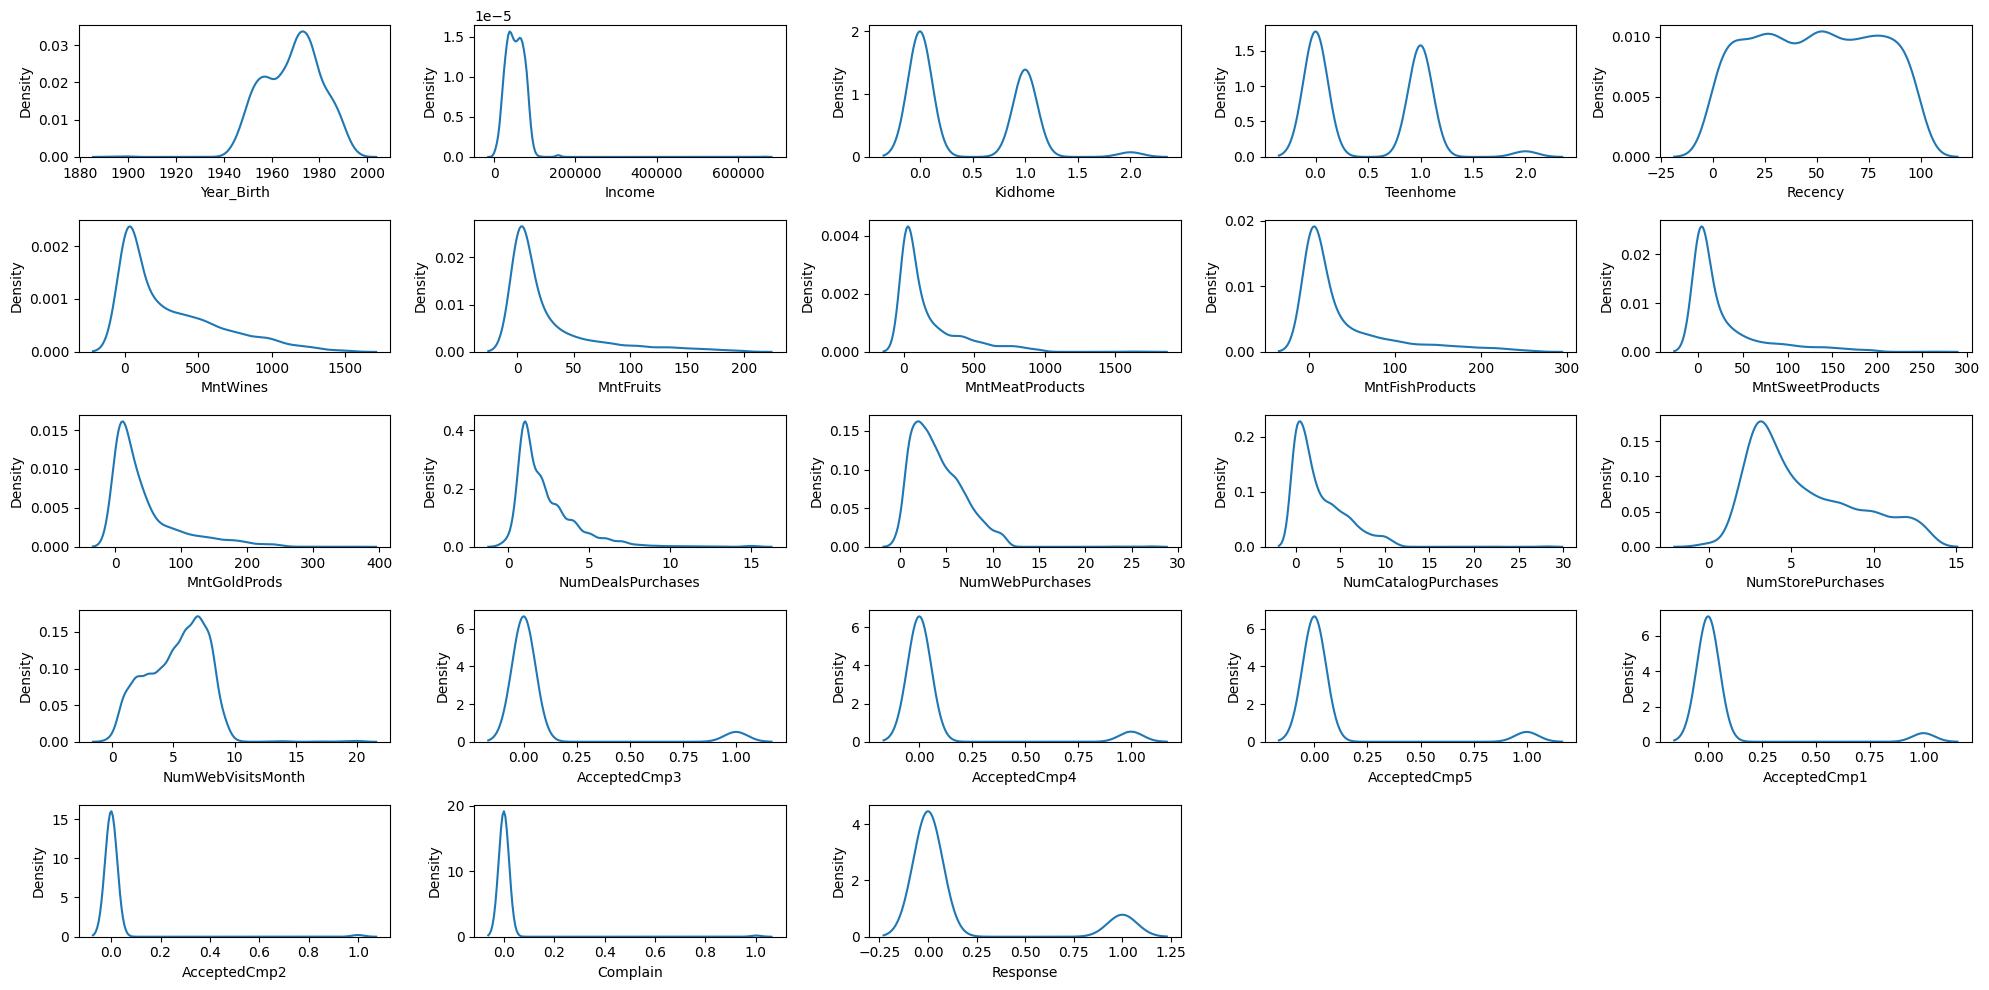

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(0, len(numeric_cols)):
    plt.subplot(5, 5, i + 1)
    sns.kdeplot(data[numeric_cols[i]])
    plt.tight_layout()

plt.show()

#### **Insight Distribusi Data:**

   - **Normal Distribution:**
     - `Recency` memiliki distribusi yang mirip dengan distribusi normal.
   - **Left-Skewed Distribution:**
     - `Year_Birth` menunjukkan kecondongan ke kiri dengan median yang lebih tinggi daripada mean.
   - **Right-Skewed Distribution:**
     - `Income` dan beberapa features terkait pembelian produk menunjukkan kecondongan ke kanan, dengan mean yang lebih tinggi daripada median.
   - **Bimodal Distribution:**
     - `Kidhome` dan `Teenhome` menunjukkan dua puncak dalam distribusinya.
   - **Binary Dominated Distribution:**
     - Beberapa features campaign (`AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, dan `Responsee`) didominasi oleh nilai 0.

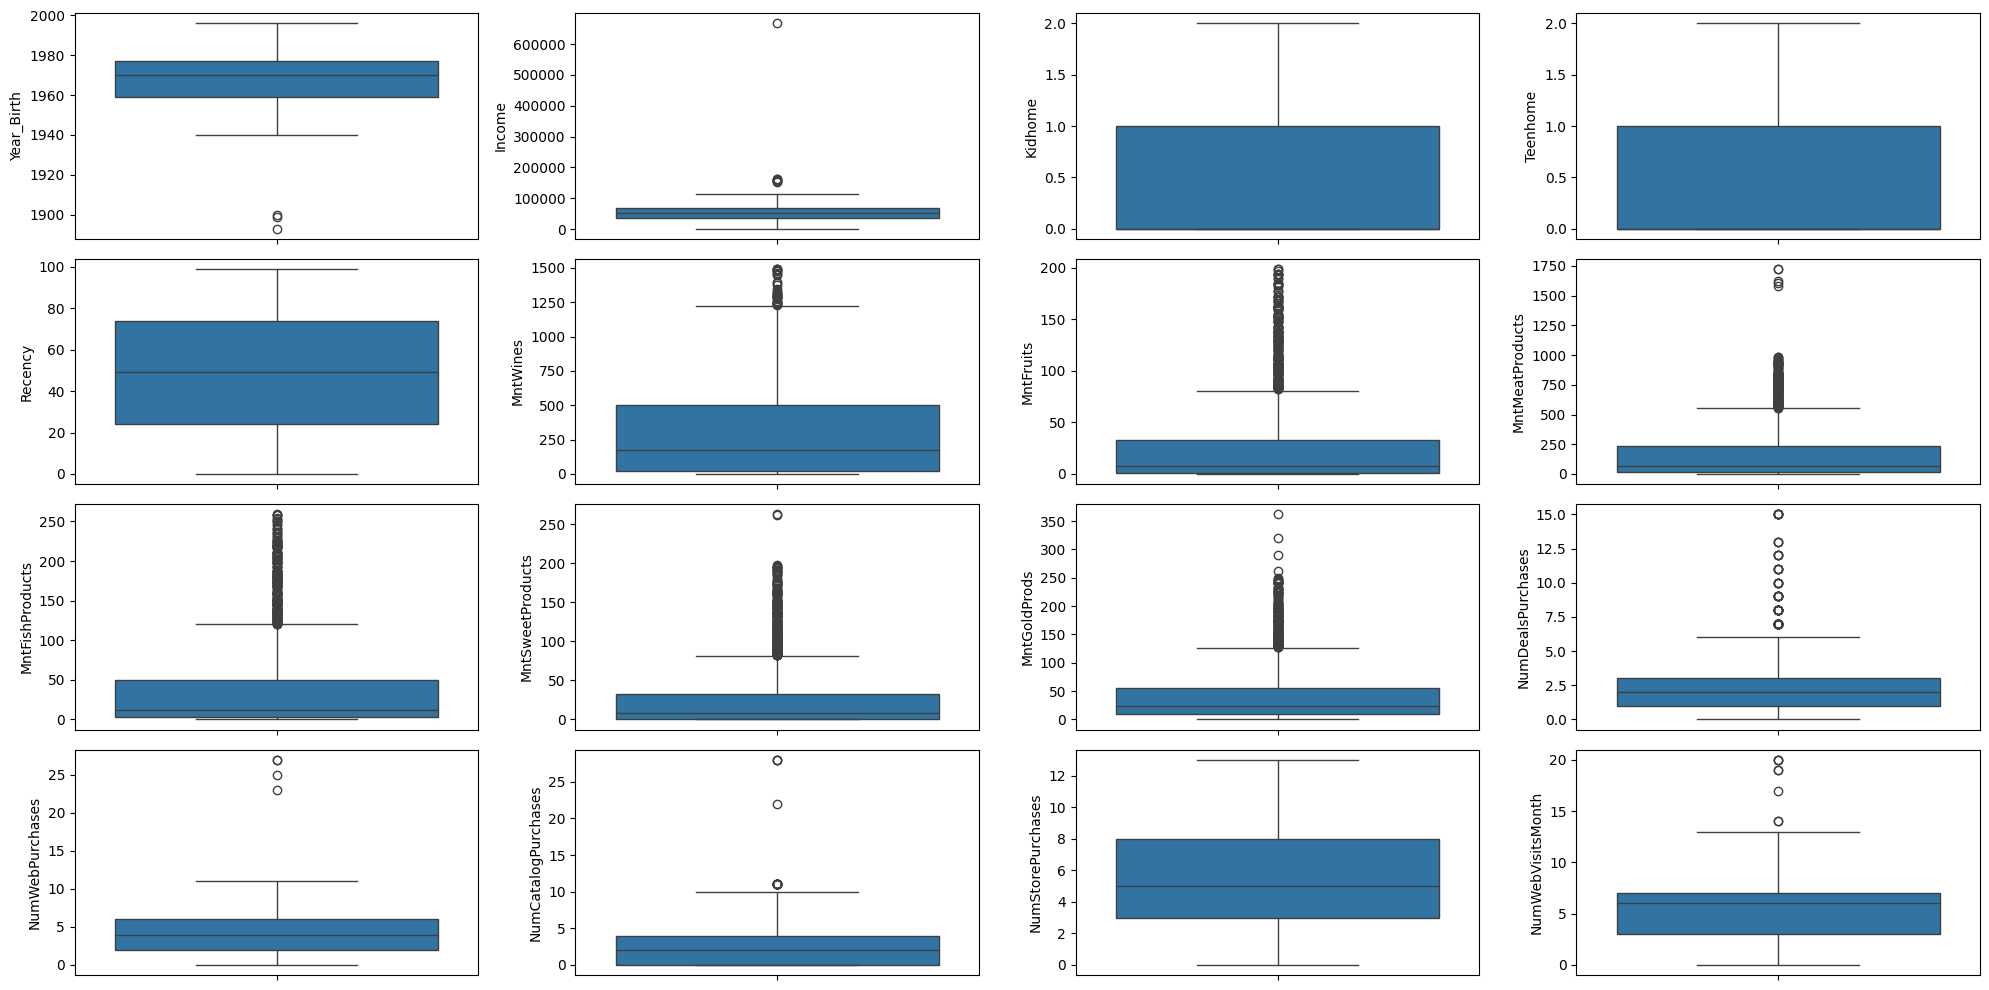

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(0, len(numeric_cols[:-7])):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=data[numeric_cols[i]])
    plt.tight_layout()

#### **Insight Box Plot:**

   - `Year_Birth` dan `Income` memiliki outlier seperti yang telah dijelaskan pada bagian sebelumnya, yakni pada angka **666.666** (`Income`) dan **1893** (`Year_Birth`).
   - Beberapa features terkait pembelian produk dan aktivitas pembelian memiliki banyak nilai outlier pada nilai tinggi, menunjukkan variasi yang signifikan dalam pola pembelian atau aktivitas pelanggan.

### **3.3.2 Distribution of Categorical Feature** <a id=3.3.2></a>

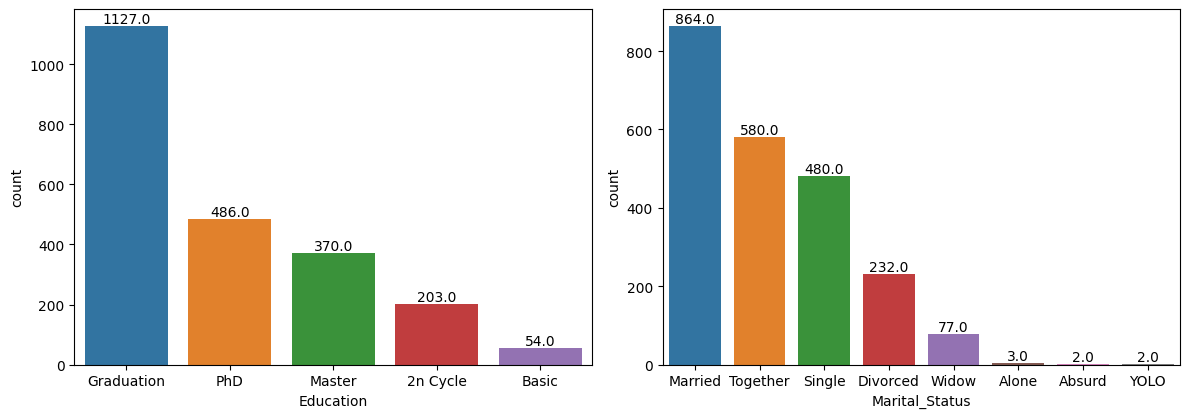

In [ ]:
# setup ukuran figure
plt.figure(figsize=(12, 8))

# iterasi untuk setiap Feature objek
for i in range(0, len(object_cols)):
    # mendapatkan urutan kategori berdasarkan jumlah masing-masing
    order = raw_data[object_cols[i]].value_counts().index

    # membuat subplot
    plt.subplot(2, len(object_cols), i + 1)

    # countplot dengan urutan kategori yang diinginkan
    ax = sns.countplot(x=raw_data[object_cols[i]], order=order, palette=sns.color_palette())

    # menambahkan label di atas setiap bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    # setup pada xticks
    plt.xticks(rotation=0, ha='center')

plt.tight_layout()
plt.show()

#### **Insight Countplot/Barplot (Categorical Feature):**

   - **Level Pendidikan:**
     - Level Pendidikan: Mayoritas pelanggan memiliki tingkat pendidikan "Graduation," menunjukkan target pasar utama.
   - **Status Perkawinan:**
     - Mayoritas pelanggan memiliki status perkawinan "Married," menunjukkan dominasi pasangan dalam populasi pelanggan.
   - **Pertimbangan Invalid Data:**
     - Seperti dibahas pada bagian sebelumnya adanya data yang tidak valid pada Feature `Marital_Status` dan `Education`.

In [ ]:
# exclude data yang tidak valid seperti Basic dan 2n Cycle pada Education dan Absurd, Alone, YOLO pada Marital Status
filter_data = (data['Education'].isin(['Graduation', 'Master', 'PhD'])) \
    & (data['Marital_Status'].isin(['Single', 'Married', 'Divorced']))

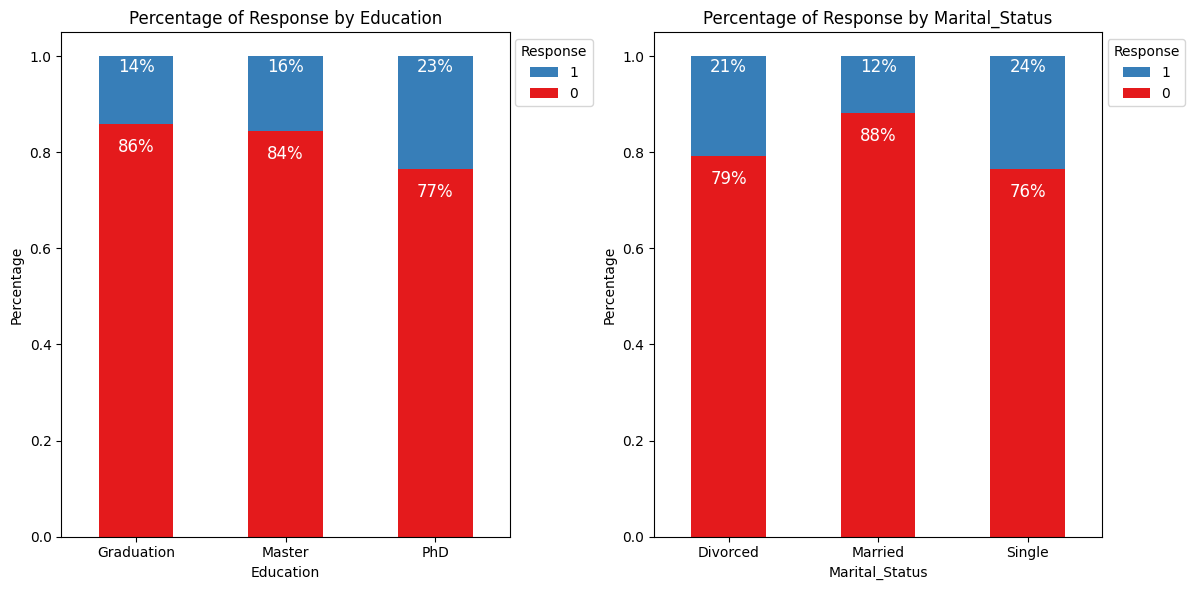

In [ ]:
# 'Education'
education_counts = data[filter_data].groupby(
    'Education')['Response'].value_counts(normalize=True).unstack()
colors = ['#e41a1c', '#377eb8']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

education_counts.plot(kind='bar', stacked=True, color=colors, ax=axes[0])
axes[0].set_title('Percentage of Response by Education')
axes[0].set_ylabel('Percentage')
axes[0].set_xticklabels(education_counts.index, rotation=0, ha='center')

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(reversed(handles), reversed(labels), bbox_to_anchor=(
    1.2, 1), loc='upper right', title='Response')

for p in axes[0].patches:
    if p.get_height() >= 0.5:
        vertical_position = 'bottom' if p.get_height() < 0.5 else 'top'
        axes[0].annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va=vertical_position, xytext=(0, 10 if p.get_height() < 0.5 else -10),
                         fontsize=12, color='white',
                         textcoords='offset points')
for p in axes[0].patches:
    if p.get_height() < 0.5:
        axes[0].annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., 1),
                         ha='center', va='top', xytext=(0, -1),
                         fontsize=12, color='white',
                         textcoords='offset points')

# 'Marital_Status'
marital_counts = data[filter_data].groupby(
    'Marital_Status')['Response'].value_counts(normalize=True).unstack()
marital_counts.plot(kind='bar', stacked=True, color=colors, ax=axes[1])
axes[1].set_title('Percentage of Response by Marital_Status')
axes[1].set_ylabel('Percentage')
axes[1].set_xticklabels(marital_counts.index, rotation=0, ha='center')

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(reversed(handles), reversed(labels), bbox_to_anchor=(
    1.2, 1), loc='upper right', title='Response')

for p in axes[1].patches:
    if p.get_height() >= 0.5:
        vertical_position = 'bottom' if p.get_height() < 0.5 else 'top'
        axes[1].annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va=vertical_position, xytext=(0, 10 if p.get_height() < 0.5 else -10),
                         fontsize=12, color='white',
                         textcoords='offset points')
for p in axes[1].patches:
    if p.get_height() <= 0.5:
        axes[1].annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., 1),
                         ha='center', va='top', xytext=(0, -1),
                         fontsize=12, color='white',
                         textcoords='offset points')

plt.tight_layout()
plt.show()

#### **Insight Percentage of Response (Categorical Feature vs Target):**

- **Tingkat Pendidikan:**
     - Tingkat Response tertintinggi pada Level Pendidikan: PhD (21%), Master (15%), dan Graduation (13%).
     - Persentase response pada Level Pendidikan berbanding lurus, semakin tinggi level pendidikan maka semakin tinggi persentase
     
- **Status Perkawinan:**
     - Tingkat Response tertinggi pada Status Perkawinan: Single (22%), Divorced (21%), dan Married (11%).
     - Persentase response pada Status Perkawinan berbanding terbalik, dimana yang berpasangan (semakin tinggi jumlah anggota keluarga) maka semakin rendah persentasenya.

### **3.2.3 Distribution of Datetime Feature** <a id=3.2.3></a>

In [ ]:
# membuat function untuk menampilkan trend distribusi pelanggan yang melakukan registrasi/enrollment setiap bulannya
def monthly_distribution(data, date_col, figsize=(12, 5)):
    # setup subplot untuk line plot
    fig, ax = plt.subplots(figsize=figsize)

    # resample data dan hitung jumlah bulanan
    monthly_counts = data.resample('M', on=date_col).size()

    # plot line distribusi datetime (per bulan)
    ax.plot(monthly_counts.index, monthly_counts.values,
            marker='o', linestyle='-')
    ax.set_title(f'Customer Registration Distribution Trends')
    ax.set_xlabel(date_col)
    ax.set_ylabel('frekuensi')

    # memutar label pada sumbu x agar lebih mudah dibaca
    plt.xticks(rotation=45)

    # membuat indeks bulanan dari Juli 2012 hingga Juni 2014
    monthly_index = pd.date_range(
        start='2012-07-01', end='2014-06-30', freq='M')

    # melakukan reindex dengan nilai pada variabel monthly_index
    monthly_counts = monthly_counts.reindex(monthly_index, fill_value=0)

    # mengubah format xticklabels menjadi nama bulan-tahun
    month_year_labels = [date.strftime('%b-%Y')
                         for date in monthly_counts.index]
    ax.set_xticks(monthly_counts.index)
    ax.set_xticklabels(month_year_labels)

    # menampilkan plot
    plt.tight_layout()
    plt.show()

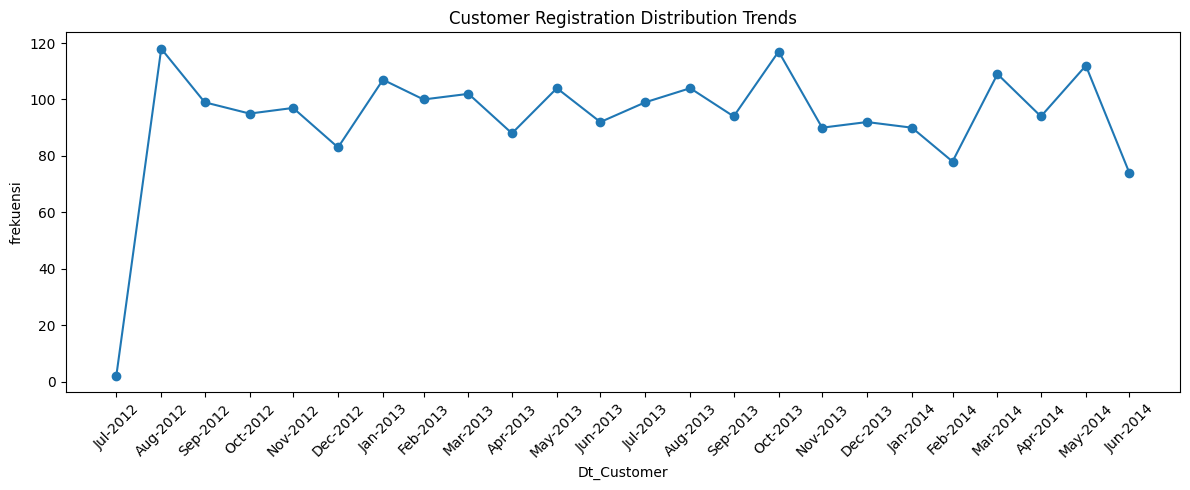

In [ ]:
# memanggil function menampilkan trend pelanggan yang registrasi/enrollment
monthly_distribution(data, 'Dt_Customer')

#### **Insight (Datetime Feature):**

   - Terdapat fluktuasi dalam pendaftaran pelanggan selama periode Juli-2012 hingga Juni-2014.
   - Puncak pendaftaran terjadi pada bulan Agustus-2012 dan Oktober-2013.
   - Tren menunjukkan jumlah pendaftaran yang lebih rendah pada awal dan akhir periode, menunjukkan potensi pola musiman atau faktor lain yang memengaruhi pendaftaran pelanggan.

In [ ]:
# membuat function untuk menampilkan trend distribusi pelanggan yang melakukan registrasi/enrollment setiap bulannya bersadarkan response
def monthly_distribution_response(data, date_col, figsize=(12, 5)):

    # setup subplot untuk line plot
    fig, ax = plt.subplots(figsize=figsize)

    # resample data dan hitung jumlah bulanan untuk response = 0
    monthly_counts_0 = data[data['Response'] == 0].resample('M', on='Dt_Customer').size()

    # plot line distribusi datetime (per bulan) untuk response = 0
    ax.plot(monthly_counts_0.index, monthly_counts_0.values,
            marker='o', linestyle='-', label='Response = 0', color = "#ff0000")

    # resample data dan hitung jumlah bulanan untuk response = 1
    monthly_counts_1 = data[data['Response'] == 1].resample('M', on='Dt_Customer').size()

    # plot line distribusi datetime (per bulan) untuk response = 1
    ax.plot(monthly_counts_1.index, monthly_counts_1.values,
            marker='o', linestyle='-', label='Response = 1', color = "#438cc4")

    # Set title, xlabel, dan ylabel
    ax.set_title('Customer Registration Distribution Trends')
    ax.set_xlabel('Dt_Customer')
    ax.set_ylabel('Frekuensi')

    # memutar label pada sumbu x agar lebih mudah dibaca
    plt.xticks(rotation=45)

    # membuat indeks bulanan dari Juli 2012 hingga Juni 2014
    monthly_index = pd.date_range(
        start='2012-07-01', end='2014-06-30', freq='M')

    # melakukan reindex dengan nilai pada variabel monthly_index untuk response = 0
    monthly_counts_0 = monthly_counts_0.reindex(monthly_index, fill_value=0)

    # melakukan reindex dengan nilai pada variabel monthly_index untuk response = 1
    monthly_counts_1 = monthly_counts_1.reindex(monthly_index, fill_value=0)

    # mengubah format xticklabels menjadi nama bulan-tahun
    month_year_labels = [date.strftime('%b-%Y')
                         for date in monthly_index]
    ax.set_xticks(monthly_index)
    ax.set_xticklabels(month_year_labels)

    # Menambah legenda
    ax.legend()

    # menampilkan plot
    plt.tight_layout()
    plt.show()

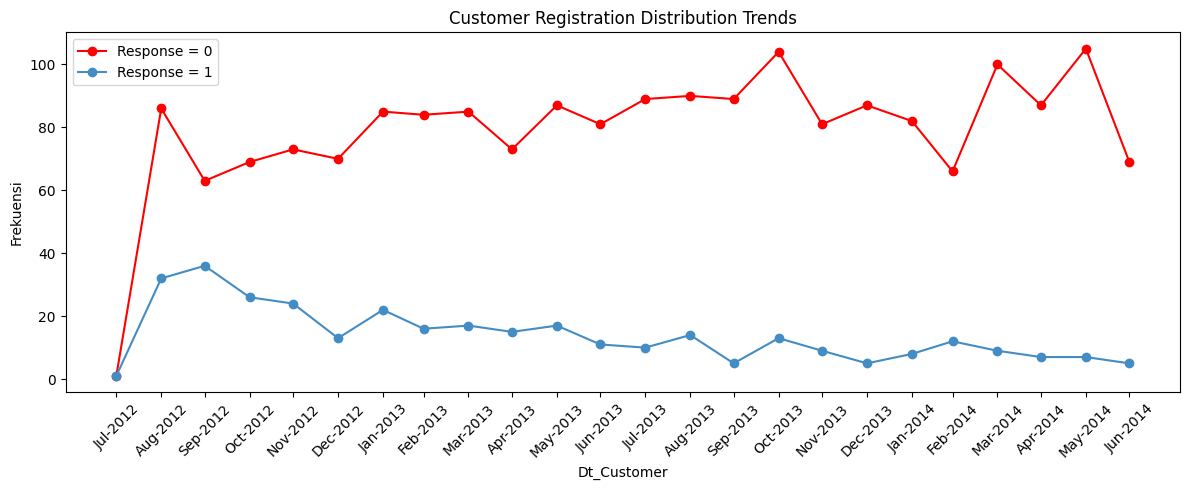

In [ ]:
# memanggil function menampilkan trend pelanggan yang registrasi/enrollment berdasarkan response
monthly_distribution_response(data, 'Dt_Customer')

#### **Insight (Datetime Feature vs Target):**

   - Pada rentang waktu Juli 2012 hingga Juni 2014, lebih banyak pelanggan yang mendaftar namun tidak merespon campaign.
   - Puncak pendaftaran dan respon terjadi pada Agustus 2012 - September 2012, namun jumlahnya cenderung menurun hingga akhir periode.
   - Analisis ini memberikan gambaran tentang dinamika pendaftaran dan respon campaign selama periode tersebut, yang dapat menjadi dasar untuk strategi pemasaran yang lebih efektif di masa depan.

## **3.4 Multivariate Analysis** <a id=3.4></a>

### **3.4.1 Based on Regression Line** <a id=3.4.1></a>

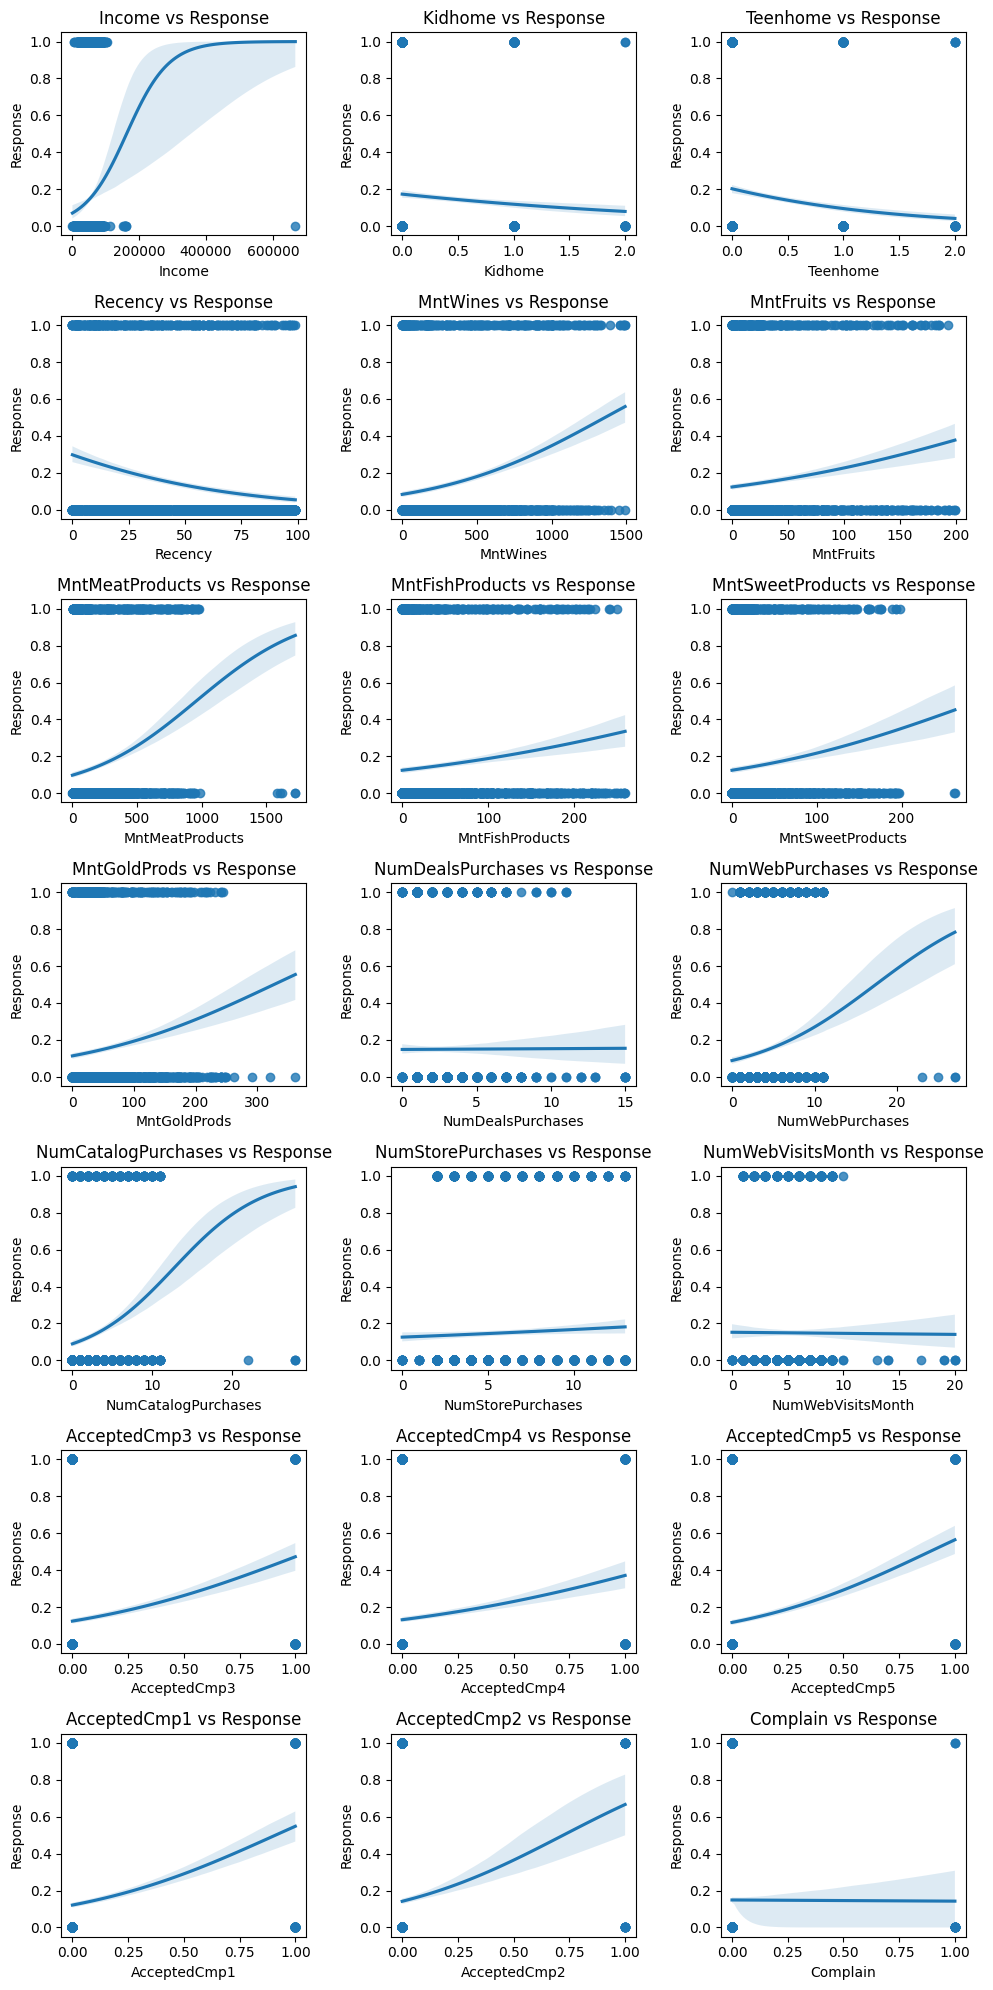

In [ ]:
# regplot setiap feature ke target
plt.figure(figsize=(10, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for i, col in enumerate(data[numeric_cols[1:-1]]):
    plt.subplot(7, 3, i+1)
    sns.regplot(data=data, x=data[col], y=data['Response'], logistic=True)
    plt.title(f'{col} vs Response')
    plt.xlabel(f'{col}')
    plt.ylabel('Response')

plt.tight_layout()
plt.show()

#### **Insight Regression Plot (Numerical Feature vs Target):**

   - Pengaruh pendapatan (`Income`) mempunyai korelasi positif yang cukup kuat dimana semakin tinggi income maka probabilitas merespon campaign semakin tinggi. Contohnya saat `Income` berada pada angka **200000** mempunyai probabilitas response sekitar **60%**.
   - Sebaliknya pengaruh mempunyai anak (`Teenhome`, `Kidhome`) mempunyai korelasi negatif dimana jumlah anak akan menurunkan probabilitas meresponse campaign. Contohnya saat **mempunyai 2 anak remaja** (`Teenhome`) akan menurunkan probabilitas campaign sampai mendekati **0%**, sedangkan **saat tidak mempunyai anak remaja** probabilitas mencapai **20%**.
   - Spending pada produk tertentu, terutama `MeatProducts`, juga memiliki korelasi positif yang signifikan dengan `Response`. Semakin banyak produk yang dibeli maka probabilitas untuk meresponse campaign semakin tinggi.
   - Jenis pembelian melalui Katalog dan Web memberikan kontribusi positif yang signifikan terhadap kemungkinan pelanggan merespon, sementara pembelian dengan diskon atau melalui toko fisik tidak menunjukkan korelasi yang signifikan.
   - Campaign (`AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`) juga memiliki korelasi positif yang signifikan terhadap `Response`.

### **3.4.2 Based on Correlation Coefficient (Heatmap)** <a id=3.4.2></a>

Text(0.5, 1.0, 'Correlation to Response')

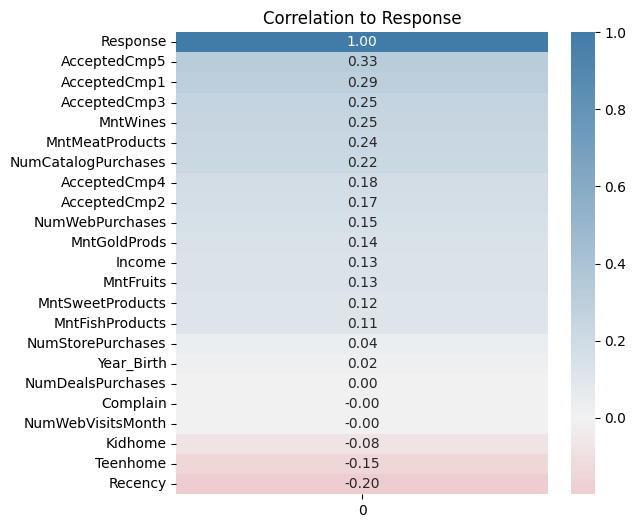

In [ ]:
# menghitung korelasi dengan Response
CORR_RESPONSE = data.corrwith(data['Response'], axis=0, method='pearson', drop=False).sort_values(ascending=False)

# setup figure dan color palette
cmap = sns.diverging_palette(10, 240, as_cmap=True)
plt.figure(figsize=(6, 6))

# heatmap response
sns.heatmap(CORR_RESPONSE.to_frame(), annot=True, fmt=".2f", cbar=True, center=0, cmap=cmap)
plt.title('Correlation to Response')

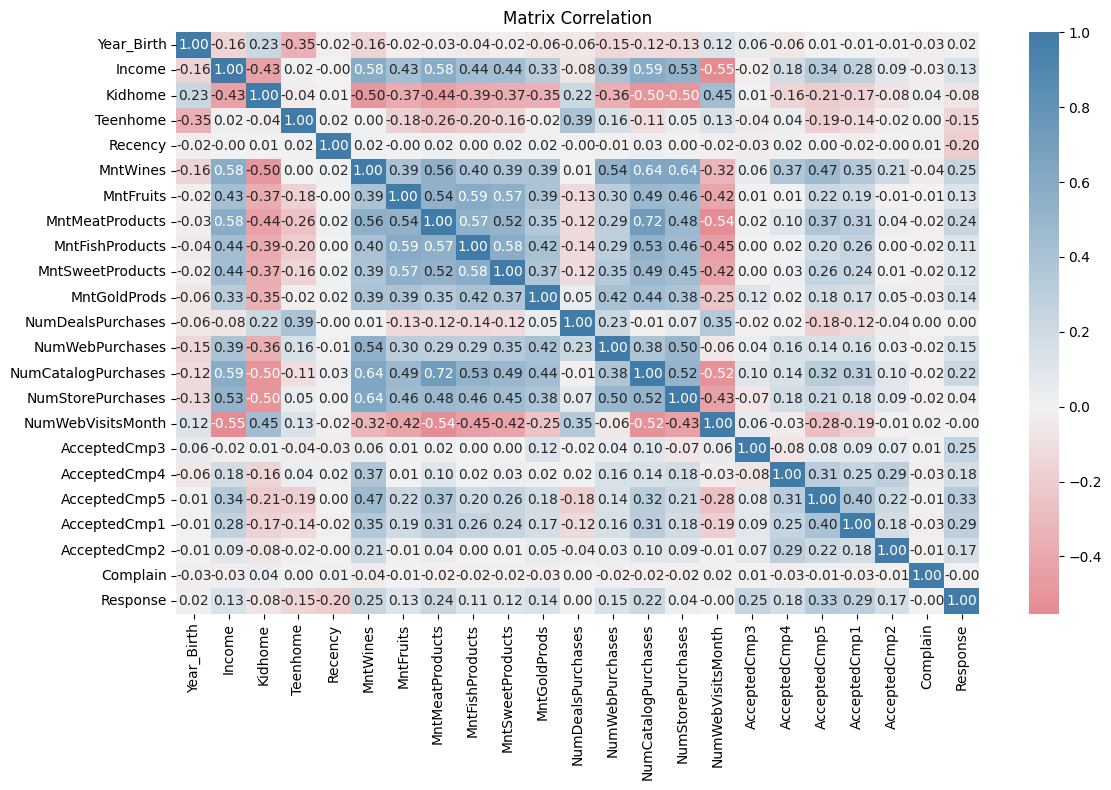

In [ ]:
# setup figure dan color palette
cmap = sns.diverging_palette(10, 240, as_cmap=True)
plt.figure(figsize=(12, 8))

# heatmap matrix correlation
sns.heatmap(data.corr(), annot=True, fmt=".2f", cbar=True, center=0, cmap=cmap)
plt.title('Matrix Correlation')

plt.tight_layout()
plt.show()

#### **Insight Correlation of Coefficient (Heatmap):**

   - **Pentingnya Korelasi Antara Feature:**
     - Korelasi Positif terhadap Target pada campaign, produk spending, dan channel penjualan.
     - Korelasi Negatif terhadap Target pada Recency dan jumlah anak (Teenhome, Kidhome).
     - Korelasi Tinggi Antara Beberapa Pasang Feature, menunjukkan adanya multicollinearity.
     - Rekomendasi untuk Proses Modeling.

## **3.5 Business Insights** <a id=3.5></a>

In [ ]:
# menghitung jumlah responden dengan Yes Response tanpa menerima campaign manapun
no_campaign_response = len(data[(data['AcceptedCmp1'] == 0) & (data['AcceptedCmp2'] == 0) & (
    data['AcceptedCmp3'] == 0) & (data['AcceptedCmp4'] == 0) & (data['AcceptedCmp5'] == 0) & (data['Response'] == 1)])

# menghitung jumlah responden dengan Yes Response
total_yes_response = len(data[data['Response'] == 1])

# menghitung jumlah responden dengan Yes Response yang setidaknya menerima satu campaign
at_least_one_campaign_response = total_yes_response - no_campaign_response

# menampilkan hasil
print('Total Yes Response:', total_yes_response)
print('Yes Response without accepting any campaigns:', no_campaign_response)
print('Yes Response accepting at least one campaign:',
      at_least_one_campaign_response)

# menampilkan proporsi dalam persentase
percentage_no_campaign_response = (
    no_campaign_response / total_yes_response) * 100
percentage_at_least_one_campaign_response = (
    at_least_one_campaign_response / total_yes_response) * 100

print('Percentage of Yes Response without accepting any campaigns: {:.1f}%'.format(
    percentage_no_campaign_response))
print('Percentage of Yes Response accepting at least one campaign: {:.1f}%'.format(
    percentage_at_least_one_campaign_response))

Total Yes Response: 334
Yes Response without accepting any campaigns: 146
Yes Response accepting at least one campaign: 188
Percentage of Yes Response without accepting any campaigns: 43.7%
Percentage of Yes Response accepting at least one campaign: 56.3%


In [ ]:
# success rate untuk setiap campaign yang diberikan
# inisialisasi dataFrame
campaigns = ['Cmp1', 'Cmp2', 'Cmp3', 'Cmp4', 'Cmp5']
df_marketing = pd.DataFrame(
    0, index=campaigns + ['Any campaigns', 'Total Response'], columns=['Count', 'Yes Response', 'Success Rate'])

# menghitung metrik untuk setiap campaign
for col in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    count = data[col].sum()
    yes_response = data[(data[col] == 1) & (data['Response'] == 1)].shape[0]
    success_rate = np.round(yes_response / count * 100, 2)

    # mengisi nilai DataFrame
    df_marketing.loc[col[8:], ['Count', 'Yes Response', 'Success Rate']] = [
        count, yes_response, success_rate]

# menghitung metrik untuk 'Any campaigns' dan 'Total Response'
df_marketing.loc['Any campaigns', 'Count'] = len(data) - 1777
df_marketing.loc['Any campaigns', 'Yes Response'] = len(
    data[data['Response'] == 1])
df_marketing.loc['Any campaigns', 'Success Rate'] = np.round(
    df_marketing.loc['Any campaigns', 'Yes Response'] / df_marketing.loc['Any campaigns', 'Count'] * 100, 2)

df_marketing.loc['Total Response', 'Count'] = len(data)
df_marketing.loc['Total Response', 'Yes Response'] = len(
    data[data['Response'] == 1])
df_marketing.loc['Total Response', 'Success Rate'] = np.round(
    df_marketing.loc['Total Response', 'Yes Response'] / len(data) * 100, 2)

# menampilkan dataFrame
df_marketing

Count  Yes Response  Success Rate
Cmp1              144            79         54.86
Cmp2               30            20         66.67
Cmp3              163            77         47.24
Cmp4              167            62         37.13
Cmp5              163            92         56.44
Any campaigns     463           334         72.14
Total Response   2240           334         14.91

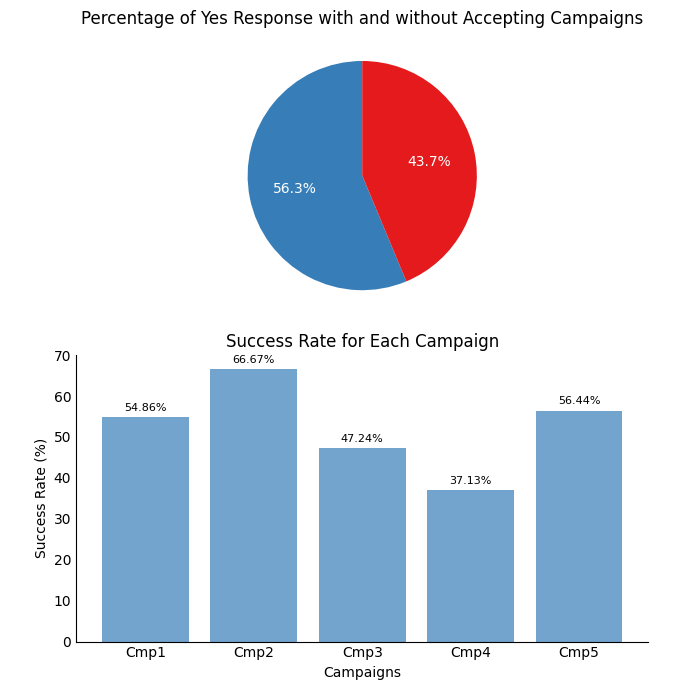

In [ ]:
# subplots
fig, axes = plt.subplots(2, 1, figsize=(7, 7))
ax = axes.ravel()

# pie chart
colors = ['#377eb8','#e41a1c']
labels = ['Accepting at least one campaign', 'Not accepting any campaign']
sizes = [percentage_at_least_one_campaign_response,
         percentage_no_campaign_response]
ax[0].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, textprops={'color': 'white'})
ax[0].set_title('Percentage of Yes Response with and without Accepting Campaigns')

# bar chart for Success Rate
ax[1].bar(df_marketing.index[:-2], df_marketing['Success Rate'][:-2], color='#377eb8', alpha=0.7, label='Success Rate')
ax[1].set_xlabel('Campaigns')
ax[1].set_ylabel('Success Rate (%)')
ax[1].set_title('Success Rate for Each Campaign')

# Menghilangkan garis x dan y
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(True)
ax[1].spines['left'].set_visible(True)

ax[1].tick_params(axis='both', which='both', length=0)  # Menghilangkan tanda tick pada x dan y

# values pada bar chart
for i, v in enumerate(df_marketing['Success Rate'][:-2]):
    ax[1].text(i, v + 1, str(v) + '%', ha='center', va='bottom', fontsize=8)

plt.tight_layout(h_pad=1)
plt.show()

In [ ]:
# membuat function untuk menampilkan plot pada agregasi data
def plot_grouped(data, group_column, variables, nrows=1, ncols=1, method='mean', hue=None):

    # melakukan filter pada feature yang bertipe data numerik
    numeric_variables = [
        var for var in variables if pd.api.types.is_numeric_dtype(data[var])]

    # agregasi data berdasarkan hasil feature yang telah terfilter sebelumnya
    grouped_data = data.groupby([group_column, hue]).agg(
        {variable: method for variable in numeric_variables}).reset_index()

    # setup color palette
    palette = sns.color_palette('Set1', len(numeric_variables))

    # setup subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=(10 * ncols, 5 * nrows))

    # untuk memastikan bahwa axes tetap iterable untuk kasus 1 subplot
    if nrows == 1 and ncols == 1:
        axes = [axes]

    # agregasi sesuai dengan methode yang terdefinisi pada parameter
    if method == 'mean':
        title = 'Average'
    elif method == 'sum':
        title = 'Total'
    elif method == 'count':
        title = 'Count'

    # melakukan perulangan pada setiap feature yang ditampilkan
    for i, variable in enumerate(numeric_variables):

        # menentukan posisi axes setiap feature
        row_index = i // ncols
        col_index = i % ncols
        ax = sns.barplot(x=group_column, y=variable, hue=hue,
                         data=grouped_data, ax=axes[row_index][col_index], palette=palette)

        # menentukan title, xlabel, ylabel, dan xticks
        axes[row_index][col_index].set_title(
            f'{title} {variable} by {group_column}')
        axes[row_index][col_index].set_ylabel(variable)
        axes[row_index][col_index].set_xlabel(group_column)
        axes[row_index][col_index].tick_params(axis='x', rotation=0)

        # menambahkan label angka di atas setiap bar
        for p in ax.patches:
            height = p.get_height()
            axes[row_index][col_index].text(p.get_x() + p.get_width()/2., height,
                                            f'{height:.2f}', ha='center', va='bottom', color='black', fontsize=10)

    plt.tight_layout()
    plt.show()

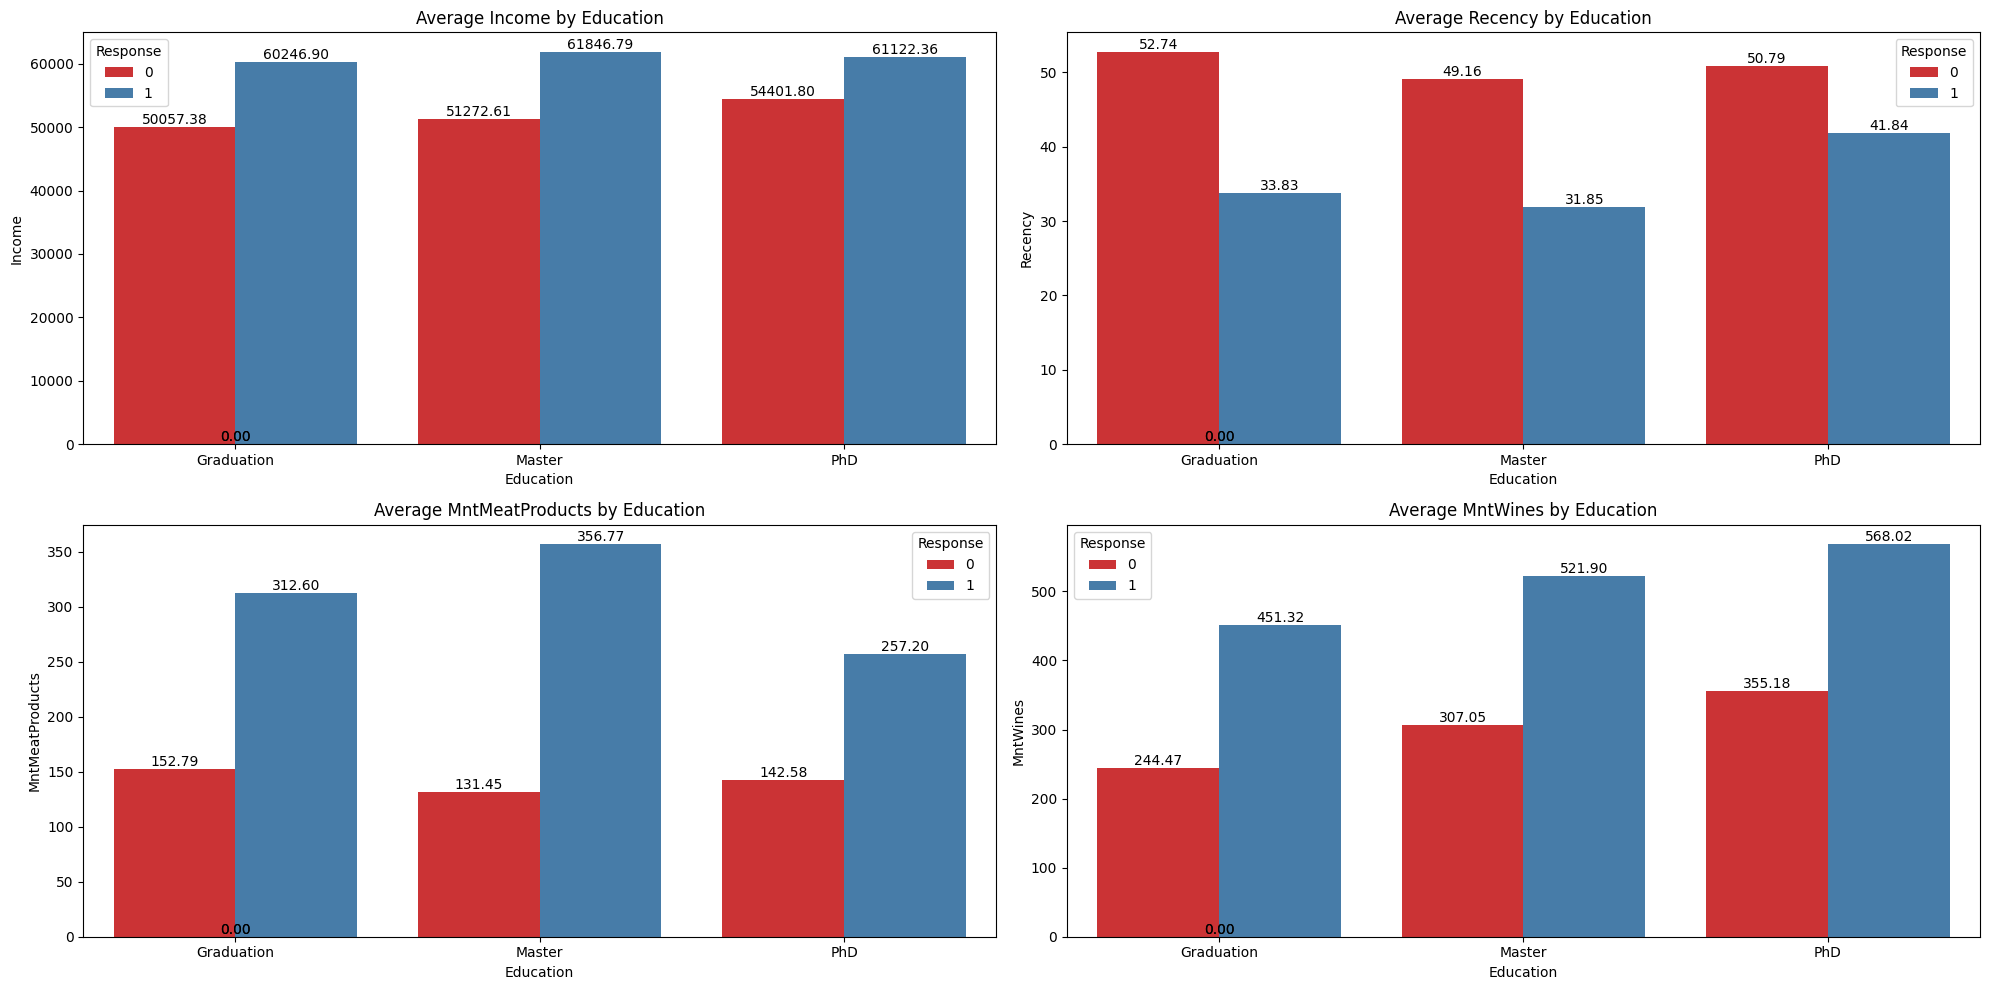

In [ ]:
# memilih feature yang akan ditampilkan insightnya
cols_to_plot = ['Income', 'Recency',
                'MntMeatProducts', 'MntWines']

# memanggil function untuk menampilkan barplot pada agregasi feature education
plot_grouped(data[filter_data], 'Education', cols_to_plot,
             nrows=2, ncols=2, hue='Response')

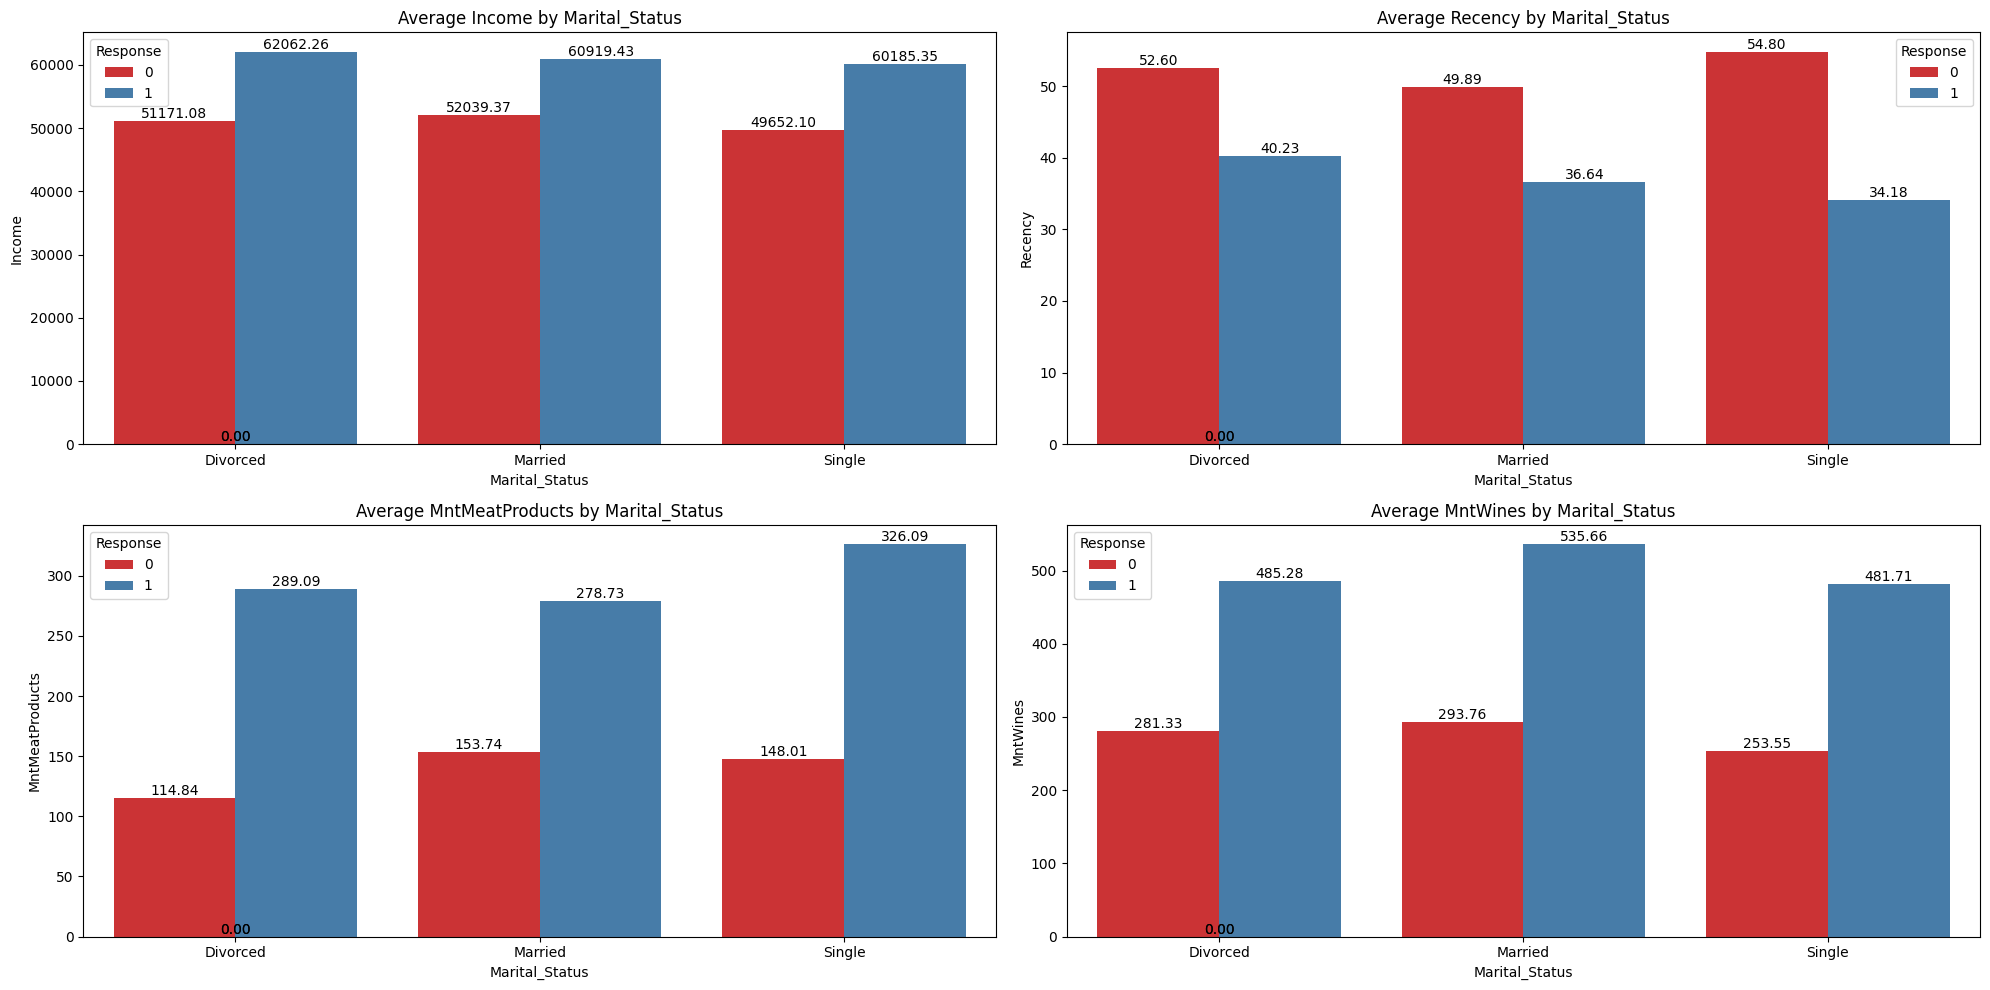

In [ ]:
# memanggil function untuk menampilkan barplot pada agregasi marital status
plot_grouped(data[filter_data], 'Marital_Status', cols_to_plot,
             nrows=2, ncols=2, hue='Response')

#### **Summary Business Insights**

Berdasarkan analisis mendalam terhadap data campaign dan karakteristik pelanggan, kami menyarankan beberapa langkah strategis untuk meningkatkan efektivitas campaign dan memaksimalkan keuntungan bisnis:

1. Segmentasi Pelanggan Berdasarkan Respons campaign:

   Melakukan segmentasi pelanggan berdasarkan respons campaign dapat membantu dalam menyesuaikan strategi pemasaran. Fokuskan upaya pada kelompok pelanggan yang telah menunjukkan respons positif, seperti tingkat pendidikan Graduation, PhD, dan Master, serta status pernikahan Single, Married, dan Divorced.
2. Personalisasi Pesan dan Penawaran:

   Personalisasi pesan dan penawaran campaign untuk setiap kelompok pelanggan yang telah diidentifikasi dapat meningkatkan keterlibatan. Berdasarkan karakteristik unik dari setiap kelompok, buatlah pesan yang relevan dan tawarkan insentif yang sesuai dengan preferensi mereka.
3. Penargetan Tingkat Pendidikan Tinggi:

   Tingkat pendidikan tinggi seperti Graduation, PhD, dan Master memiliki potensi besar untuk respons campaign. Fokuskan penawaran khusus, informasi produk, dan keuntungan tambahan pada kelompok ini untuk memaksimalkan partisipasi.
4. Optimalkan Pengeluaran Pelanggan yang Merespon:

   Pelanggan yang merespons campaign memiliki kecenderungan pengeluaran yang lebih tinggi pada berbagai kategori produk. Optimalisasi persediaan dan promosi pada produk-produk yang paling diminati oleh kelompok pelanggan ini dapat meningkatkan nilai transaksi.
5. Perkuat campaign dengan Data Pembelian dan Channel:

   Analisis menunjukkan bahwa pelanggan yang merespons campaign memiliki rata-rata pembelian yang lebih tinggi di berbagai saluran seperti catalog, web, dan toko fisik. Penguatan campaign dengan peningkatan ketersediaan produk melalui saluran ini dapat meningkatkan aksesibilitas produk bagi pelanggan.
6. Pemantauan Terus-Menerus dan Analisis Reaksi Pelanggan:

   Melakukan pemantauan terus-menerus terhadap respons pelanggan dan melakukan analisis lebih lanjut terhadap perubahan tren dan preferensi. Keterlibatan yang berkelanjutan dan penyesuaian cepat terhadap dinamika pasar dapat menjadi kunci kesuksesan jangka panjang.

Dengan menerapkan strategi ini, diharapkan perusahaan dapat meraih keberhasilan yang lebih besar dalam campaign pemasaran, meningkatkan loyalitas pelanggan, dan mengoptimalkan hasil bisnis secara keseluruhan.

# **4. Data Pre-Processing** <a id=4></a>
[back to top](#100)

## **4.1 Data Split** <a id=4.1></a>

In [ ]:
# melakukan backup dataset sebelum split
data_before_splitting = data.copy()

In [ ]:
# restore point
data = data_before_splitting.copy()
data.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0  2012-09-04       58       635         88  ...                   10   
1  2014-03-08       38        11          1  ...                    1   
2  2013-08-21       26       426         49  ...                    2   
3  2014-02-10       26        11          4  ...                    0   
4  2014-01-19       94       173         43  ...                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0         0         1  
1             0             0             0         0         0  
2             0             0             0         0         0  
3             0             0             0         0         0  
4             0             0             0         0         0  

[5 rows x 26 columns]

In [ ]:
# split train and test set

# memisahkan antara training dan test set
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

# menampilkan shape dari train dan test set
print(f'data_train: {data_train.shape}, data_test: {data_test.shape}')

data_train: (1792, 26), data_test: (448, 26)


## **4.2 Handling Missing Values** <a id=4.2></a>

In [ ]:
# backup dataset sebelum handling missing values
data_before_handling_missingvalues_train = data_train.copy()
data_before_handling_missingvalues_test = data_test.copy()

In [ ]:
# restore point data_train
data_train = data_before_handling_missingvalues_train.copy()
data.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0  2012-09-04       58       635         88  ...                   10   
1  2014-03-08       38        11          1  ...                    1   
2  2013-08-21       26       426         49  ...                    2   
3  2014-02-10       26        11          4  ...                    0   
4  2014-01-19       94       173         43  ...                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0         0         1  
1             0             0             0         0         0  
2             0             0             0         0         0  
3             0             0             0         0         0  
4             0             0             0         0         0  

[5 rows x 26 columns]

In [ ]:
# restore point data_test
data_test = data_before_handling_missingvalues_test.copy()
data.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0  2012-09-04       58       635         88  ...                   10   
1  2014-03-08       38        11          1  ...                    1   
2  2013-08-21       26       426         49  ...                    2   
3  2014-02-10       26        11          4  ...                    0   
4  2014-01-19       94       173         43  ...                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0         0         1  
1             0             0             0         0         0  
2             0             0             0         0         0  
3             0             0             0         0         0  
4             0             0             0         0         0  

[5 rows x 26 columns]

In [ ]:
# membuat function untuk mengidentifikasi missing values
def identify_missing_values(data):

    # menghitung missing values pada setiap feature
    missing_values_count = data.isnull().sum().reset_index().rename(
        {'index': 'column', 0: 'missing values'}, axis=1)

    # filter feature yang mempunyai missing values
    missing_values_count = missing_values_count[missing_values_count['missing values'] > 0]

    # menghitng persentase missing values
    missing_values_count['percentage'] = round(
        (missing_values_count['missing values'] / len(data) * 100), 2)

    # mengurutkan jumlah missing values secara descending
    missing_values_count = missing_values_count.sort_values(
        by='missing values', ascending=False).reset_index(drop=True)

    return missing_values_count

In [ ]:
# menampilkan data shape dan memanggil function untuk mengidentifikasi missing values
print(f'Data Train Shape : {data_train.shape}')
print(f'Data Test Shape : {data_test.shape}')
print(identify_missing_values(data_train))
print(identify_missing_values(data_test))

Data Train Shape : (1792, 26)
Data Test Shape : (448, 26)
   column  missing values  percentage
0  Income              19        1.06
   column  missing values  percentage
0  Income               5        1.12


In [ ]:
# handling missing values, dengan menghapusnya (<10%)
data_train.dropna(axis=0, inplace=True)
data_test.dropna(axis=0, inplace=True)
print(data_train.shape)
print(data_test.shape)

(1773, 26)
(443, 26)


## **4.3 Handling Duplicates Values** <a id=4.3></a>

In [ ]:
# melakukan backup dataset sebelum handling duplicates
data_before_handling_duplicates_train = data_train.copy()
data_before_handling_duplicates_test = data_test.copy()

In [ ]:
# restore point
data_train = data_before_handling_duplicates_train.copy()
data_test = data_before_handling_duplicates_test.copy()

In [ ]:
# membuat function untuk mengidentifikasi data terduplikasi
def identify_duplicates(df):

    # mencari baris yang terduplikasi
    duplicate_rows = df[df.duplicated()]

    # menghitng jumlah row yang terduplikasi
    duplicate_count = len(duplicate_rows)

    # membuat dataframe untuk menampilkan jumlah row beserta persentase data yang terduplikasi
    if duplicate_count > 0:
        duplicate_info = pd.DataFrame({
            'duplicated rows': [duplicate_count],
            'percentage': round((duplicate_count / len(df) * 100), 2)
        })
    else:
        duplicate_info = pd.DataFrame({
            'duplicated rows': [0],
            'percentage': [0.0]
        })

    return duplicate_info

In [ ]:
# menampikan data shape dan memanggil function untuk mengidentikasi data yang terduplikasi
print(f'Data Train Shape : {data_train.shape}')
print(f'Data Test Shape : {data_test.shape}')
print(identify_duplicates(data_train))
print(identify_duplicates(data_test))

Data Train Shape : (1773, 26)
Data Test Shape : (443, 26)
   duplicated rows  percentage
0              116        6.54
   duplicated rows  percentage
0                6        1.35


In [ ]:
# menampilkan baris data yang terduplikasi pada data_train
data_train[data_train.duplicated(keep=False)].sort_values(by=['Education','Marital_Status','Income'])

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
1107        1970  2n Cycle        Married  15315.0        0         0   
558         1970  2n Cycle        Married  15315.0        0         0   
1549        1975  2n Cycle        Married  37284.0        1         1   
2015        1975  2n Cycle        Married  37284.0        1         1   
669         1971  2n Cycle        Married  54690.0        1         1   
...          ...       ...            ...      ...      ...       ...   
2062        1982       PhD       Together  70038.0        0         0   
1630        1947       PhD       Together  73059.0        0         1   
658         1947       PhD       Together  73059.0        0         1   
1649        1950       PhD          Widow  56551.0        1         1   
1959        1950       PhD          Widow  56551.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
1107  2013-08-03       27         7          4  ...                    0   
558   2013-08-03       27         7          4  ...                    0   
1549  2013-03-29       46        11          1  ...                    0   
2015  2013-03-29       46        11          1  ...                    0   
669   2013-11-07       76       111         16  ...                    1   
...          ...      ...       ...        ...  ...                  ...   
2062  2013-10-25       54       587         54  ...                    4   
1630  2013-08-31       36       410        112  ...                    3   
658   2013-08-31       36       410        112  ...                    3   
1649  2014-05-07       48        67          4  ...                    1   
1959  2014-05-07       48        67          4  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
1107                  4                  5             0             0   
558                   4                  5             0             0   
1549                  3                  6             0             0   
2015                  3                  6             0             0   
669                   5                  3             0             0   
...                 ...                ...           ...           ...   
2062                  8                  2             0             0   
1630                 13                  4             0             0   
658                  13                  4             0             0   
1649                  4                  4             0             0   
1959                  4                  4             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
1107             0             0             0         0         0  
558              0             0             0         0         0  
1549             0             0             0         0         0  
2015             0             0             0         0         0  
669              0             0             0         0         0  
...            ...           ...           ...       ...       ...  
2062             0             0             0         0         0  
1630             0             0             0         0         0  
658              0             0             0         0         0  
1649             0             0             0         0         0  
1959             0             0             0         0         0  

[226 rows x 26 columns]

In [ ]:
# menampilkan baris data yang terduplikasi pada data_test
data_test[data_test.duplicated(keep=False)].sort_values(by=['Education','Marital_Status','Income'])

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
508         1992  Graduation        Married  34935.0        0         0   
1578        1992  Graduation        Married  34935.0        0         0   
1318        1972  Graduation        Married  40321.0        1         1   
316         1972  Graduation        Married  40321.0        1         1   
705         1986  Graduation        Married  71952.0        1         0   
351         1986  Graduation        Married  71952.0        1         0   
1822        1971      Master         Single  33316.0        1         1   
1359        1971      Master         Single  33316.0        1         1   
1545        1986      Master       Together  42386.0        1         0   
297         1986      Master       Together  42386.0        1         0   
1347        1983         PhD        Married  50150.0        0         0   
99          1983         PhD        Married  50150.0        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
508   2013-06-21       71        34          4  ...                    1   
1578  2013-06-21       71        34          4  ...                    1   
1318  2013-07-29       59        44          4  ...                    0   
316   2013-07-29       59        44          4  ...                    0   
705   2013-01-10       93       656         80  ...                    4   
351   2013-01-10       93       656         80  ...                    4   
1822  2013-10-04       34        79          1  ...                    1   
1359  2013-10-04       34        79          1  ...                    1   
1545  2013-01-13       43        65          4  ...                    0   
297   2013-01-13       43        65          4  ...                    0   
1347  2013-06-20       32       135         46  ...                    2   
99    2013-06-20       32       135         46  ...                    2   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
508                   4                  7             0             0   
1578                  4                  7             0             0   
1318                  3                  7             0             0   
316                   3                  7             0             0   
705                   8                  4             1             0   
351                   8                  4             1             0   
1822                  4                  6             0             0   
1359                  4                  6             0             0   
1545                  3                  8             0             0   
297                   3                  8             0             0   
1347                  7                  5             0             0   
99                    7                  5             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
508              0             0             0         0         0  
1578             0             0             0         0         0  
1318             0             0             0         0         0  
316              0             0             0         0         0  
705              1             0             0         0         0  
351              1             0             0         0         0  
1822             0             0             0         0         0  
1359             0             0             0         0         0  
1545             0             0             0         0         0  
297              0             0             0         0         0  
1347             0             0             0         0         0  
99               0             0             0         0         0  

[12 rows x 26 columns]

In [ ]:
# handling data yang terduplikasi dengan cara menghapusnya
data_train.drop_duplicates(keep='first', inplace=True)
data_test.drop_duplicates(keep='first', inplace=True)
print(f'Data Train Shape : {data_train.shape}')
print(f'Data Test Shape : {data_test.shape}')

Data Train Shape : (1657, 26)
Data Test Shape : (437, 26)


## **4.4 Handling Outliers** <a id=4.4></a>

In [ ]:
# melakukan backup dataset sebelum handling outliers
data_before_handling_outliers_train = data_train.copy()
data_before_handling_outliers_test = data_test.copy()

In [ ]:
# restore point
data_train = data_before_handling_outliers_train.copy()
data_test = data_before_handling_outliers_test.copy()

In [ ]:
# z-score outliers handling
from scipy.stats import zscore
def handle_outliers_zscore(data, columns, threshold=3, plot=False):
    filtered_entries = np.array([True] * len(data))
    outliers_entries = np.array([True] * len(data))

    for column in columns:
        z_scores = np.abs(zscore(data[column]))
        filtered = (z_scores < threshold)
        filtered_entries = np.logical_and(filtered, filtered_entries)
        outliers_entries = ~filtered_entries
        filtered_data = data[filtered_entries]
        outliers_data = data[outliers_entries]

    filtered_data.reset_index(drop=True, inplace=True)
    outliers_data.reset_index(drop=True, inplace=True)

    if plot:
        for column in columns:
            fig, ax = plt.subplots(1, 2, figsize=(8, 4))
            ax[0].set_title(f'Before Outliers in {column}')
            sns.boxplot(data[column], ax=ax[0])
            ax[1].set_title(f'After Outliers in {column}')
            sns.boxplot(filtered_data[column], ax=ax[1])
            plt.tight_layout()
            plt.show()

    data_size = data.shape[0]
    filtered_size = filtered_data.shape[0]
    outliers_size = outliers_data.shape[0]
    pct_outliers = round((outliers_size / data_size) * 100, 2)

    result = pd.Series(data=[data_size, filtered_size, outliers_size, pct_outliers],
                       index=['Before', 'After', 'Outliers', '% Outliers'])
    print(result, '\n')

    return filtered_data, outliers_data

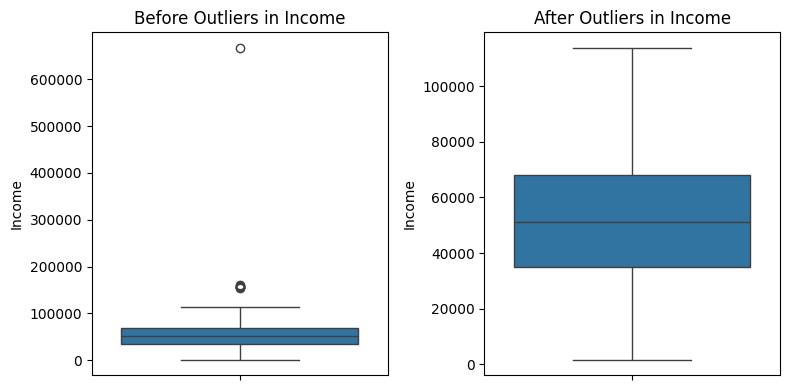

Before        1657.00
After         1650.00
Outliers         7.00
% Outliers       0.42
dtype: float64 



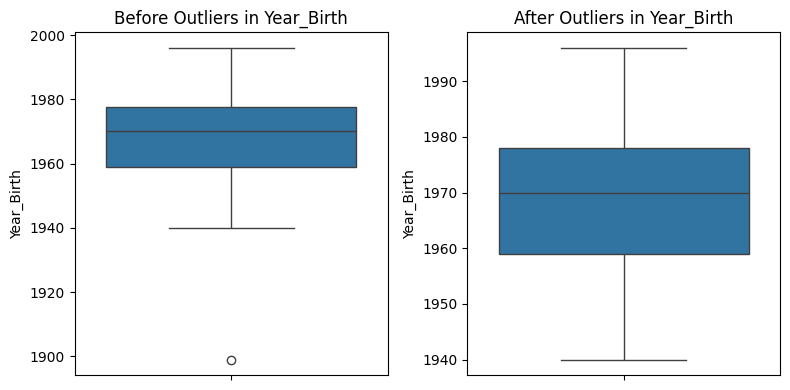

Before        1650.00
After         1649.00
Outliers         1.00
% Outliers       0.06
dtype: float64 



In [ ]:
# menghapus outlier pada feature income data_train
outlier_cols = ['Income']
data_train, residu_income_train = handle_outliers_zscore(data_train, outlier_cols, 3, True)

# menghapus outlier pada feature Year_Birth data_train
outlier_cols = ['Year_Birth']
data_train, residu_yearbirth_train = handle_outliers_zscore(data_train, outlier_cols, 3, True)

In [ ]:
residu_income_train.sort_values(by='Income', ascending=False)

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
0        1977  Graduation       Together  666666.0        1         0   
5        1982         PhD        Married  160803.0        0         0   
6        1971      Master       Together  157733.0        1         0   
1        1973         PhD        Married  157243.0        0         1   
2        1977  Graduation       Together  157146.0        0         0   
3        1949         PhD        Married  156924.0        0         0   
4        1975  Graduation       Divorced  153924.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0  2013-06-02       23         9         14  ...                    1   
5  2012-08-04       21        55         16  ...                   28   
6  2013-06-04       37        39          1  ...                    0   
1  2014-03-01       98        20          2  ...                   22   
2  2013-04-29       13         1          0  ...                   28   
3  2013-08-29       85         2          1  ...                    0   
4  2014-02-07       81         1          1  ...                    0   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  3                  6             0             0   
5                  1                  0             0             0   
6                  1                  1             0             0   
1                  0                  0             0             0   
2                  0                  1             0             0   
3                  0                  0             0             0   
4                  0                  0             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0         0         0  
5             0             0             0         0         0  
6             0             0             0         0         0  
1             0             0             0         0         0  
2             0             0             0         0         0  
3             0             0             0         0         0  
4             0             0             0         0         0  

[7 rows x 26 columns]

In [ ]:
residu_yearbirth_train.sort_values(by='Year_Birth', ascending=False)

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0        1899       PhD       Together  83532.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0  2013-09-26       36       755        144  ...                    6   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  1             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             1             0             0         0         0  

[1 rows x 26 columns]

## **4.5 Handling Invalid Values** <a id=4.5></a>

In [ ]:
# handling invalid values
# mengubah value pada feature education
data_train['Education'].replace({'Basic':'Graduation','2n Cycle':'Master'}, inplace=True)
data_test['Education'].replace({'Basic':'Graduation','2n Cycle':'Master'}, inplace=True)

# mengubah value pada feature marital_status
data_train['Marital_Status'].replace({'YOLO':'Single','Absurd':'Single','Alone':'Single',
                                'Widow':'Divorced','Together':'Married'}, inplace=True)
data_train['Marital_Status'].replace({'YOLO':'Single','Absurd':'Single','Alone':'Single',
                                'Widow':'Divorced','Together':'Married'}, inplace=True)

## **4.6 Feature Extraction** <a id=4.6></a>

In [ ]:
# backup dataset sebelum melakukan feature extraction
data_before_extraction_train = data_train.copy()
data_before_extraction_test = data_test.copy()
data_before_extraction = data.copy()

In [ ]:
# restore point
data_train = data_before_extraction_train.copy()
data_test = data_before_extraction_test.copy()
data = data_before_extraction.copy()

In [ ]:
data_train['feature'] = 'train'
data_test['feature'] = 'test'
data = pd.concat([data_train,data_test]).reset_index(drop=True)

In [ ]:
# membuat feature baru berdasarkan status hubungan
marital = {
    'Single': 'Not in relationship',
    'Together': 'In relationship',
    'Married': 'In relationship',
    'Divorced': 'Not in relationship',
    'Widow': 'Not in relationship',
    'Alone': 'Not in relationship',
    'Absurd': 'Not in relationship',
    'YOLO': 'Not in relationship'
}
data['Relationship_Status'] = data['Marital_Status'].map(marital)

# membuat feature baru total_children dari penjumlahan feature kidhome dan teenhome
data['Total_Children'] = data['Kidhome'] + data['Teenhome']

# membuat feature baru berdasarkan jumlah anggota keluarga
def fam_size(x):
    if x['Relationship_Status'] == 'Not in relationship':
        result = 1 + x['Teenhome'] + x['Kidhome']
    elif x['Relationship_Status'] == 'In relationship':
        result = 2 + x['Teenhome'] + x['Kidhome']
    return result
data['Family_Size'] = data.apply(fam_size, axis=1)

# membuat feature baru berdasarkan tanggal bergabung dan diasumsikan data dikumpulkan pada awal juli 2014
data['Customer_Lifespan'] = (pd.to_datetime('2014-07-01') - data['Dt_Customer']).dt.days

# ekstraksi feature Datetime menjadi feature baru
data['Year'] = data['Dt_Customer'].dt.year
data.drop(['Dt_Customer'],axis=1,inplace=True)

# membuat feature baru total purchase, total spending, dan total offers
data['Total_Purchase'] = data.apply(lambda x: x[purchase_cols[:-1]].sum(), axis=1)
data['Total_Spending'] = data.apply(lambda x: x[spending_cols].sum(), axis=1)
data['Total_Offers'] = data.apply(lambda x: x[campaign_cols[:-1]].sum(), axis=1)

# membuat feature baru untuk menghitung ratio spending dengan total pembelian, dan ratio pembelian diskon dengan total pembelian
data['Spending_Purchase_Ratio'] = data['Total_Spending']/data['Total_Purchase']
data['Deal_Purchase_Ratio'] = data['NumDealsPurchases']/data['Total_Purchase']

# membuat feature baru accept one campaign and more than one campaign
data['at_least_one_campaign'] = data.apply(lambda x: 1 if x[campaign_cols[:-1]].sum() == 1 else 0, axis=1)
data['more_one_campaign'] = data.apply(lambda x: 1 if x[campaign_cols[:-1]].sum() > 1 else 0, axis=1)

# membuat feature baru untuk primary_needs
def categorize_needs(row):
    primary_needs = row['MntFruits'] + row['MntMeatProducts'] + row['MntFishProducts']
    secondary_needs = row['MntWines'] + row['MntGoldProds'] + row['MntSweetProducts']

    if primary_needs > secondary_needs:
        return 'primary_needs'
    else:
        return 'secondary_needs'

data['primary_needs'] = data.apply(categorize_needs, axis=1)

# identifikasi dan handling inf value dari 'Spending_Purchase_Ratio' dan 'Deal_Purchase_Ratio'
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)
data.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0        1950  Graduation         Single  16813.0        0         0       49   
1        1963      Master         Single  64191.0        0         1       30   
2        1971         PhD        Married  71969.0        0         1       59   
3        1968         PhD        Married  29187.0        1         0       43   
4        1969  Graduation        Married   4428.0        0         1        0   

   MntWines  MntFruits  MntMeatProducts  ...  Customer_Lifespan  Year  \
0         4          8               11  ...                347  2013   
1       420         15              186  ...                525  2013   
2      1000          0               76  ...                623  2012   
3        26          0                6  ...                418  2013   
4        16          4               12  ...                269  2013   

   Total_Purchase  Total_Spending  Total_Offers  Spending_Purchase_Ratio  \
0               6              50             1                 8.333333   
1              24             825             0                34.375000   
2              19            1086             1                57.157895   
3               5              34             0                 6.800000   
4              25             359             0                14.360000   

   Deal_Purchase_Ratio  at_least_one_campaign  more_one_campaign  \
0             0.166667                      1                  0   
1             0.125000                      0                  0   
2             0.157895                      1                  0   
3             0.200000                      0                  0   
4             0.000000                      0                  0   

     primary_needs  
0    primary_needs  
1  secondary_needs  
2  secondary_needs  
3  secondary_needs  
4  secondary_needs  

[5 rows x 39 columns]

In [ ]:
# rfm encode

'''
Champions: Pelanggan dengan RFM score tertinggi.
Loyal Customers: Pelanggan dengan frekuensi tinggi dan nilai monetary tinggi.
At-Risk Customers: Pelanggan dengan recency rendah dan frekuensi rendah.
New Customers: Pelanggan dengan recency tinggi dan frekuensi rendah.
'''

# membuat feature baru category rfm score (champions, loyal, at risk, new)
rfm = pd.DataFrame()
rfm['Recency'] = data['Recency']
rfm['Frequency'] = data['Total_Purchase']
rfm['Monetary'] = data['Total_Spending']
rfm.head()

Recency  Frequency  Monetary
0       49          6        50
1       30         24       825
2       59         19      1086
3       43          5        34
4        0         25       359

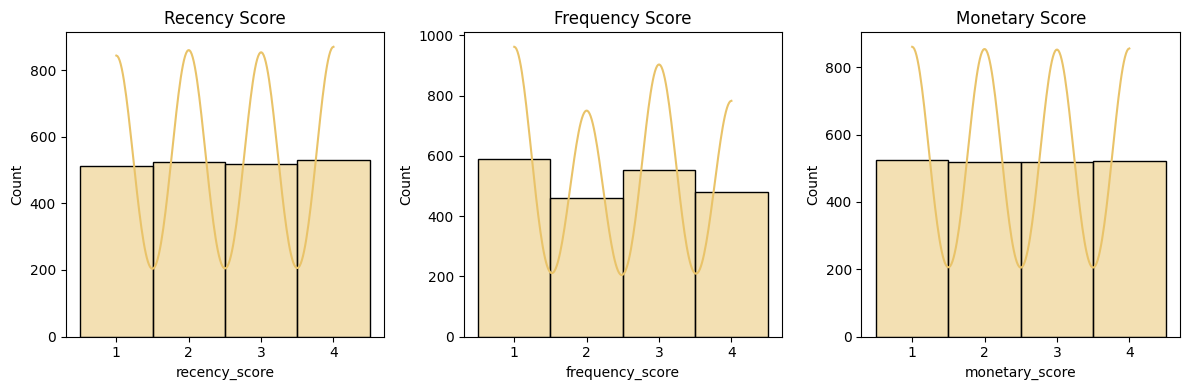

In [ ]:
# kalkulasi score berdasarkan quantile masing-masing feature
rfm['recency_score'] = pd.qcut(rfm['Recency'], q=[0, 0.25, 0.5, 0.75, 1], labels=[4, 3, 2, 1])
rfm['frequency_score'] = pd.qcut(rfm['Frequency'], q=[0, 0.25, 0.5, 0.75, 1], labels=[1, 2, 3, 4])
rfm['monetary_score'] = pd.qcut(rfm['Monetary'], q=[0, 0.25, 0.5, 0.75, 1], labels=[1, 2, 3, 4])

# histplot rfm features
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sns.histplot(rfm['recency_score'], kde=True, ax=axes[0], color='#e9c369')
axes[0].set_title('Recency Score')

sns.histplot(rfm['frequency_score'], kde=True, ax=axes[1], color='#e9c369')
axes[1].set_title('Frequency Score')

sns.histplot(rfm['monetary_score'], kde=True, ax=axes[2], color='#e9c369')
axes[2].set_title('Monetary Score')

plt.tight_layout()
plt.show()

<Axes: xlabel='rfm_score', ylabel='Count'>

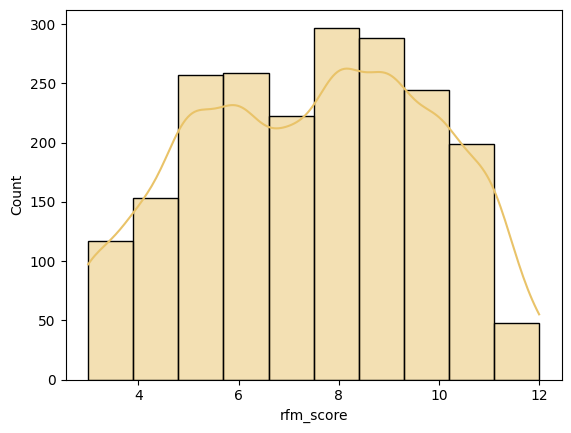

In [ ]:
# histplot rfm score
rfm['rfm_score'] = rfm['recency_score'].astype('int') + rfm['frequency_score'].astype('int') + rfm['monetary_score'].astype('int')
sns.histplot(rfm['rfm_score'], kde=True, bins=10, color='#e9c369')

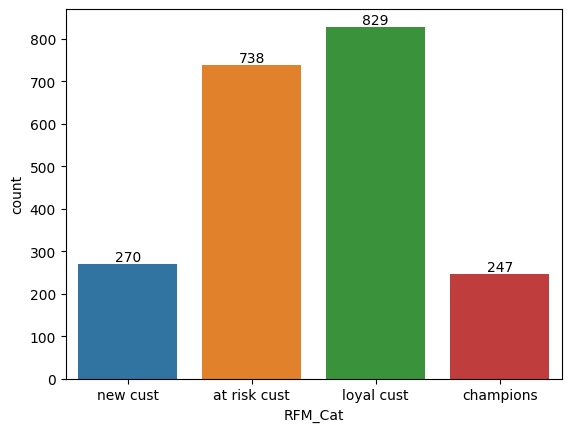

In [ ]:
'''scoring rfm
0-4 new cust
5-7 at risk cust
8-10 loyal cust
10-12 champions

'''
rfm['RFM_Cat'] = pd.cut(rfm['rfm_score'], bins=[0,4,7,10,12], labels=['new cust','at risk cust','loyal cust','champions'])
ax = sns.countplot(x=rfm['RFM_Cat'], palette=sns.color_palette())
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

In [ ]:
# concat dataframe data dengan rfm
data = pd.concat([data, rfm['RFM_Cat']], axis=1)

## **4.7 Feature Encoding** <a id=4.7></a>

In [ ]:
# backup dataset sebelum melakukan feature enconding
data_before_encoding = data.copy()
data_before_encoding.to_csv('data_before_encoding.csv', index=False)

In [ ]:
# restore point
data = data_before_encoding.copy()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# encoding education
edu = {'Graduation': 1, 'Master': 2, 'PhD': 3}
oe_edu = OrdinalEncoder(categories=[list(edu.keys())])
data['Education'] = oe_edu.fit_transform(data[['Education']])

# encoding marital_status
marital_mapping = {'Single': 1, 'Married': 2, 'Divorced': 3}
data['Marital_Status'] = data['Marital_Status'].map(marital_mapping)

# encoding relationship_status
rel_mapping = {'Not in relationship': 0,
               'In relationship': 1}
data['Relationship_Status'] = data['Relationship_Status'].map(
    rel_mapping)

# encoding primary_needs
pr_mapping = {'primary_needs': 0,
              'secondary_needs': 1}
data['primary_needs'] = data['primary_needs'].map(pr_mapping)

# encoding rfm_cat
rfm_mapping = {'new cust': 1, 'at risk cust': 2,
               'loyal cust': 3, 'champions': 4}
oe_rfm = OrdinalEncoder(categories=[list(rfm_mapping.keys())])
data['RFM_Cat'] = oe_rfm.fit_transform(data[['RFM_Cat']])

In [ ]:
# splitting dataset / restore data_train dan data_test
data_train = data[data['feature'] == 'train'].copy()
data_test = data[data['feature'] == 'test'].copy()

data_train.drop('feature', axis=1, inplace=True)
data_test.drop('feature', axis=1, inplace=True)

data_train.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)

## **4.8 Feature Transformation** <a id=4.8></a>

In [ ]:
# backup data sebelum transformation
data_before_transform_train = data_train.copy()
data_before_transform_test = data_test.copy()

In [ ]:
# restore point data train dan data test
data_train = data_before_transform_train.copy()
data_test = data_before_transform_test.copy()

In [ ]:
from scipy.stats import skew, kurtosis
def assess_distribution_multi(data, features, alpha=0.05, show_plot=False):

    num_features = len(features)
    num_cols = min(4, num_features)  # Maksimal 4 Feature dalam satu baris
    num_rows = (num_features - 1) // num_cols + 1  # Jumlah baris yang dibutuhkan

    if show_plot:
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))
        axes = axes.flatten()

    skew_type_list = []  # Tambahkan inisialisasi list
    skew_val_list = []   # Tambahkan inisialisasi list
    normalization_advice_list = []  # Tambahkan inisialisasi list
    transform_columns = []  # Tambahkan inisialisasi list

    results = []
    for i, feature_name in enumerate(features):
        feature_data = data[feature_name].dropna(axis=0)
        skew_val = round(skew(feature_data, nan_policy="omit"), 3)

        if (len(feature_data) > 0):  # Tambahkan kondisi untuk memastikan ada data sebelum melanjutkan
            mean = round(feature_data.mean(), 3)
            median = feature_data.median()
            mode = feature_data.mode()[0]
            q1 = feature_data.quantile(q=0.25)
            q3 = feature_data.quantile(q=0.75)

            if (mean == median == mode) or (-0.2 < skew_val < 0.2):
                skew_type = "Normal Distribution (Symmetric)"
                normalization_advice = "No Transformation"

            elif mean < median < mode:
                skew_type = "Negatively Skewed"
                normalization_advice = "MinMaxScaler"
                if skew_val <= -1:
                    skew_type = "Highly Negatively Skewed"
                    normalization_advice = "PowerTransformer/Log"
            else:
                skew_type = "Positively Skewed"
                normalization_advice = "MinMaxScaler"
                if skew_val >= 1:
                    skew_type = "Highly Positively Skewed"
                    normalization_advice = "PowerTransformer/Log"

            skew_type_list.append(skew_type)
            skew_val_list.append(skew_val)
            normalization_advice_list.append(normalization_advice)

            # Tambahkan fitur ke dalam daftar yang perlu ditransformasi atau standarisasi
            if normalization_advice != "No Transformation":
                transform_columns.append(feature_name)

            # Gambar histplot dalam subplot
            if show_plot:
                sns.histplot(feature_data, kde=True, ax=axes[i])
                axes[i].set_title(f'Histogram for {feature_name}')

    if show_plot:
        # Sembunyikan subplot yang tidak terpakai
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()

    # Buat DataFrame hasil penilaian distribusi
    result_df = pd.DataFrame({
        'Feature': features,
        'Skewness': skew_val_list,
        'Type of Distribution': skew_type_list,
        'Normalization Advice': normalization_advice_list
    }).set_index('Feature')

    return result_df, transform_columns

In [ ]:
# memilih feature yang akan ditransformasikan
cols_to_transform = data_train.drop('Response', axis=1).columns
cols_to_transform = sorted(cols_to_transform)

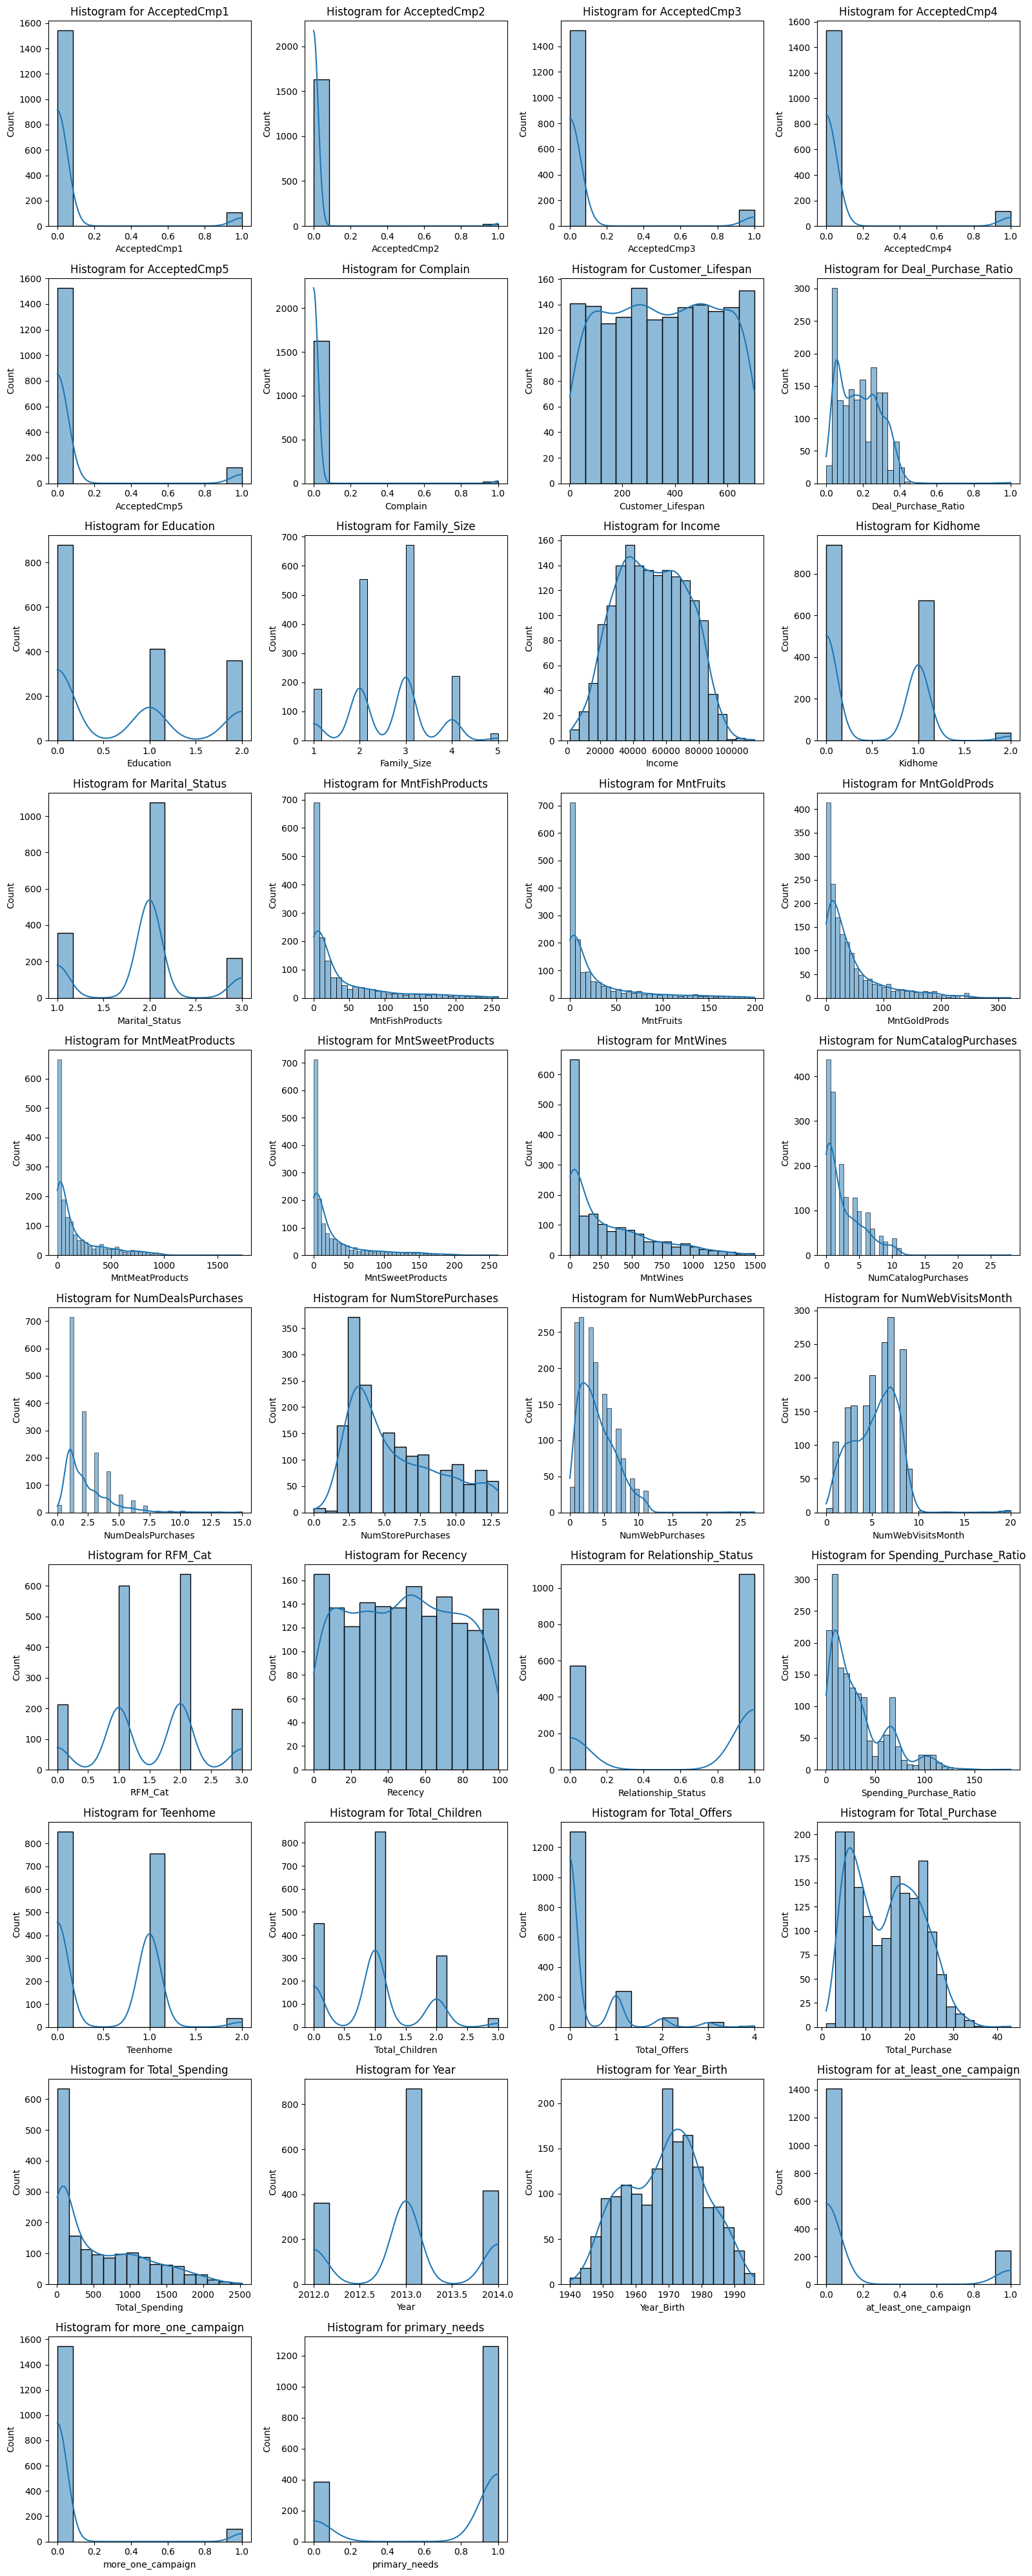

Skewness             Type of Distribution  \
Feature                                                              
AcceptedCmp1                3.531         Highly Positively Skewed   
AcceptedCmp2                8.911         Highly Positively Skewed   
AcceptedCmp3                3.188         Highly Positively Skewed   
AcceptedCmp4                3.341         Highly Positively Skewed   
AcceptedCmp5                3.254         Highly Positively Skewed   
Complain                    9.151         Highly Positively Skewed   
Customer_Lifespan          -0.011  Normal Distribution (Symmetric)   
Deal_Purchase_Ratio         0.831                Positively Skewed   
Education                   0.628                Positively Skewed   
Family_Size                 0.080  Normal Distribution (Symmetric)   
Income                      0.023  Normal Distribution (Symmetric)   
Kidhome                     0.615                Positively Skewed   
Marital_Status              0.012  Normal Distribution (Symmetric)   
MntFishProducts             1.907         Highly Positively Skewed   
MntFruits                   2.062         Highly Positively Skewed   
MntGoldProds                1.877         Highly Positively Skewed   
MntMeatProducts             1.836         Highly Positively Skewed   
MntSweetProducts            2.082         Highly Positively Skewed   
MntWines                    1.223         Highly Positively Skewed   
NumCatalogPurchases         1.445         Highly Positively Skewed   
NumDealsPurchases           2.415         Highly Positively Skewed   
NumStorePurchases           0.722                Positively Skewed   
NumWebPurchases             1.386         Highly Positively Skewed   
NumWebVisitsMonth           0.367                Negatively Skewed   
RFM_Cat                    -0.035  Normal Distribution (Symmetric)   
Recency                     0.014  Normal Distribution (Symmetric)   
Relationship_Status        -0.640                Positively Skewed   
Spending_Purchase_Ratio     1.333         Highly Positively Skewed   
Teenhome                    0.412                Positively Skewed   
Total_Children              0.407                Positively Skewed   
Total_Offers                2.681         Highly Positively Skewed   
Total_Purchase              0.244                Positively Skewed   
Total_Spending              0.885                Positively Skewed   
Year                       -0.043  Normal Distribution (Symmetric)   
Year_Birth                 -0.088  Normal Distribution (Symmetric)   
at_least_one_campaign       2.002         Highly Positively Skewed   
more_one_campaign           3.636         Highly Positively Skewed   
primary_needs              -1.251                Positively Skewed   

                         Normalization Advice  
Feature                                        
AcceptedCmp1             PowerTransformer/Log  
AcceptedCmp2             PowerTransformer/Log  
AcceptedCmp3             PowerTransformer/Log  
AcceptedCmp4             PowerTransformer/Log  
AcceptedCmp5             PowerTransformer/Log  
Complain                 PowerTransformer/Log  
Customer_Lifespan           No Transformation  
Deal_Purchase_Ratio              MinMaxScaler  
Education                        MinMaxScaler  
Family_Size                 No Transformation  
Income                      No Transformation  
Kidhome                          MinMaxScaler  
Marital_Status              No Transformation  
MntFishProducts          PowerTransformer/Log  
MntFruits                PowerTransformer/Log  
MntGoldProds             PowerTransformer/Log  
MntMeatProducts          PowerTransformer/Log  
MntSweetProducts         PowerTransformer/Log  
MntWines                 PowerTransformer/Log  
NumCatalogPurchases      PowerTransformer/Log  
NumDealsPurchases        PowerTransformer/Log  
NumStorePurchases                MinMaxScaler  
NumWebPurchases          PowerTransformer/Log  
NumWebVisitsMonth       

In [ ]:
# identifikasi feature sebelum ditransformasi
result_table = assess_distribution_multi(data_train, cols_to_transform, show_plot=True)[0]
result_table

In [ ]:
log_cols = list(result_table[result_table['Normalization Advice'] == 'PowerTransformer/Log'].index)
norm_cols = list(result_table[result_table['Normalization Advice'].isin(['MinMaxScaler','No Transformation'])].index)

print(f'log transformation: {log_cols}')
print(f'normalisasi: {norm_cols}')

log transformation: ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts', 'MntWines', 'NumCatalogPurchases', 'NumDealsPurchases', 'NumWebPurchases', 'Spending_Purchase_Ratio', 'Total_Offers', 'at_least_one_campaign', 'more_one_campaign']
normalisasi: ['Customer_Lifespan', 'Deal_Purchase_Ratio', 'Education', 'Family_Size', 'Income', 'Kidhome', 'Marital_Status', 'NumStorePurchases', 'NumWebVisitsMonth', 'RFM_Cat', 'Recency', 'Relationship_Status', 'Teenhome', 'Total_Children', 'Total_Purchase', 'Total_Spending', 'Year', 'Year_Birth', 'primary_needs']


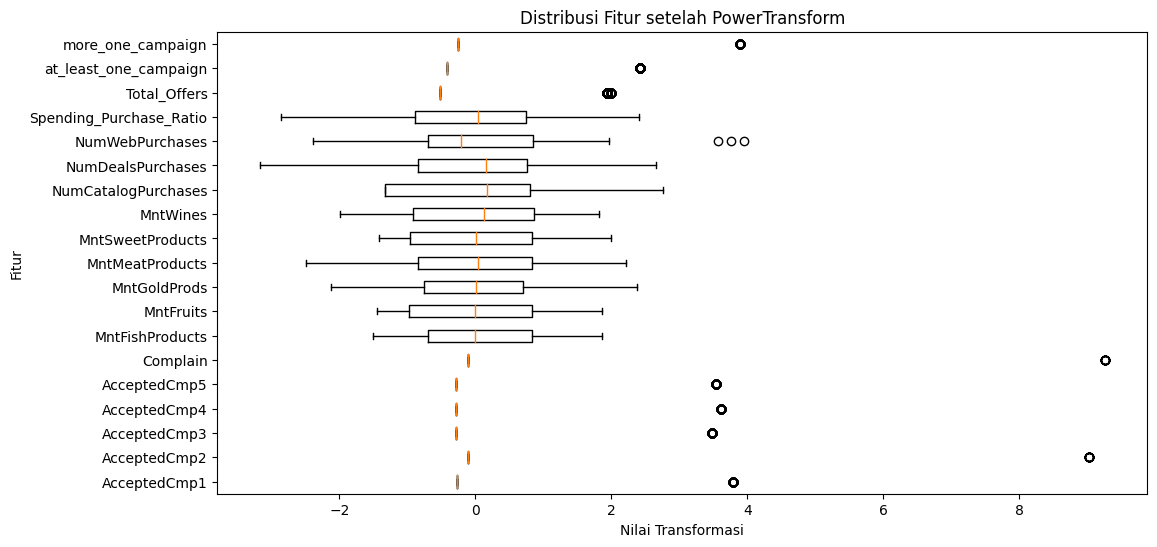

In [ ]:
# menggunakan powertransformer untuk transformasi features pada log_cols
from sklearn.preprocessing import PowerTransformer

# melakukan transformasi
scaler = PowerTransformer(method='yeo-johnson')
data_train[log_cols] = scaler.fit_transform(data_train[log_cols])
data_test[log_cols] = scaler.transform(data_test[log_cols])

# menampilkan distribusi fitur-fitur setelah PowerTransform
plt.figure(figsize=(12, 6))
plt.boxplot(data_train[log_cols], vert=False, labels=data_train[log_cols].columns)
plt.title('Distribusi Fitur setelah PowerTransform')
plt.xlabel('Nilai Transformasi')
plt.ylabel('Fitur')
plt.show()

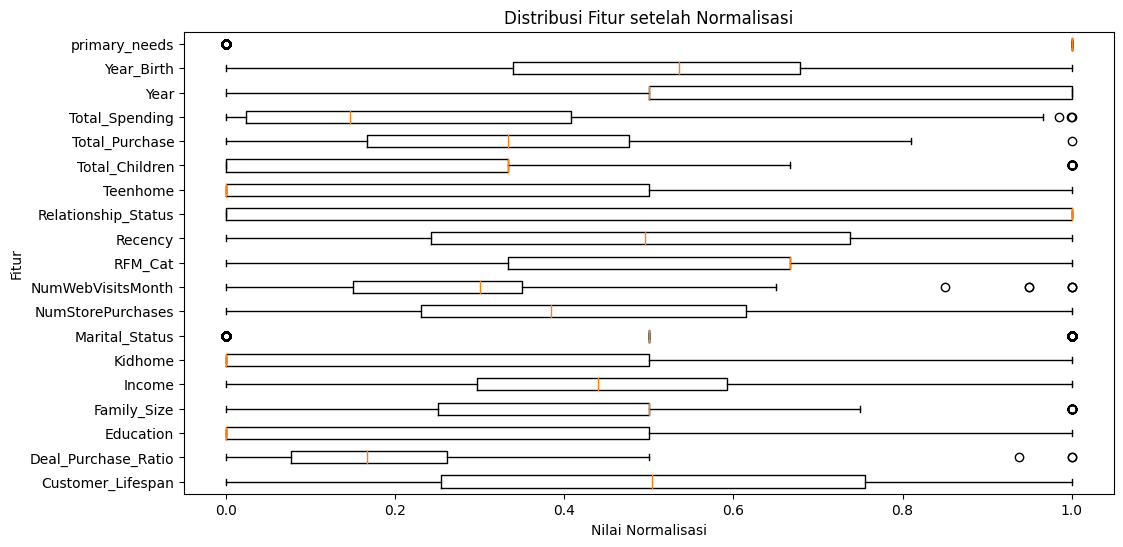

In [ ]:
# menggunakan powertransformer untuk transformasi features
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
data_train[norm_cols] = minmax.fit_transform(data_train[norm_cols])
data_test[norm_cols] = minmax.transform(data_test[norm_cols])

# menampilkan distribusi fitur-fitur setelah Normalisasi
plt.figure(figsize=(12, 6))
plt.boxplot(data_train[norm_cols], vert=False,
            labels=data_train[norm_cols].columns)
plt.title('Distribusi Fitur setelah Normalisasi')
plt.xlabel('Nilai Normalisasi')
plt.ylabel('Fitur')
plt.show()

## **4.9 Feature Selection** <a id=4.9></a>

In [ ]:
# backup
data_before_feature_selection_train = data_train.copy()
data_before_feature_selection_test = data_test.copy()

In [ ]:
# restore
data_train = data_before_feature_selection_train.copy()
data_train.head()

Year_Birth  Education  Marital_Status    Income  Kidhome  Teenhome  \
0    0.178571        0.0             0.0  0.134665      0.0       0.0   
1    0.410714        0.5             0.0  0.557668      0.0       0.5   
2    0.553571        1.0             0.5  0.627112      0.0       0.5   
3    0.500000        1.0             0.5  0.245143      0.5       0.0   
4    0.517857        0.0             0.5  0.024088      0.0       0.5   

    Recency  MntWines  MntFruits  MntMeatProducts  ...  Year  Total_Purchase  \
0  0.494949 -1.523740  -0.004248        -1.040166  ...   0.5        0.119048   
1  0.303030  0.756515   0.356628         0.698862  ...   0.5        0.547619   
2  0.595960  1.453882  -1.447016         0.121258  ...   0.0        0.428571   
3  0.434343 -0.859859  -1.447016        -1.365005  ...   0.5        0.095238   
4  0.000000 -1.062296  -0.380042        -0.991477  ...   0.5        0.571429   

   Total_Spending  Total_Offers  Spending_Purchase_Ratio  Deal_Purchase_Ratio  \
0        0.016687      1.932145                -0.991174             0.166667   
1        0.324593     -0.512632                 0.471277             0.125000   
2        0.428288      1.932145                 1.036242             0.157895   
3        0.010330     -0.512632                -1.182550             0.200000   
4        0.139452     -0.512632                -0.453045             0.000000   

   at_least_one_campaign  more_one_campaign  primary_needs   RFM_Cat  
0               2.416231          -0.256859            0.0  0.333333  
1              -0.413868          -0.256859            1.0  0.666667  
2               2.416231          -0.256859            1.0  0.666667  
3              -0.413868          -0.256859            1.0  0.333333  
4              -0.413868          -0.256859            1.0  0.666667  

[5 rows x 39 columns]

In [ ]:
# memisahkan feature berdasarkan tipe data cat/object dan numerik
num_cols = []
cat_cols = []

# melakukan perulangan setiap feature sesuai dengan tipe data
for col in data_before_encoding.drop(['Response','feature'], axis=1).columns:
    if data_before_encoding[col].dtype == 'int64' or data_before_encoding[col].dtype == 'float64':
        num_cols.append(col)
    elif data_before_encoding[col].dtype == 'object' or data_before_encoding[col].dtype == 'category':
        cat_cols.append(col)

# print hasilnya yang disimpan pada masing-masing feature
print(f'Total Numeric Columns : {len(num_cols)}')
print(f'Total Object Columns  : {len(cat_cols)}')

Total Numeric Columns : 33
Total Object Columns  : 5


### **4.9.1 Based on Anova (Numerical-Categorical)** <a id=4.9.1></a>

In [ ]:
# memisahkan X dan y sebagai feature dan target
X_train = data_train.drop('Response', axis=1)
y_train = data_train['Response']

X_test = data_test.drop('Response', axis=1)
y_test = data_test['Response']


Tabel Feature yang Dipilih:
                    Feature  F_Statistic       P_Value
23             Total_Offers   292.373006  1.835470e-60
27        more_one_campaign   246.157183  8.332075e-52
14             AcceptedCmp5   212.448003  2.363466e-45
15             AcceptedCmp1   179.074224  7.643053e-39
22           Total_Spending   126.699997  2.281261e-28
12             AcceptedCmp3   118.700317  9.721559e-27
11      NumCatalogPurchases   102.398177  2.159944e-23
24  Spending_Purchase_Ratio    98.001782  1.750366e-22
18              Family_Size    95.648147  5.379007e-22
6           MntMeatProducts    93.846780  1.271728e-21
3                   Recency    80.756569  6.823586e-19
26    at_least_one_campaign    66.710987  6.192657e-16
9              MntGoldProds    65.667004  1.030405e-15
4                  MntWines    64.506086  1.816035e-15
19        Customer_Lifespan    59.696130  1.911319e-14
17           Total_Children    59.358758  2.255200e-14
13             AcceptedCmp4    54.31

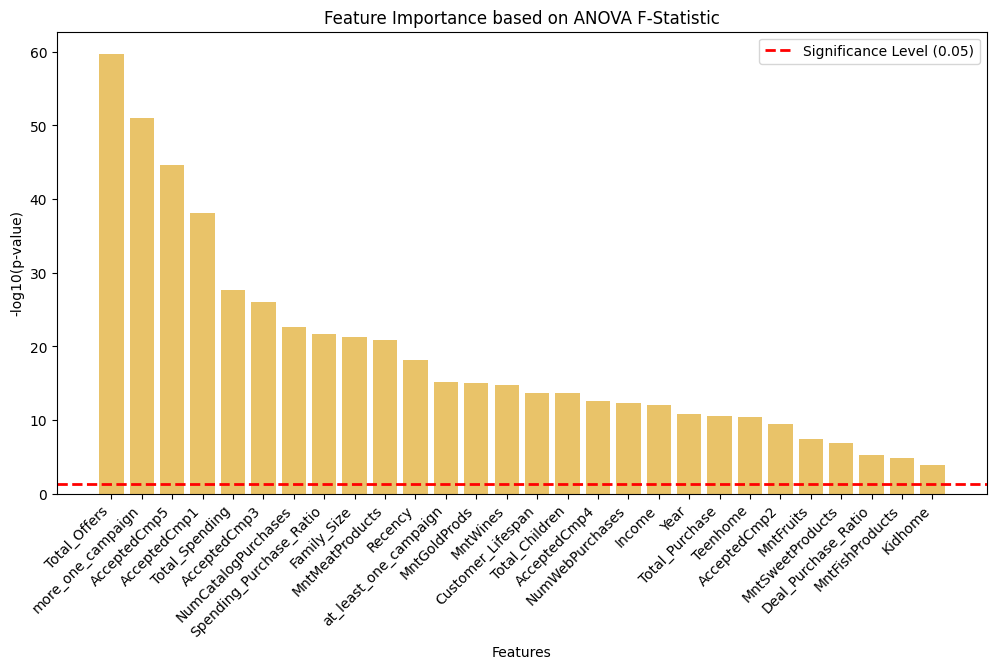

In [ ]:
# melakukan features selection menggunakan f_classif (anova)
from sklearn.feature_selection import f_classif

# menghitung nilai F-statistic dan p-value untuk setiap feature
f_statistic, p_values = f_classif(X_train[num_cols], y_train)

# menentukan tingkat signifikansi (alpha)
alpha = 0.05

# memilih feature yang memiliki p-value kurang dari 0.05 (95%, tingkat signifikansi umumnya digunakan)
selected_features_indices = np.where(p_values < alpha)[0]
selected_feature_names = X_train[num_cols].columns[selected_features_indices].tolist()

# membuat DataFrame dengan informasi F-statistic dan p-value untuk fitur yang dipilih
selected_features_anova = pd.DataFrame({
    'Feature': selected_feature_names,
    'F_Statistic': f_statistic[selected_features_indices],
    'P_Value': p_values[selected_features_indices]
})
# mengurutkan DataFrame berdasarkan F-statistic secara descending
selected_features_anova = selected_features_anova.sort_values(by='F_Statistic', ascending=False)

# menampilkan feature yang dipilih beserta skor F-statistic dalam bentuk tabel
print("\nTabel Feature yang Dipilih:")
print(selected_features_anova)

# menampilkan skor dalam bentuk plot
plt.figure(figsize=(12, 6))
plt.bar(selected_features_anova['Feature'], -np.log10(selected_features_anova['P_Value']), color='#e9c369')
plt.axhline(-np.log10(alpha), color='red', linestyle='dashed', linewidth=2, label=f'Significance Level ({alpha})')
plt.title('Feature Importance based on ANOVA F-Statistic')
plt.xlabel('Features')
plt.ylabel('-log10(p-value)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [ ]:
X_train_anova = X_train.loc[:,selected_feature_names]
X_test_anova = X_test.loc[:,selected_feature_names]

### **4.9.2 Based on Chi-Square (Categorical-Categorical)** <a id=4.9.2></a>


Tabel Feature yang Dipilih:
               Feature  Chi_Statistic   P_Value
2              RFM_Cat      19.379965  0.000011
1  Relationship_Status      13.154564  0.000287
0            Education       4.374336  0.036484


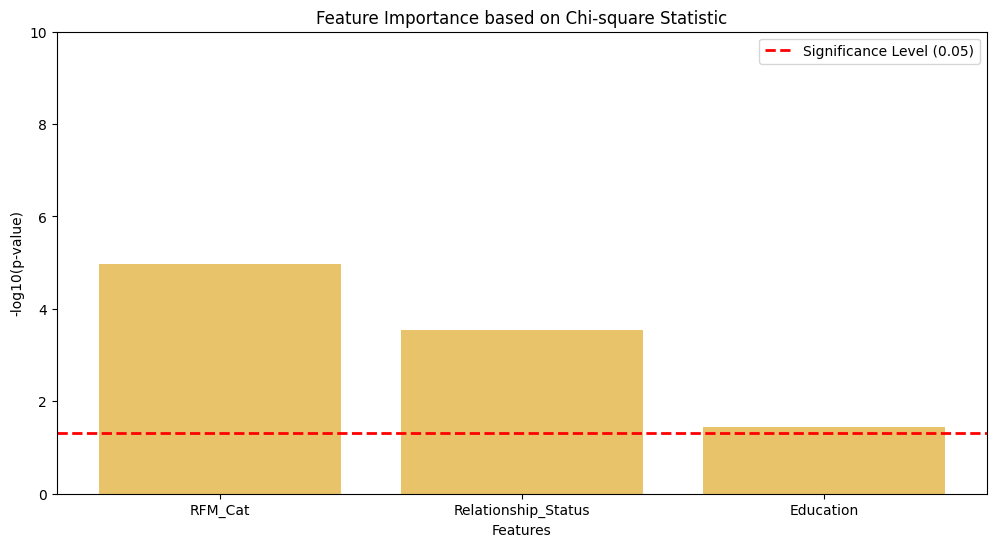

In [ ]:
# melakukan features selection menggunakan chi-square test
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# menghitung chi-square statistic dan p-value untuk setiap feature
chi2_stat, p_values_chi2 = chi2(X_train[cat_cols], y_train)

# menentukan tingkat signifikansi (alpha)
alpha = 0.05

# memilih feature yang memiliki p-value kurang dari 0.05 (95% confidence level)
selected_features_chi2_indices = np.where(p_values_chi2 < alpha)[0]
selected_features_chi2_names = X_train[cat_cols].columns[selected_features_chi2_indices].tolist(
)

# membuat DataFrame dengan informasi Chi-statistic dan p-value untuk fitur yang dipilih
selected_features_chi = pd.DataFrame({
    'Feature': selected_features_chi2_names,
    'Chi_Statistic': chi2_stat[selected_features_chi2_indices],
    'P_Value': p_values_chi2[selected_features_chi2_indices]
})
# mengurutkan DataFrame berdasarkan Chi-statistic secara descending
selected_features_chi = selected_features_chi.sort_values(
    by='Chi_Statistic', ascending=False)

# menampilkan feature yang dipilih beserta skor Chi-statistic dalam bentuk tabel
print("\nTabel Feature yang Dipilih:")
print(selected_features_chi)

# menampilkan skor dalam bentuk plot
plt.figure(figsize=(12, 6))
plt.bar(selected_features_chi['Feature'], -
        np.log10(selected_features_chi['P_Value']), color='#e9c369')
plt.axhline(-np.log10(alpha), color='red', linestyle='dashed',
            linewidth=2, label=f'Significance Level ({alpha})')
plt.title('Feature Importance based on Chi-square Statistic')
plt.xlabel('Features')
plt.ylabel('-log10(p-value)')
plt.xticks(rotation=0, ha='center')
plt.ylim(0, 10)  # Mengatur skala ylim dari 0 hingga 10
plt.legend()
plt.show()

In [ ]:
X_train_chi2 = X_train.loc[:,selected_features_chi2_names]
X_test_chi2 = X_test.loc[:,selected_features_chi2_names]

In [ ]:
# concat selected features from anova dan chi2
X_train = pd.concat([X_train_anova, X_train_chi2], axis=1)
X_test = pd.concat([X_test_anova, X_test_chi2], axis=1)

### **4.9.3 Redundancy Analysis** <a id=4.9.3></a>

#### **Variance Inflation Factor (VIF)**

VIF mengukur seberapa jauh variabilitas suatu variabel independen dapat dijelaskan oleh variabel independen lain dalam model. Sebagai aturan umum, nilai VIF yang tinggi (biasanya di atas 10) menunjukkan adanya masalah multikolinearitas, yang dapat mempengaruhi interpretasi model dan membuat estimasi koefisien menjadi tidak stabil.

##### Langkah-langkah Feature Selection dengan VIF:

1. **Seleksi Awal Fitur:**
   - Lakukan seleksi awal fitur yang ingin dievaluasi dalam model regresi logistik.

2. **Engineering Fitur (Opsional):**
   - Jika diperlukan, Anda dapat membuat fitur baru atau melakukan engineering pada fitur yang ada.

3. **Perhitungan VIF:**
   - Hitung VIF untuk setiap variabel independen dalam model regresi logistik. Biasanya, perangkat lunak statistik seperti Python (menggunakan pustaka seperti Statsmodels atau Scikit-learn) atau R menyediakan fungsi untuk menghitung VIF.

4. **Evaluasi VIF:**
   - Evaluasi nilai VIF untuk setiap variabel. Jika nilai VIF melebihi batas tertentu (misalnya, 10), pertimbangkan untuk menghapus variabel tersebut.

5. **Pemodelan Ulang:**
   - Hapus variabel dengan nilai VIF tinggi dan refit model regresi logistik.

6. **Ulangi Langkah 3-5:**
   - Ulangi proses perhitungan VIF dan pemodelan ulang sampai tidak ada lagi variabel dengan nilai VIF yang tinggi.

7. **Evaluasi Kinerja:**
   - Evaluasi kinerja model regresi logistik yang telah di-fit ulang setelah seleksi fitur menggunakan VIF.


In [ ]:
# default feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(
        df.values, i) for i in range(df.shape[1])]
    return vif_data

vif_results = calculate_vif(X_train)
print(f'Avg. VIF Score: {(sum(vif_results["VIF"]/len(vif_results)))}')
vif_results

Avg. VIF Score: inf


Feature           VIF
0                    Income  3.000721e+01
1                   Kidhome           inf
2                  Teenhome           inf
3                   Recency  7.906623e+00
4                  MntWines  1.536519e+01
5                 MntFruits  2.799495e+00
6           MntMeatProducts  1.068134e+01
7           MntFishProducts  2.946718e+00
8          MntSweetProducts  2.689423e+00
9              MntGoldProds  2.795796e+00
10          NumWebPurchases  4.477282e+00
11      NumCatalogPurchases  6.486516e+00
12             AcceptedCmp3  4.820741e+01
13             AcceptedCmp4  4.646552e+01
14             AcceptedCmp5  4.511825e+01
15             AcceptedCmp1  4.010818e+01
16             AcceptedCmp2  5.816116e+00
17           Total_Children           inf
18              Family_Size           inf
19        Customer_Lifespan  1.606089e+01
20                     Year  1.268764e+01
21           Total_Purchase  5.257854e+01
22           Total_Spending  1.959583e+01
23             Total_Offers  2.266641e+07
24  Spending_Purchase_Ratio  2.694432e+01
25      Deal_Purchase_Ratio  1.233535e+01
26    at_least_one_campaign  1.684281e+07
27        more_one_campaign  8.183600e+06
28                Education  2.049095e+00
29      Relationship_Status           inf
30                  RFM_Cat  2.594126e+01

In [ ]:
drop_features = ['Total_Children', 'Kidhome', 'Teenhome', 'at_least_one_campaign', 'more_one_campaign', 'Family_Size', 'Relationship_Status',
                 'Income', 'Year', 'Total_Purchase', 'Spending_Purchase_Ratio', 'Total_Spending', 'Deal_Purchase_Ratio', 'Total_Offers','MntMeatProducts','MntWines']

In [ ]:
# vif score setelah menghapus beberapa feature
vif_results = calculate_vif(X_train.drop(drop_features, axis=1))
print(f'Avg. VIF Score: {(sum(vif_results["VIF"]/len(vif_results)))}')
vif_results

Avg. VIF Score: 2.2793386425396354


Feature       VIF
0               Recency  2.562749
1             MntFruits  2.510120
2       MntFishProducts  2.662851
3      MntSweetProducts  2.489294
4          MntGoldProds  2.186144
5       NumWebPurchases  1.853393
6   NumCatalogPurchases  3.031351
7          AcceptedCmp3  1.103208
8          AcceptedCmp4  1.280283
9          AcceptedCmp5  1.372765
10         AcceptedCmp1  1.306924
11         AcceptedCmp2  1.119148
12    Customer_Lifespan  4.230985
13            Education  1.960772
14              RFM_Cat  4.520092

In [ ]:
# membuat variabel untuk feature selection
selected_features = X_train.drop(drop_features, axis=1).columns
selected_features = sorted(list(selected_features))
selected_features

['AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Customer_Lifespan',
 'Education',
 'MntFishProducts',
 'MntFruits',
 'MntGoldProds',
 'MntSweetProducts',
 'NumCatalogPurchases',
 'NumWebPurchases',
 'RFM_Cat',
 'Recency']

## **4.10 Imbalance Handling** <a id=4.10></a>

In [ ]:
# backup sebelum handling imbalance
X_before_handling_imbalance_training = X_train.copy()
y_before_handling_imbalance_training = y_train.copy()

In [ ]:
# restore point
X_train = X_before_handling_imbalance_training.copy()
y_train = y_before_handling_imbalance_training.copy()

In [ ]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [ ]:
# melakukan imbalace handling pada target
from imblearn.over_sampling import SMOTE

# menampikan jumlah kelas sebelum oversampling
print("Jumlah kelas sebelum oversampling:")
print("Kelas 0:", sum(y_train == 0))
print("Kelas 1:", sum(y_train == 1))

# melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# menampilkan jumlah kelas setelah oversampling
print("\nJumlah kelas setelah oversampling:")
print("Kelas 0:", sum(y_resampled == 0))
print("Kelas 1:", sum(y_resampled == 1))

Jumlah kelas sebelum oversampling:
Kelas 0: 1397
Kelas 1: 251

Jumlah kelas setelah oversampling:
Kelas 0: 1397
Kelas 1: 1397


# **5. Machine Learning Modelling & Evaluation** <a id=5></a>
[back to top](#100)

## **5.1 Modelling** <a id=5.1></a>

In [ ]:
# mendefinisikan X (features) dan y (target), dimana X dan y hasil dari imbalance handling sebelumnya
X_train = X_resampled
y_train = y_resampled

In [ ]:
from sklearn.model_selection import learning_curve, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, accuracy_score, make_scorer, log_loss
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2794 entries, 0 to 2793
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AcceptedCmp1         2794 non-null   float64
 1   AcceptedCmp2         2794 non-null   float64
 2   AcceptedCmp3         2794 non-null   float64
 3   AcceptedCmp4         2794 non-null   float64
 4   AcceptedCmp5         2794 non-null   float64
 5   Customer_Lifespan    2794 non-null   float64
 6   Education            2794 non-null   float64
 7   MntFishProducts      2794 non-null   float64
 8   MntFruits            2794 non-null   float64
 9   MntGoldProds         2794 non-null   float64
 10  MntSweetProducts     2794 non-null   float64
 11  NumCatalogPurchases  2794 non-null   float64
 12  NumWebPurchases      2794 non-null   float64
 13  RFM_Cat              2794 non-null   float64
 14  Recency              2794 non-null   float64
dtypes: float64(15)
memory usage: 327.5 KB


In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Learning Curve for Precision
    axes[0].set_title(f"{title} - Precision")
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(precision_score, average='weighted'))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes[0].legend(loc="best")

    # Learning Curve for Loss
    axes[1].set_title(f"{title} - Loss")
    if ylim is not None:
        axes[1].set_ylim(*ylim)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("Loss")

    train_sizes, train_loss, test_loss = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(log_loss, needs_proba=True))

    train_loss_mean = np.mean(train_loss, axis=1)
    train_loss_std = np.std(train_loss, axis=1)
    test_loss_mean = np.mean(test_loss, axis=1)
    test_loss_std = np.std(test_loss, axis=1)

    axes[1].grid()
    axes[1].fill_between(train_sizes, train_loss_mean - train_loss_std,
                         train_loss_mean + train_loss_std, alpha=0.1,
                         color="r")
    axes[1].fill_between(train_sizes, test_loss_mean - test_loss_std,
                         test_loss_mean + test_loss_std, alpha=0.1, color="g")
    axes[1].plot(train_sizes, train_loss_mean, 'o-', color="r", label="Training loss")
    axes[1].plot(train_sizes, test_loss_mean, 'o-', color="g", label="Cross-validation loss")
    axes[1].legend(loc="best")

    plt.tight_layout()
    return plt

In [ ]:
def models_precision(X_train, y_train, X_test, y_test):
    models = [
        SVC(probability=True, random_state=42),
        XGBClassifier(max_depth=1, random_state=42),
        AdaBoostClassifier(random_state=42)
    ]

    results_list_test = []
    results_list_train = []
    results_list_diff = []
    results_list_diff_pct = []

    for model in models:
        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='precision')
        avg_cv_precision = cv_scores.mean()

        model.fit(X_train, y_train)

        # Learning Curve
        # plot_learning_curve(model, f"{type(model).__name__}", X_train, y_train, cv=5)

        # test set evaluation
        y_pred_test = model.predict(X_test)
        precision_test = precision_score(y_test, y_pred_test, average='weighted')

        results_test = {
            "Model": type(model).__name__,
            "CV Precision": avg_cv_precision,
            "Precision": precision_test
        }
        results_list_test.append(results_test)

        # train set evaluation
        y_pred_train = model.predict(X_train)
        precision_train = precision_score(y_train, y_pred_train, average='weighted')

        results_train = {
            "Model": type(model).__name__,
            "Precision": precision_train
        }
        results_list_train.append(results_train)

        # diff evaluation
        results_diff = {
            "Model": type(model).__name__,
            "Precision_Difference": precision_train - precision_test
        }
        results_list_diff.append(results_diff)

        # diff evaluation pct
        results_diff_pct = {
            "Model": type(model).__name__,
            "Precision_Difference": ((precision_train - precision_test) / precision_train) * 100
        }
        results_list_diff_pct.append(results_diff_pct)

    # dataframe from test and test evaluation
    results_test_df = pd.DataFrame(results_list_test)
    results_test_df.set_index("Model", inplace=True)

    results_train_df = pd.DataFrame(results_list_train)
    results_train_df.set_index("Model", inplace=True)

    # dataframe evaluations diff
    results_diff_df = pd.DataFrame(results_list_diff)
    results_diff_df.set_index("Model", inplace=True)

    # dataframe evaluation diff pct
    results_diff_pct_df = pd.DataFrame(results_list_diff_pct)
    results_diff_pct_df.set_index("Model", inplace=True)

    # new df
    evaluation_df = pd.DataFrame(index=[type(model).__name__ for model in models])
    evaluation_df['CV Precision'] = results_test_df['CV Precision']
    evaluation_df['Precision_Train'] = results_train_df['Precision']
    evaluation_df['Precision_Test'] = results_test_df['Precision']
    evaluation_df['Diff'] = results_diff_df['Precision_Difference']
    evaluation_df['Diff (%)'] = results_diff_pct_df['Precision_Difference']

    return evaluation_df

In [ ]:
def models_accuracy(X_train, y_train, X_test, y_test):
    models = [
        SVC(probability=True, random_state=42),
        XGBClassifier(max_depth=1, random_state=42),
        AdaBoostClassifier(random_state=42)
    ]

    results_list_test = []
    results_list_train = []
    results_list_diff = []
    results_list_diff_pct = []

    for model in models:
        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        avg_cv_accuracy = cv_scores.mean()

        model.fit(X_train, y_train)

        # Learning Curve
        # plot_learning_curve(model, f"{type(model).__name__}", X_train, y_train, cv=5)

        # test set evaluation
        y_pred_test = model.predict(X_test)
        accuracy_test = accuracy_score(y_test, y_pred_test)

        results_test = {
            "Model": type(model).__name__,
            "CV Accuracy": avg_cv_accuracy,
            "Accuracy": accuracy_test
        }
        results_list_test.append(results_test)

        # train set evaluation
        y_pred_train = model.predict(X_train)
        accuracy_train = accuracy_score(y_train, y_pred_train)

        results_train = {
            "Model": type(model).__name__,
            "Accuracy": accuracy_train
        }
        results_list_train.append(results_train)

        # diff evaluation
        results_diff = {
            "Model": type(model).__name__,
            "Accuracy_Difference": accuracy_train - accuracy_test
        }
        results_list_diff.append(results_diff)

        # diff evaluation pct
        results_diff_pct = {
            "Model": type(model).__name__,
            "Accuracy_Difference": ((accuracy_train - accuracy_test) / accuracy_train) * 100
        }
        results_list_diff_pct.append(results_diff_pct)

    # dataframe from test and test evaluation
    results_test_df = pd.DataFrame(results_list_test)
    results_test_df.set_index("Model", inplace=True)

    results_train_df = pd.DataFrame(results_list_train)
    results_train_df.set_index("Model", inplace=True)

    # dataframe evaluations diff
    results_diff_df = pd.DataFrame(results_list_diff)
    results_diff_df.set_index("Model", inplace=True)

    # dataframe evaluation diff pct
    results_diff_pct_df = pd.DataFrame(results_list_diff_pct)
    results_diff_pct_df.set_index("Model", inplace=True)

    # new df
    evaluation_df = pd.DataFrame(index=[type(model).__name__ for model in models])
    evaluation_df['CV Accuracy'] = results_test_df['CV Accuracy']
    evaluation_df['Accuracy_Train'] = results_train_df['Accuracy']
    evaluation_df['Accuracy_Test'] = results_test_df['Accuracy']
    evaluation_df['Diff'] = results_diff_df['Accuracy_Difference']
    evaluation_df['Diff (%)'] = results_diff_pct_df['Accuracy_Difference']

    return evaluation_df

In [ ]:
def model_tuning_precision(X_train, y_train, X_test, y_test, params_list, model_type='svc'):
    results_list = []

    for idx, params in enumerate(params_list):
        param_name = f"param_{idx+1}"

        if model_type.lower() == 'svc':
            model = SVC(**params, probability=True, random_state=42)
        elif model_type.lower() == 'xgbclassifier':
            model = XGBClassifier(**params, max_depth=1, random_state=42)
        elif model_type.lower() == 'adaboost':
            model = AdaBoostClassifier(**params, random_state=42)
        else:
            raise ValueError("Invalid model type. Supported types are 'svc', 'xgbclassifier', and 'adaboost'.")

        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='precision')
        avg_cv_precision = cv_scores.mean()

        model.fit(X_train, y_train)

        # train set evaluation
        y_pred_train = model.predict(X_train)
        precision_train = precision_score(y_train, y_pred_train, average='weighted')

        # test set evaluation
        y_pred_test = model.predict(X_test)
        precision_test = precision_score(y_test, y_pred_test, average='weighted')

        results = {
            "Parameter Set": param_name,
            "Model": type(model).__name__,
            "CV Precision": avg_cv_precision,
            "Precision_Train": precision_train,
            "Precision_Test": precision_test,
            "Diff": precision_train - precision_test,
            "Diff (%)": ((precision_train - precision_test) / precision_train) * 100,
            "Parameters": str(params)
        }
        results_list.append(results)

    # Create DataFrame from results list
    evaluation_df = pd.DataFrame(results_list)
    evaluation_df.set_index("Parameter Set", inplace=True)

    return evaluation_df

In [ ]:
def model_tuning_accuracy(X_train, y_train, X_test, y_test, params_list, model_type='svc'):
    results_list = []

    for idx, params in enumerate(params_list):
        param_name = f"param_{idx+1}"

        if model_type.lower() == 'svc':
            model = SVC(**params, probability=True, random_state=42)
        elif model_type.lower() == 'xgbclassifier':
            model = XGBClassifier(**params, max_depth=1, random_state=42)
        elif model_type.lower() == 'adaboost':
            model = AdaBoostClassifier(**params, random_state=42)
        else:
            raise ValueError("Invalid model type. Supported types are 'svc', 'xgbclassifier', and 'adaboost'.")

        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        avg_cv_accuracy = cv_scores.mean()

        model.fit(X_train, y_train)

        # train set evaluation
        y_pred_train = model.predict(X_train)
        accuracy_train = accuracy_score(y_train, y_pred_train)

        # test set evaluation
        y_pred_test = model.predict(X_test)
        accuracy_test = accuracy_score(y_test, y_pred_test)

        results = {
            "Parameter Set": param_name,
            "Model": type(model).__name__,
            "CV Accuracy": avg_cv_accuracy,
            "Accuracy_Train": accuracy_train,
            "Accuracy_Test": accuracy_test,
            "Diff": accuracy_train - accuracy_test,
            "Diff (%)": ((accuracy_train - accuracy_test) / accuracy_train) * 100,
            "Parameters": str(params)
        }
        results_list.append(results)

    # Create DataFrame from results list
    evaluation_df = pd.DataFrame(results_list)
    evaluation_df.set_index("Parameter Set", inplace=True)

    return evaluation_df

### **Default Parameter**

In [ ]:
# first metric (precision)
default_precision = models_precision(X_train, y_train, X_test, y_test)
default_precision

CV Precision  Precision_Train  Precision_Test      Diff  \
SVC                     0.799378         0.856226        0.836876  0.019350   
XGBClassifier           0.847233         0.864785        0.827637  0.037148   
AdaBoostClassifier      0.872463         0.879967        0.822993  0.056974   

                    Diff (%)  
SVC                 2.259904  
XGBClassifier       4.295622  
AdaBoostClassifier  6.474576

In [ ]:
# second metric (accuracy)
default_accuracy = models_accuracy(X_train, y_train, X_test, y_test)
default_accuracy

CV Accuracy  Accuracy_Train  Accuracy_Test      Diff  \
SVC                    0.832502        0.852899       0.743119  0.109780   
XGBClassifier          0.840023        0.864710       0.807339  0.057371   
AdaBoostClassifier     0.861142        0.879742       0.816514  0.063229   

                     Diff (%)  
SVC                 12.871371  
XGBClassifier        6.634668  
AdaBoostClassifier   7.187166

### **Hyperparameter Tuning**

### **Precision**

#### **SVM**

In [ ]:
# precision tuning
# define model and parameters
model = SVC(probability=True)
kernel = ['poly', 'rbf', 'linear']
C = [1, 2, 3, 4, 5]
gamma = ['scale', 'auto']

# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='precision', error_score=0, return_train_score=True)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means_test = grid_result.cv_results_['mean_test_score']
means_train = grid_result.cv_results_['mean_train_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean_test, mean_train, stdev, param in zip(means_test, means_train, stds, params):
    print(f"{mean_test}, {mean_train}, {stdev} with: {param}")

Best: 0.874959 using {'C': 3, 'gamma': 'auto', 'kernel': 'poly'}
0.8644953563104041, 0.8929407815319182, 0.01856815437095068 with: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
0.7993784604063702, 0.8210307612871779, 0.012063588854681057 with: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.7922502890434228, 0.793926676438712, 0.003878999368544625 with: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.8648059951888861, 0.892933514050925, 0.017988902787741075 with: {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
0.8008227825365651, 0.8226624910842218, 0.01080446522967414 with: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.7922502890434228, 0.793926676438712, 0.003878999368544625 with: {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
0.8697615356892001, 0.8999971848486954, 0.02252521870767744 with: {'C': 2, 'gamma': 'scale', 'kernel': 'poly'}
0.818454516247957, 0.844862851865334, 0.010662542618646867 with: {'C': 2, 'gamma': 'scale', 'kernel': 'rbf'}
0.7908714261187912, 0.7949764167038232, 0.0041331

In [ ]:
# evaluation results - precision
svc_tuning_precision = model_tuning_precision(X_train, y_train, X_test, y_test, params, model_type='svc')
svc_tuning_precision

Model  CV Precision  Precision_Train  Precision_Test      Diff  \
Parameter Set                                                                  
param_1         SVC      0.864495         0.814202        0.804183  0.010019   
param_2         SVC      0.799378         0.856226        0.836876  0.019350   
param_3         SVC      0.792250         0.807795        0.846378 -0.038583   
param_4         SVC      0.864806         0.817847        0.804183  0.013664   
param_5         SVC      0.800823         0.857977        0.833500  0.024477   
param_6         SVC      0.792250         0.807795        0.846378 -0.038583   
param_7         SVC      0.869762         0.832848        0.811858  0.020990   
param_8         SVC      0.818455         0.876420        0.821935  0.054485   
param_9         SVC      0.790871         0.807753        0.847020 -0.039267   
param_10        SVC      0.873749         0.837537        0.814110  0.023427   
param_11        SVC      0.822184         0.878579        0.825903  0.052676   
param_12        SVC      0.790871         0.807753        0.847020 -0.039267   
param_13        SVC      0.874557         0.840083        0.810913  0.029170   
param_14        SVC      0.829484         0.888494        0.825154  0.063340   
param_15        SVC      0.790577         0.808051        0.846378 -0.038327   
param_16        SVC      0.874959         0.844516        0.807559  0.036957   
param_17        SVC      0.830412         0.888974        0.820530  0.068444   
param_18        SVC      0.790577         0.808051        0.846378 -0.038327   
param_19        SVC      0.871936         0.847879        0.810913  0.036966   
param_20        SVC      0.836304         0.896172        0.825212  0.070960   
param_21        SVC      0.789915         0.807673        0.846378 -0.038705   
param_22        SVC      0.871539         0.852063        0.806533  0.045530   
param_23        SVC      0.838417         0.895851        0.821919  0.073932   
param_24        SVC      0.789915         0.807673        0.846378 -0.038705   
param_25        SVC      0.870785         0.853597        0.809886  0.043711   
param_26        SVC      0.840256         0.898973        0.822615  0.076358   
param_27        SVC      0.791099         0.808051        0.846378 -0.038327   
param_28        SVC      0.871803         0.857475        0.816533  0.040941   
param_29        SVC      0.843025         0.901236        0.822615  0.078621   
param_30        SVC      0.791099         0.808051        0.846378 -0.038327   

               Diff (%)                                      Parameters  
Parameter Set                                                            
param_1        1.230524    {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}  
param_2        2.259904     {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}  
param_3       -4.776376  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}  
param_4        1.670685     {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}  
param_5        2.852910      {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}  
param_6       -4.776376   {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}  
param_7        2.520239    {'C': 2, 'gamma': 'scale', 'kernel': 'poly'}  
param_8        6.216769     {'C': 2, 'gamma': 'scale', 'kernel': 'rbf'}  
param_9       -4.861221  {'C': 2, 'gamma': 'scale', 'kernel': 'linear'}  
param_10       2.797151     {'C': 2, 'gamma': 'auto', 'kernel': 'poly'}  
param_11       5.995626      {'C': 2, 'gamma': 'auto', 'kernel': 'rbf'}  
param_12      -4.861221   {'C': 2, 'gamma': 'auto', 'kernel': 'linear'}  
param_13       3.472247    {'C': 3, 'gamma': 'scale', 'kernel': 'poly'}  
param_14       7.128920     {'C': 3, 'gamma': 'scale', 'kernel': 'rbf'}  
param_15      -4.743093  {'C': 3, 'gamma': 'scale', 'kernel': 'linear'}  
param_16       4.376101     {'C': 3, 'gamma': 'auto', 'kernel': 'poly'}  
param_17       7.699262      {'C': 3, 'gamma': 'auto', 'kernel': 'rbf'}  
param_18      -4.743093   {'C': 3, 'gamma': 'au

In [ ]:
# filter parameter - precision
filter = (svc_tuning_precision['CV Precision'] > 0.8) & (svc_tuning_precision['Diff'] > 0)
svc_tuning_precision[filter].sort_values(by=['CV Precision','Diff'], ascending=[False,True]).nlargest(3, columns=['CV Precision'])

Model  CV Precision  Precision_Train  Precision_Test      Diff  \
Parameter Set                                                                  
param_16        SVC      0.874959         0.844516        0.807559  0.036957   
param_13        SVC      0.874557         0.840083        0.810913  0.029170   
param_10        SVC      0.873749         0.837537        0.814110  0.023427   

               Diff (%)                                    Parameters  
Parameter Set                                                          
param_16       4.376101   {'C': 3, 'gamma': 'auto', 'kernel': 'poly'}  
param_13       3.472247  {'C': 3, 'gamma': 'scale', 'kernel': 'poly'}  
param_10       2.797151   {'C': 2, 'gamma': 'auto', 'kernel': 'poly'}

In [ ]:
# get parameter
params_svc_precision = svc_tuning_precision.loc['param_10']
params_svc_precision['Parameters']

"{'C': 2, 'gamma': 'auto', 'kernel': 'poly'}"

#### **XGB Classifier**

In [ ]:
# Define XGBClassifier model and parameters
model = XGBClassifier(max_depth=1)
objective = ['reg:squarederror','binary:logistic','reg:logistic']
learning_rate = [0.3, 0.5, 0.8, 1.0]
n_estimators = [50, 100, 150, 200]
subsample = [0.8, 0.9, 1.0]
colsample_bytree = [0.8, 0.9, 1.0]
gamma = [1,2,3]

# Define grid search
grid = dict(objective=objective, learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, colsample_bytree=colsample_bytree, gamma=gamma)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='precision', error_score=0, return_train_score=True)
grid_result = grid_search.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means_test = grid_result.cv_results_['mean_test_score']
means_train = grid_result.cv_results_['mean_train_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean_test, mean_train, stdev, param in zip(means_test, means_train, stds, params):
    print(f"{mean_test}, {mean_train}, {stdev} with: {param}")

Best: 0.910658 using {'colsample_bytree': 1.0, 'gamma': 2, 'learning_rate': 0.8, 'n_estimators': 150, 'objective': 'binary:logistic', 'subsample': 0.8}
0.8299457744641299, 0.8389208943404004, 0.014888192993427939 with: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.3, 'n_estimators': 50, 'objective': 'reg:squarederror', 'subsample': 0.8}
0.8293090267767853, 0.8398972118929592, 0.008221253825128958 with: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.3, 'n_estimators': 50, 'objective': 'reg:squarederror', 'subsample': 0.9}
0.8293335554208031, 0.8373391538639574, 0.010104068645862965 with: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.3, 'n_estimators': 50, 'objective': 'reg:squarederror', 'subsample': 1.0}
0.8228856680385596, 0.8342904887499492, 0.01706061828633937 with: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.3, 'n_estimators': 50, 'objective': 'binary:logistic', 'subsample': 0.8}
0.8216838405322011, 0.8355145170747902, 0.0162660466425347

In [ ]:
xgb_tuning_precision = model_tuning_precision(X_train, y_train, X_test, y_test, params, model_type='xgbclassifier')
xgb_tuning_precision

Model  CV Precision  Precision_Train  Precision_Test  \
Parameter Set                                                                 
param_1        XGBClassifier      0.825169         0.850661        0.835631   
param_2        XGBClassifier      0.828413         0.845522        0.833142   
param_3        XGBClassifier      0.826268         0.840944        0.827472   
param_4        XGBClassifier      0.820744         0.837713        0.827491   
param_5        XGBClassifier      0.816850         0.836493        0.829966   
...                      ...           ...              ...             ...   
param_1292     XGBClassifier      0.900328         0.915380        0.840051   
param_1293     XGBClassifier      0.878870         0.895441        0.823811   
param_1294     XGBClassifier      0.905373         0.922569        0.819691   
param_1295     XGBClassifier      0.900328         0.915380        0.840051   
param_1296     XGBClassifier      0.878870         0.895441        0.823811   

                   Diff   Diff (%)  \
Parameter Set                        
param_1        0.015030   1.766848   
param_2        0.012380   1.464172   
param_3        0.013472   1.601998   
param_4        0.010222   1.220218   
param_5        0.006527   0.780327   
...                 ...        ...   
param_1292     0.075329   8.229262   
param_1293     0.071630   7.999425   
param_1294     0.102878  11.151284   
param_1295     0.075329   8.229262   
param_1296     0.071630   7.999425   

                                                      Parameters  
Parameter Set                                                     
param_1        {'colsample_bytree': 0.8, 'gamma': 1, 'learnin...  
param_2        {'colsample_bytree': 0.8, 'gamma': 1, 'learnin...  
param_3        {'colsample_bytree': 0.8, 'gamma': 1, 'learnin...  
param_4        {'colsample_bytree': 0.8, 'gamma': 1, 'learnin...  
param_5        {'colsample_bytree': 0.8, 'gamma': 1, 'learnin...  
...                                                          ...  
param_1292     {'colsample_bytree': 1.0, 'gamma': 3, 'learnin...  
param_1293     {'colsample_bytree': 1.0, 'gamma': 3, 'learnin...  
param_1294     {'colsample_bytree': 1.0, 'gamma': 3, 'learnin...  
param_1295     {'colsample_bytree': 1.0, 'gamma': 3, 'learnin...  
param_1296     {'colsample_bytree': 1.0, 'gamma': 3, 'learnin...  

[1296 rows x 7 columns]

In [ ]:
# filter parameter - precision
filter = (xgb_tuning_precision['CV Precision'] > 0.8) & (xgb_tuning_precision['Diff'] > 0)
xgb_tuning_precision[filter].sort_values(by=['CV Precision','Diff'], ascending=[False,True]).nlargest(3, columns=['CV Precision'])

Model  CV Precision  Precision_Train  Precision_Test  \
Parameter Set                                                                 
param_140      XGBClassifier      0.912467         0.922357        0.818055   
param_143      XGBClassifier      0.912467         0.922357        0.818055   
param_1147     XGBClassifier      0.912229         0.924031        0.835093   

                   Diff   Diff (%)  \
Parameter Set                        
param_140      0.104302  11.308190   
param_143      0.104302  11.308190   
param_1147     0.088938   9.625034   

                                                      Parameters  
Parameter Set                                                     
param_140      {'colsample_bytree': 0.8, 'gamma': 1, 'learnin...  
param_143      {'colsample_bytree': 0.8, 'gamma': 1, 'learnin...  
param_1147     {'colsample_bytree': 1.0, 'gamma': 2, 'learnin...

In [ ]:
# get parameter
params_xgb_precision = xgb_tuning_precision.loc['param_140']
params_xgb_precision['Parameters']

"{'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 1.0, 'n_estimators': 200, 'objective': 'binary:logistic', 'subsample': 0.9}"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mean Precision: 0.9124665259093071
Standard Deviation of Precision: 0.016099837171287733


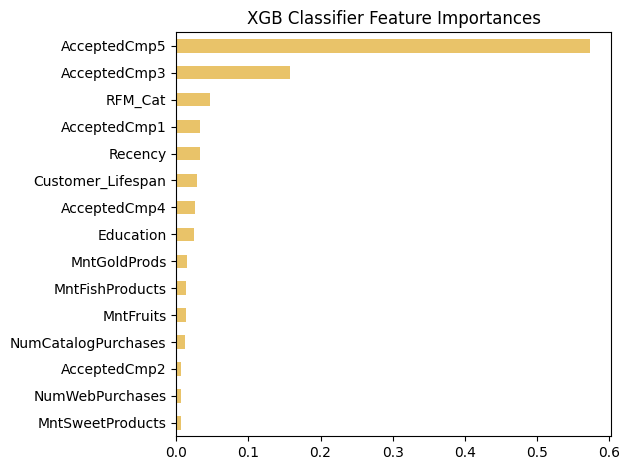

In [ ]:
# Initialize XGBoost model
params = {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 1.0, 'n_estimators': 200, 'objective': 'binary:logistic', 'subsample': 0.9}
xgb_model = XGBClassifier(**params, max_depth=1, random_state=42)

# Perform cross-validation with precision as the scoring metric
precision_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='precision')

# Print mean and standard deviation of precision scores
print("Mean Precision:", np.mean(precision_scores))
print("Standard Deviation of Precision:", np.std(precision_scores))

# Fit the model on the entire training data
xgb_model.fit(X_train, y_train)

# Feature importances
importance_xgb = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=True)

# Plotting (using barh for horizontal bar plot)
ax = importance_xgb.plot.barh(align="center", color='#e9c369')
ax.set_title("XGB Classifier Feature Importances")
ax.figure.tight_layout()
plt.show()

#### **AdaBoost Classifier**

In [ ]:
# Define AdaBoostClassifier model and parameters
model = AdaBoostClassifier(random_state=42)
learning_rate = [0.01, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0]
n_estimators = [50, 100, 150, 200]
algorithm = ['SAMME', 'SAMME.R']

# Define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, algorithm=algorithm)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='precision', error_score=0, return_train_score=True)
grid_result = grid_search.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means_test = grid_result.cv_results_['mean_test_score']
means_train = grid_result.cv_results_['mean_train_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean_test, mean_train, stdev, param in zip(means_test, means_train, stds, params):
    print(f"{mean_test}, {mean_train}, {stdev} with: {param}")

Best: 0.908271 using {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}
0.6492129025796463, 0.6483929230586379, 0.016845244587131936 with: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
0.6481665781698287, 0.6536249086884554, 0.015391772893054802 with: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 100}
0.6978192522770351, 0.7011184776316066, 0.023461272691963353 with: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 150}
0.7143417916689243, 0.7218193697536923, 0.02187046474265906 with: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 200}
0.7741031546092639, 0.7910114003195097, 0.020136252906739694 with: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}
0.7920923098178263, 0.808250360899665, 0.022840059522987156 with: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 100}
0.7897202908849246, 0.8101847186221949, 0.019488280391017073 with: {'algorithm': 'SAMME', 'learning_rate': 0.1, '

In [ ]:
adb_tuning_precision = model_tuning_precision(X_train, y_train, X_test, y_test, params, model_type='adaboost')
adb_tuning_precision

Model  CV Precision  Precision_Train  \
Parameter Set                                                      
param_1        AdaBoostClassifier      0.649213         0.711296   
param_2        AdaBoostClassifier      0.648167         0.711701   
param_3        AdaBoostClassifier      0.697819         0.736949   
param_4        AdaBoostClassifier      0.714342         0.737002   
param_5        AdaBoostClassifier      0.774103         0.781595   
param_6        AdaBoostClassifier      0.792092         0.802792   
param_7        AdaBoostClassifier      0.789720         0.820168   
param_8        AdaBoostClassifier      0.798189         0.825283   
param_9        AdaBoostClassifier      0.792266         0.810844   
param_10       AdaBoostClassifier      0.792671         0.816348   
param_11       AdaBoostClassifier      0.805303         0.835488   
param_12       AdaBoostClassifier      0.808808         0.842031   
param_13       AdaBoostClassifier      0.802750         0.817125   
param_14       AdaBoostClassifier      0.811530         0.837601   
param_15       AdaBoostClassifier      0.823586         0.847405   
param_16       AdaBoostClassifier      0.833255         0.855825   
param_17       AdaBoostClassifier      0.810949         0.833202   
param_18       AdaBoostClassifier      0.838313         0.857308   
param_19       AdaBoostClassifier      0.852054         0.871906   
param_20       AdaBoostClassifier      0.855449         0.876164   
param_21       AdaBoostClassifier      0.838551         0.855509   
param_22       AdaBoostClassifier      0.860879         0.880849   
param_23       AdaBoostClassifier      0.866334         0.887425   
param_24       AdaBoostClassifier      0.878023         0.891516   
param_25       AdaBoostClassifier      0.849212         0.871961   
param_26       AdaBoostClassifier      0.863298         0.882214   
param_27       AdaBoostClassifier      0.882157         0.887904   
param_28       AdaBoostClassifier      0.882771         0.893509   
param_29       AdaBoostClassifier      0.649094         0.711996   
param_30       AdaBoostClassifier      0.709983         0.737859   
param_31       AdaBoostClassifier      0.722910         0.752078   
param_32       AdaBoostClassifier      0.742369         0.769917   
param_33       AdaBoostClassifier      0.785239         0.810770   
param_34       AdaBoostClassifier      0.801763         0.818932   
param_35       AdaBoostClassifier      0.818360         0.836725   
param_36       AdaBoostClassifier      0.829634         0.850601   
param_37       AdaBoostClassifier      0.799590         0.823803   
param_38       AdaBoostClassifier      0.833774         0.851398   
param_39       AdaBoostClassifier      0.849246         0.866599   
param_40       AdaBoostClassifier      0.858270         0.876163   
param_41       AdaBoostClassifier      0.822471         0.844017   
param_42       AdaBoostClassifier      0.849987         0.862321   
param_43       AdaBoostClassifier      0.866472         0.878339   
param_44       AdaBoostClassifier      0.876439         0.887056   
param_45       AdaBoostClassifier      0.842847         0.862922   
param_46       AdaBoostClassifier      0.870649         0.885182   
param_47       AdaBoostClassifier      0.886227         0.893469   
param_48       AdaBoostClassifier      0.895547         0.898486   
param_49       AdaBoostClassifier      0.860572         0.881286   
param_50       AdaBoostClassifier      0.891147         0.897105   
param_51       AdaBoostClassifier      0.898972         0.906498   
param_52       AdaBoostClassifier      0.900182         0.912634   
param_53       AdaBoostClassifier      0.872463         0.879967   
param_54       AdaBoostClassifier      0.892958         0.901083   
param_55       AdaBoostClassifier      0.903253         0.910859   
param_56       AdaBoostClassifier      0.908271         0.918675   

               Precision_Test      Diff   Diff (%)  \
Parameter Set                

In [ ]:
# filter parameter - precision
filter = (adb_tuning_precision['CV Precision'] > 0.8) & (adb_tuning_precision['Diff'] > 0)
adb_tuning_precision[filter].sort_values(by=['CV Precision','Diff'], ascending=[False,True]).nlargest(3, columns=['CV Precision'])

Model  CV Precision  Precision_Train  \
Parameter Set                                                      
param_56       AdaBoostClassifier      0.908271         0.918675   
param_55       AdaBoostClassifier      0.903253         0.910859   
param_52       AdaBoostClassifier      0.900182         0.912634   

               Precision_Test      Diff  Diff (%)  \
Parameter Set                                       
param_56             0.843316  0.075359  8.203003   
param_55             0.831003  0.079856  8.767125   
param_52             0.822355  0.090279  9.892101   

                                                      Parameters  
Parameter Set                                                     
param_56       {'algorithm': 'SAMME.R', 'learning_rate': 1.0,...  
param_55       {'algorithm': 'SAMME.R', 'learning_rate': 1.0,...  
param_52       {'algorithm': 'SAMME.R', 'learning_rate': 0.8,...

In [ ]:
# get parameter
params_adb_precision = adb_tuning_precision.loc['param_56']
params_adb_precision['Parameters']

"{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}"

Mean Precision: 0.9082709380712878
Standard Deviation of Precision: 0.02648982805265192


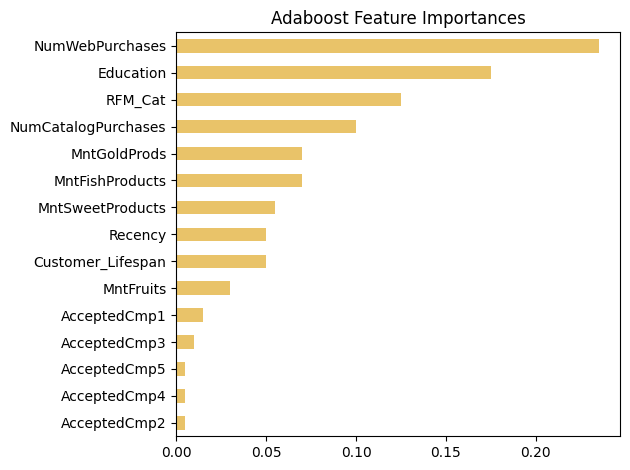

In [ ]:
# Initialize Adaboost with DecisionTreeClassifier as base estimator
params = {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}
adaboost_model = AdaBoostClassifier(**params, random_state=42)

# Perform cross-validation with precision as the scoring metric
precision_scores = cross_val_score(adaboost_model, X_train, y_train, cv=5, scoring='precision')

# Print mean and standard deviation of precision scores
print("Mean Precision:", np.mean(precision_scores))
print("Standard Deviation of Precision:", np.std(precision_scores))

# Fit the model on the entire training data
adaboost_model.fit(X_train, y_train)

# Feature importances
importance_adb = pd.Series(adaboost_model.feature_importances_, index=X_train.columns).sort_values(ascending=True)

# Plotting (using barh for horizontal bar plot)
ax = importance_adb.plot.barh(align="center", color='#e9c369')
ax.set_title("Adaboost Feature Importances")
ax.figure.tight_layout()
plt.show()

### **Accuracy**

#### **SVM**

In [ ]:
# accuracy tuning
# define model and parameters
model = SVC(probability=True)
kernel = ['poly', 'rbf', 'linear']
C = [1, 2, 3, 4, 5]
gamma = ['scale', 'auto']

# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy', error_score=0, return_train_score=True)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means_test = grid_result.cv_results_['mean_test_score']
means_train = grid_result.cv_results_['mean_train_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean_test, mean_train, stdev, param in zip(means_test, means_train, stds, params):
    print(f"{mean_test}, {mean_train}, {stdev} with: {param}")

Best: 0.872946 using {'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}
0.771293464391739, 0.788385539854246, 0.01600741715998074 with: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
0.8325017151723829, 0.851914892765525, 0.01823377390974064 with: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.8060117593500941, 0.8078022435397182, 0.007238425945776351 with: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.777734177134027, 0.794380785439003, 0.013134682520941026 with: {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
0.8342912651239732, 0.8537044818767935, 0.016771402944234844 with: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.8060117593500941, 0.8078022435397182, 0.007238425945776351 with: {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
0.794916036701483, 0.8137073233202466, 0.010315091279536347 with: {'C': 2, 'gamma': 'scale', 'kernel': 'poly'}
0.8507562788132932, 0.8716895783057794, 0.016993674201332572 with: {'C': 2, 'gamma': 'scale', 'kernel': 'rbf'}
0.8045787087797592, 0.8086970180851873, 0.00699149

In [ ]:
# evaluation results - accuracy
svc_tuning_accuracy = model_tuning_accuracy(X_train, y_train, X_test, y_test, params, model_type='svc')
svc_tuning_accuracy

Model  CV Accuracy  Accuracy_Train  Accuracy_Test      Diff  \
Parameter Set                                                               
param_1         SVC     0.771293        0.796349       0.795872  0.000478   
param_2         SVC     0.832502        0.852899       0.743119  0.109780   
param_3         SVC     0.806012        0.807087       0.768349  0.038738   
param_4         SVC     0.777734        0.800644       0.795872  0.004773   
param_5         SVC     0.834291        0.854331       0.740826  0.113505   
param_6         SVC     0.806012        0.807087       0.768349  0.038738   
param_7         SVC     0.794916        0.818898       0.807339  0.011558   
param_8         SVC     0.850756        0.874374       0.738532  0.135842   
param_9         SVC     0.804579        0.807087       0.770642  0.036444   
param_10        SVC     0.801000        0.824266       0.807339  0.016927   
param_11        SVC     0.853261        0.876521       0.743119  0.133402   
param_12        SVC     0.804579        0.807087       0.770642  0.036444   
param_13        SVC     0.804220        0.827845       0.800459  0.027387   
param_14        SVC     0.860061        0.886543       0.750000  0.136543   
param_15        SVC     0.804936        0.807445       0.768349  0.039096   
param_16        SVC     0.807083        0.832856       0.798165  0.034691   
param_17        SVC     0.861493        0.886901       0.743119  0.143781   
param_18        SVC     0.804936        0.807445       0.768349  0.039096   
param_19        SVC     0.807799        0.837867       0.800459  0.037408   
param_20        SVC     0.866503        0.894417       0.759174  0.135242   
param_21        SVC     0.804221        0.807087       0.768349  0.038738   
param_22        SVC     0.811378        0.842520       0.795872  0.046648   
param_23        SVC     0.867577        0.894059       0.756881  0.137178   
param_24        SVC     0.804221        0.807087       0.768349  0.038738   
param_25        SVC     0.811377        0.844667       0.798165  0.046502   
param_26        SVC     0.869367        0.897280       0.759174  0.138106   
param_27        SVC     0.805294        0.807445       0.768349  0.039096   
param_28        SVC     0.817103        0.849320       0.802752  0.046568   
param_29        SVC     0.872946        0.899785       0.759174  0.140611   
param_30        SVC     0.805294        0.807445       0.768349  0.039096   

                Diff (%)                                      Parameters  
Parameter Set                                                             
param_1         0.059994    {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}  
param_2        12.871371     {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}  
param_3         4.799731  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}  
param_4         0.596105     {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}  
param_5        13.285841      {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}  
param_6         4.799731   {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}  
param_7         1.411433    {'C': 2, 'gamma': 'scale', 'kernel': 'poly'}  
param_8        15.535869     {'C': 2, 'gamma': 'scale', 'kernel': 'rbf'}  
param_9         4.515552  {'C': 2, 'gamma': 'scale', 'kernel': 'linear'}  
param_10        2.053564     {'C': 2, 'gamma': 'auto', 'kernel': 'poly'}  
param_11       15.219468      {'C': 2, 'gamma': 'auto', 'kernel': 'rbf'}  
param_12        4.515552   {'C': 2, 'gamma': 'auto', 'kernel': 'linear'}  
param_13        3.308186    {'C': 3, 'gamma': 'scale', 'kernel': 'poly'}  
param_14       15.401696     {'C': 3, 'gamma': 'scale', 'kernel': 'rbf'}  
param_15        4.841930  {'C': 3, 'gamma': 'scale', 'kernel': 'linear'}  
param_16        4.165303     {'C': 3, 'gamma': 'auto', 'kernel': 'poly'}  
param_17       16.211653      {'C': 3, 'gamma': 'auto', 'kernel': 'rbf'}  
param_18        4.841930   {'C': 3, 'gamma': 'auto', 'kernel': 'linear'}  
param_19        4.464688    {'C': 4, 'gamma': 'sc

In [ ]:
# filter parameter - accuracy
filter = (svc_tuning_accuracy['CV Accuracy'] > 0.8) & (svc_tuning_accuracy['Diff (%)'] < 15)
svc_tuning_accuracy[filter].sort_values(by=['CV Accuracy','Diff'], ascending=[False,True]).nlargest(3, columns=['CV Accuracy'])

Model  CV Accuracy  Accuracy_Train  Accuracy_Test      Diff  \
Parameter Set                                                               
param_5         SVC     0.834291        0.854331       0.740826  0.113505   
param_2         SVC     0.832502        0.852899       0.743119  0.109780   
param_28        SVC     0.817103        0.849320       0.802752  0.046568   

                Diff (%)                                   Parameters  
Parameter Set                                                          
param_5        13.285841   {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}  
param_2        12.871371  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}  
param_28        5.482937  {'C': 5, 'gamma': 'auto', 'kernel': 'poly'}

In [ ]:
# get parameter
params_svc_accuracy = svc_tuning_precision.loc['param_5']
params_svc_accuracy['Parameters']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}"

#### **XGB Classifier**

In [ ]:
# Define XGBClassifier model and parameters
model = XGBClassifier(max_depth=1)
objective = ['reg:squarederror','binary:logistic','reg:logistic']
learning_rate = [0.3, 0.5, 0.8, 1.0]
n_estimators = [50, 100, 150, 200]
subsample = [0.8, 0.9, 1.0]
colsample_bytree = [0.8, 0.9, 1.0]
gamma = [1,2,3]

# Define grid search
grid = dict(objective=objective, learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, colsample_bytree=colsample_bytree, gamma=gamma)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy', error_score=0, return_train_score=True)
grid_result = grid_search.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means_test = grid_result.cv_results_['mean_test_score']
means_train = grid_result.cv_results_['mean_train_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean_test, mean_train, stdev, param in zip(means_test, means_train, stds, params):
    print(f"{mean_test}, {mean_train}, {stdev} with: {param}")

Best: 0.882618 using {'colsample_bytree': 1.0, 'gamma': 2, 'learning_rate': 0.8, 'n_estimators': 150, 'objective': 'binary:logistic', 'subsample': 0.8}
0.8342906239380359, 0.8498574475833724, 0.03424037737398742 with: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.3, 'n_estimators': 50, 'objective': 'reg:squarederror', 'subsample': 0.8}
0.8324985092426953, 0.8499473332452887, 0.03417726205834697 with: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.3, 'n_estimators': 50, 'objective': 'reg:squarederror', 'subsample': 0.9}
0.8339309186270928, 0.8477994821369256, 0.03606534289675377 with: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.3, 'n_estimators': 50, 'objective': 'reg:squarederror', 'subsample': 1.0}
0.8239130295394361, 0.8422516238249032, 0.034306099403451785 with: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.3, 'n_estimators': 50, 'objective': 'binary:logistic', 'subsample': 0.8}
0.8246266694878848, 0.843594425968392, 0.03019681210137752 w

In [ ]:
xgb_tuning_accuracy = model_tuning_accuracy(X_train, y_train, X_test, y_test, params, model_type='xgbclassifier')
xgb_tuning_accuracy

Model  CV Accuracy  Accuracy_Train  Accuracy_Test  \
Parameter Set                                                              
param_1        XGBClassifier     0.833222        0.850036       0.798165   
param_2        XGBClassifier     0.832500        0.845025       0.791284   
param_3        XGBClassifier     0.831070        0.840730       0.788991   
param_4        XGBClassifier     0.821051        0.837151       0.782110   
param_5        XGBClassifier     0.818185        0.835719       0.782110   
...                      ...          ...             ...            ...   
param_1292     XGBClassifier     0.869739        0.915175       0.848624   
param_1293     XGBClassifier     0.858283        0.895132       0.832569   
param_1294     XGBClassifier     0.877971        0.922334       0.834862   
param_1295     XGBClassifier     0.869739        0.915175       0.848624   
param_1296     XGBClassifier     0.858283        0.895132       0.832569   

                   Diff  Diff (%)  \
Parameter Set                       
param_1        0.051871  6.102173   
param_2        0.053741  6.359652   
param_3        0.051739  6.154093   
param_4        0.055041  6.574793   
param_5        0.053609  6.414750   
...                 ...       ...   
param_1292     0.066552  7.271997   
param_1293     0.062564  6.989314   
param_1294     0.087471  9.483682   
param_1295     0.066552  7.271997   
param_1296     0.062564  6.989314   

                                                      Parameters  
Parameter Set                                                     
param_1        {'colsample_bytree': 0.8, 'gamma': 1, 'learnin...  
param_2        {'colsample_bytree': 0.8, 'gamma': 1, 'learnin...  
param_3        {'colsample_bytree': 0.8, 'gamma': 1, 'learnin...  
param_4        {'colsample_bytree': 0.8, 'gamma': 1, 'learnin...  
param_5        {'colsample_bytree': 0.8, 'gamma': 1, 'learnin...  
...                                                          ...  
param_1292     {'colsample_bytree': 1.0, 'gamma': 3, 'learnin...  
param_1293     {'colsample_bytree': 1.0, 'gamma': 3, 'learnin...  
param_1294     {'colsample_bytree': 1.0, 'gamma': 3, 'learnin...  
param_1295     {'colsample_bytree': 1.0, 'gamma': 3, 'learnin...  
param_1296     {'colsample_bytree': 1.0, 'gamma': 3, 'learnin...  

[1296 rows x 7 columns]

In [ ]:
# filter parameter xgb - accuracy
filter = (xgb_tuning_accuracy['CV Accuracy'] > 0.8) & (xgb_tuning_accuracy['Diff'] > 0)
xgb_tuning_accuracy[filter].sort_values(by=['CV Accuracy','Diff'], ascending=[False,True]).nlargest(3, columns=['CV Accuracy'])

Model  CV Accuracy  Accuracy_Train  Accuracy_Test  \
Parameter Set                                                              
param_1003     XGBClassifier     0.879048        0.924123       0.850917   
param_1006     XGBClassifier     0.879048        0.924123       0.850917   
param_247      XGBClassifier     0.878325        0.918754       0.837156   

                   Diff  Diff (%)  \
Parameter Set                       
param_1003     0.073206  7.921638   
param_1006     0.073206  7.921638   
param_247      0.081599  8.881427   

                                                      Parameters  
Parameter Set                                                     
param_1003     {'colsample_bytree': 1.0, 'gamma': 1, 'learnin...  
param_1006     {'colsample_bytree': 1.0, 'gamma': 1, 'learnin...  
param_247      {'colsample_bytree': 0.8, 'gamma': 2, 'learnin...

In [ ]:
# get parameter
params_xgb_accuracy = xgb_tuning_accuracy.loc['param_1006']
params_xgb_accuracy['Parameters']

"{'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 1.0, 'n_estimators': 200, 'objective': 'reg:logistic', 'subsample': 0.8}"

#### **Adaboost Classifier**

In [ ]:
# Define AdaBoostClassifier model and parameters
model = AdaBoostClassifier(random_state=42)
learning_rate = [0.01, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0]
n_estimators = [50, 100, 150, 200]
algorithm = ['SAMME', 'SAMME.R']

# Define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, algorithm=algorithm)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy', error_score=0, return_train_score=True)
grid_result = grid_search.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means_test = grid_result.cv_results_['mean_test_score']
means_train = grid_result.cv_results_['mean_train_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean_test, mean_train, stdev, param in zip(means_test, means_train, stds, params):
    print(f"{mean_test}, {mean_train}, {stdev} with: {param}")

Best: 0.872244 using {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 150}
0.6929142542045768, 0.6924660927751296, 0.022290396790059352 with: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
0.6893357954873334, 0.6955979237452625, 0.019427278743142755 with: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 100}
0.723326985592552, 0.7269175541174916, 0.022983702303155166 with: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 150}
0.7329986342739531, 0.7397999383686913, 0.022843292094760735 with: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 200}
0.776671732035573, 0.7899962781092794, 0.029176806883379917 with: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}
0.7967145632561987, 0.8095028274363376, 0.024384156915168185 with: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 100}
0.7995768172812434, 0.8185402984716236, 0.02507499853432255 with: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n

In [ ]:
adb_tuning_accuracy = model_tuning_accuracy(X_train, y_train, X_test, y_test, params, model_type='adaboost')
adb_tuning_accuracy

Model  CV Accuracy  Accuracy_Train  Accuracy_Test  \
Parameter Set                                                                   
param_1        AdaBoostClassifier     0.692914        0.692198       0.527523   
param_2        AdaBoostClassifier     0.689336        0.694345       0.525229   
param_3        AdaBoostClassifier     0.723327        0.734431       0.651376   
param_4        AdaBoostClassifier     0.732999        0.734789       0.649083   
param_5        AdaBoostClassifier     0.776672        0.780601       0.715596   
param_6        AdaBoostClassifier     0.796715        0.802792       0.745413   
param_7        AdaBoostClassifier     0.799577        0.818898       0.740826   
param_8        AdaBoostClassifier     0.807808        0.823193       0.745413   
param_9        AdaBoostClassifier     0.794923        0.810308       0.743119   
param_10       AdaBoostClassifier     0.805302        0.816034       0.766055   
param_11       AdaBoostClassifier     0.817468        0.834646       0.772936   
param_12       AdaBoostClassifier     0.822123        0.841804       0.784404   
param_13       AdaBoostClassifier     0.803157        0.816750       0.747706   
param_14       AdaBoostClassifier     0.825343        0.837151       0.779817   
param_15       AdaBoostClassifier     0.833933        0.846457       0.779817   
param_16       AdaBoostClassifier     0.841448        0.855404       0.791284   
param_17       AdaBoostClassifier     0.820690        0.832856       0.779817   
param_18       AdaBoostClassifier     0.846463        0.857194       0.793578   
param_19       AdaBoostClassifier     0.851833        0.871868       0.800459   
param_20       AdaBoostClassifier     0.851835        0.876163       0.814220   
param_21       AdaBoostClassifier     0.841813        0.855404       0.788991   
param_22       AdaBoostClassifier     0.851119        0.880816       0.805046   
param_23       AdaBoostClassifier     0.856488        0.887258       0.823394   
param_24       AdaBoostClassifier     0.864361        0.891195       0.834862   
param_25       AdaBoostClassifier     0.849333        0.871868       0.798165   
param_26       AdaBoostClassifier     0.856849        0.881532       0.809633   
param_27       AdaBoostClassifier     0.865799        0.887258       0.821101   
param_28       AdaBoostClassifier     0.868301        0.892985       0.830275   
param_29       AdaBoostClassifier     0.690410        0.694703       0.525229   
param_30       AdaBoostClassifier     0.730494        0.735863       0.646789   
param_31       AdaBoostClassifier     0.746955        0.748389       0.649083   
param_32       AdaBoostClassifier     0.762355        0.767359       0.678899   
param_33       AdaBoostClassifier     0.798500        0.809592       0.736239   
param_34       AdaBoostClassifier     0.810310        0.818540       0.756881   
param_35       AdaBoostClassifier     0.822836        0.836435       0.777523   
param_36       AdaBoostClassifier     0.831426        0.850394       0.791284   
param_37       AdaBoostClassifier     0.808879        0.823550       0.779817   
param_38       AdaBoostClassifier     0.833933        0.851110       0.788991   
param_39       AdaBoostClassifier     0.842884        0.866500       0.800459   
param_40       AdaBoostClassifier     0.848615        0.876163       0.805046   
param_41       AdaBoostClassifier     0.824985        0.843593       0.791284   
param_42       AdaBoostClassifier     0.845748        0.862205       0.800459   
param_43       AdaBoostClassifier     0.852911        0.878311       0.807339   
param_44       AdaBoostClassifier     0.860068        0.886901       0.823394   
param_45       AdaBoostClassifier     0.837870        0.862921       0.798165   
param_46       AdaBoostClassifier     0.857207        0.885111       0.805046   
param_47       AdaBoostClassifier     0.867228        0.892985       0.821101   
param_48       AdaBoostClassifier     0.868300        0.897

In [ ]:
# filter parameter - accuracy
filter = (adb_tuning_accuracy['CV Accuracy'] > 0.8) & (adb_tuning_accuracy['Diff'] > 0)
adb_tuning_accuracy[filter].sort_values(by=['CV Accuracy','Diff'], ascending=[False,True]).nlargest(3, columns=['CV Accuracy'])

Model  CV Accuracy  Accuracy_Train  Accuracy_Test  \
Parameter Set                                                                   
param_55       AdaBoostClassifier     0.872244        0.910523       0.834862   
param_56       AdaBoostClassifier     0.871889        0.918397       0.850917   
param_52       AdaBoostClassifier     0.870808        0.912312       0.830275   

                   Diff  Diff (%)  \
Parameter Set                       
param_55       0.075660  8.309532   
param_56       0.067479  7.347494   
param_52       0.082037  8.992193   

                                                      Parameters  
Parameter Set                                                     
param_55       {'algorithm': 'SAMME.R', 'learning_rate': 1.0,...  
param_56       {'algorithm': 'SAMME.R', 'learning_rate': 1.0,...  
param_52       {'algorithm': 'SAMME.R', 'learning_rate': 0.8,...

In [ ]:
# get parameter
params_adb_accuracy = adb_tuning_accuracy.loc['param_56']
params_adb_accuracy['Parameters']

"{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}"

## **5.2 Business Recommendation** <a id=5.2></a>

### **5.2.1 Business Simulation**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
params = {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}
adaboost_model = AdaBoostClassifier(**params, random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred = adaboost_model.predict(X_test)
y_pred_train = adaboost_model.predict(X_train)
print('Classification Report on Test Data')
print(classification_report(y_test, y_pred))
print('\n')
print('Classification Report on Train Data')
print(classification_report(y_train, y_pred_train))

Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       367
           1       0.53      0.46      0.50        69

    accuracy                           0.85       436
   macro avg       0.72      0.69      0.70       436
weighted avg       0.84      0.85      0.85       436



Classification Report on Train Data
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1397
           1       0.93      0.91      0.92      1397

    accuracy                           0.92      2794
   macro avg       0.92      0.92      0.92      2794
weighted avg       0.92      0.92      0.92      2794



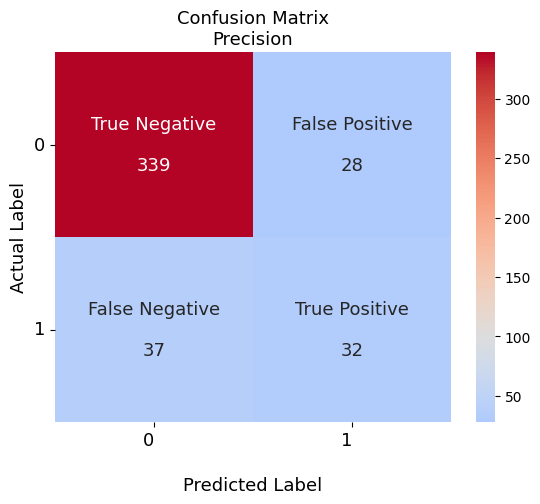

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Define names for confusion matrix elements
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Convert counts to string format
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]

# Create labels with counts and percentages
labels = [f'{v1}\n\n{v2}' for v1, v2 in zip(names, counts)]
labels = np.asarray(labels).reshape(2, 2)

# Create heatmap with annotations
heatmap = sns.heatmap(cm, annot=labels, annot_kws={'size': 13}, fmt='', cmap='coolwarm', center=100)

# Customize tick labels and rotations
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

# Set title, ylabel, and xlabel
plt.title(f'Confusion Matrix\nPrecision', fontsize=13, color='black')
plt.ylabel('Actual Label', fontsize=13)
plt.xlabel('\nPredicted Label', fontsize=13)

# Show the plot
plt.show()

In [ ]:
# menggunakan data awal
cost = 3  # asumsi cost per customer ($3)
revenue = 11  # asumsi revenue per customer ($11)
total_customer = 2240
total_response = 334
rate_accept = total_response/total_customer * 100
total_cost = total_customer * cost
total_revenue = total_response * revenue
total_profit = total_revenue - total_cost

profit_margin = (total_profit/total_revenue) * 100

print(f'total customer: {total_customer}')
print(f'total response: {total_response}')
print(f'rate accept: {rate_accept:.2f}%')
print(f'total cost: {total_cost}')
print(f'total revenue: {total_revenue}')
print(f'total profit: {total_profit}')
print(f'profit margin before pemodelan: {profit_margin:.2f}%')

total customer: 2240
total response: 334
rate accept: 14.91%
total cost: 6720
total revenue: 3674
total profit: -3046
profit margin before pemodelan: -82.91%


In [ ]:
# menggunakan data test - tanpa sample weight
cost = 3  # asumsi cost per customer ($3)
revenue = 11  # asumsi revenue per customer ($11)
total_customer = tp + fp
total_response = tp
rate_accept = total_response/total_customer * 100
total_cost = total_customer * cost
total_revenue = total_response * revenue
total_profit = total_revenue - total_cost

profit_margin = ((total_profit)/total_revenue) * 100

print(f'total customer: {total_customer}')
print(f'total response: {total_response}')
print(f'rate accept: {rate_accept:.2f}%')
print(f'total cost: {total_cost}')
print(f'total revenue: {total_revenue}')
print(f'total profit: {total_profit}')
print(f'profit margin after pemodelan: {profit_margin:.2f}%')

total customer: 60
total response: 32
rate accept: 53.33%
total cost: 180
total revenue: 352
total profit: 172
profit margin after pemodelan: 48.86%




*   Pada table confusion matrix terdapat nilai sample response dari customer  true positive sebanyak 32 dan false positive 28 customer .

*   Sebelum dilakukan modeling presentase response rate berada di angka 14.91% setelah dilakukan modeling response rate meningkat menjadi 53.33% ada peningkatan sebesar 38%.



*   Presentase Profit margin sebelum dilakukan pemodelan sebesar -82.91% setelah dilakukan pemodelan menggunakan data test presentase profit margin naik menjadi 48.86%.
  
*   Setelah dilakukan modeling cost campaign menjadi lebih efisien dikarenakan lebih targeted pada segment customer tertentu menjadi 180 dollar dari total customer yang benar benar meresponse campaign (true positive)dengan asumsi cost yang dikeluarkan 3 dollar untuk setiap customer dan revenue yang didapatkan $11/ customer.





### **5.2.2 Business Insights & Recommendation**

In [ ]:
# get clean data from data preprocessing based on selected features in modelling
data_train = pd.merge(data_before_transform_train[selected_features], y_train, left_index=True, right_index=True)
data_test = pd.merge(data_before_transform_test[selected_features], y_test, left_index=True, right_index=True)
data_clean = pd.concat([data_train,data_test])
data_clean['RFM_Cat'] = oe_rfm.inverse_transform(data_clean[['RFM_Cat']])
data_clean['Education'] = oe_edu.inverse_transform(data_clean[['Education']])
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084 entries, 0 to 435
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AcceptedCmp1         2084 non-null   int64 
 1   AcceptedCmp2         2084 non-null   int64 
 2   AcceptedCmp3         2084 non-null   int64 
 3   AcceptedCmp4         2084 non-null   int64 
 4   AcceptedCmp5         2084 non-null   int64 
 5   Customer_Lifespan    2084 non-null   int64 
 6   Education            2084 non-null   object
 7   MntFishProducts      2084 non-null   int64 
 8   MntFruits            2084 non-null   int64 
 9   MntGoldProds         2084 non-null   int64 
 10  MntSweetProducts     2084 non-null   int64 
 11  NumCatalogPurchases  2084 non-null   int64 
 12  NumWebPurchases      2084 non-null   int64 
 13  RFM_Cat              2084 non-null   object
 14  Recency              2084 non-null   int64 
 15  Response             2084 non-null   int64 
dtypes: int6

In [ ]:
data = data_clean.copy()
data.head()

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0             0             0             1             0             0   
1             0             0             0             0             0   
2             0             0             0             1             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Customer_Lifespan   Education  MntFishProducts  MntFruits  MntGoldProds  \
0                347  Graduation               12          8            13   
1                525      Master              151         15            15   
2                623         PhD                0          0            10   
3                418         PhD                0          0             2   
4                269  Graduation                2          4           321   

   MntSweetProducts  NumCatalogPurchases  NumWebPurchases       RFM_Cat  \
0                 2                    0                2  at risk cust   
1                38                    3                5    loyal cust   
2                 0                    4                3    loyal cust   
3                 0                    0                1  at risk cust   
4                 4                    0               25    loyal cust   

   Recency  Response  
0       49         0  
1       30         0  
2       59         0  
3       43         0  
4        0         0

In [ ]:
# 10 feature importance based on adaboost model (hyper parameter tuning)
importance_adb.nlargest(10)

NumWebPurchases        0.235
Education              0.175
RFM_Cat                0.125
NumCatalogPurchases    0.100
MntFishProducts        0.070
MntGoldProds           0.070
MntSweetProducts       0.055
Customer_Lifespan      0.050
Recency                0.050
MntFruits              0.030
dtype: float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


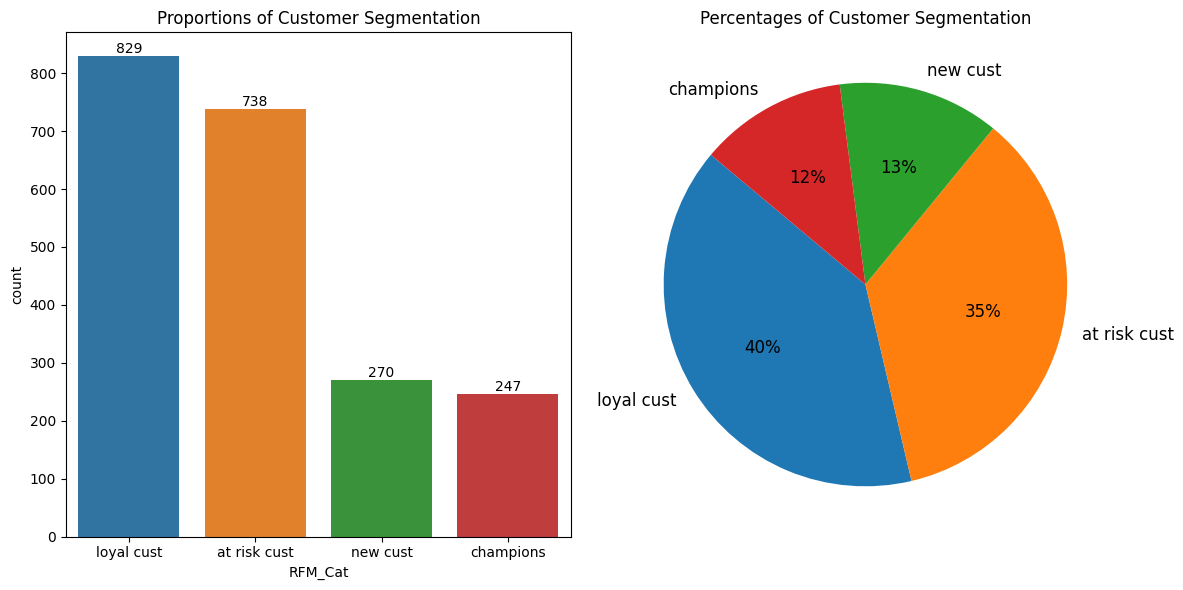

In [ ]:
# Menghitung frekuensi kategori dan mengurutkannya dari besar ke kecil
rfm_counts = data['RFM_Cat'].value_counts().sort_values(ascending=False)

# Membuat subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot countplot tanpa bingkai
sns.countplot(x=data['RFM_Cat'], order=rfm_counts.index,
              ax=axes[0], palette=sns.color_palette())
axes[0].set_title('Proportions of Customer Segmentation')

# Menambahkan nilai label pada countplot
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():0.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Plot pie plot
axes[1].pie(rfm_counts, labels=rfm_counts.index,
            autopct='%1.0f%%', startangle=140, textprops={'fontsize': 12, 'color': 'black'})
axes[1].set_title('Percentages of Customer Segmentation')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


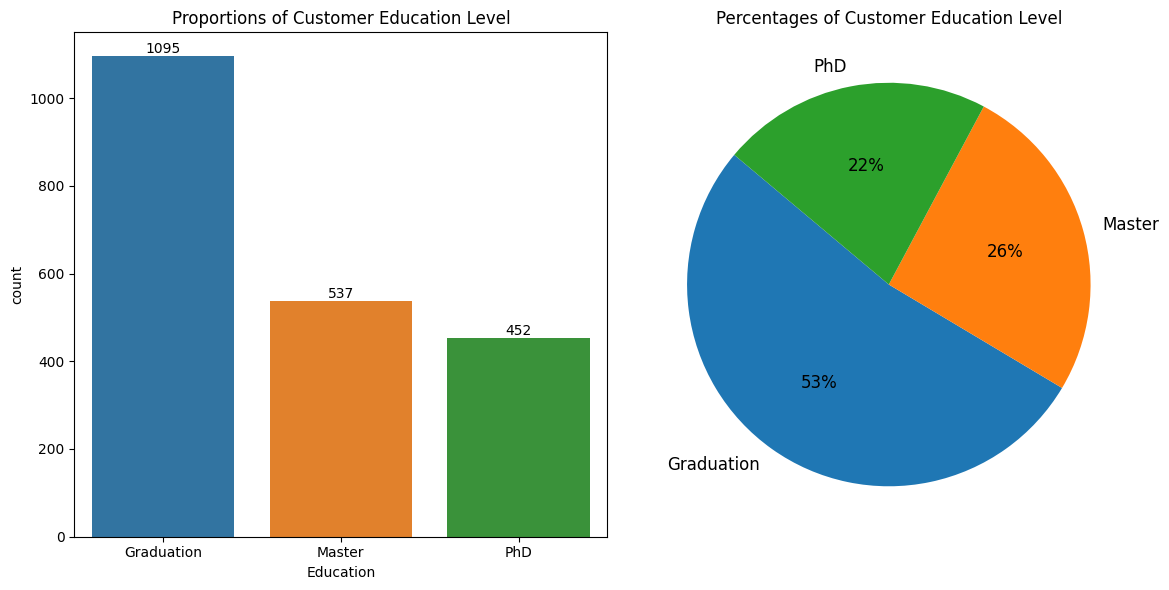

In [ ]:
# Menghitung frekuensi kategori dan mengurutkannya dari besar ke kecil
education_counts = data['Education'].value_counts().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x=data['Education'], order=education_counts.index, ax=axes[0], palette=sns.color_palette())
axes[0].set_title('Proportions of Customer Education Level')

for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():0.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Plot pie plot
axes[1].pie(education_counts, labels=education_counts.index, autopct='%1.0f%%', startangle=140, textprops={'fontsize': 12, 'color': 'black'})
axes[1].set_title('Percentages of Customer Education Level')

plt.tight_layout()
plt.show()

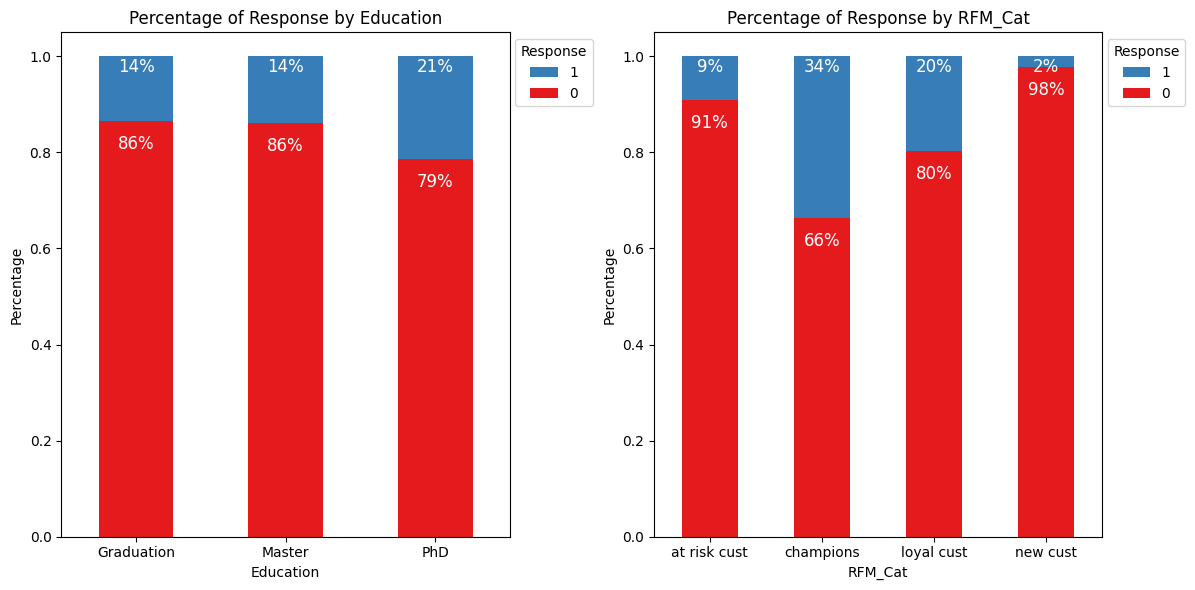

In [ ]:
# 'Education'
education_counts = data.groupby('Education')['Response'].value_counts(normalize=True).unstack()
colors = ['#e41a1c', '#377eb8']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

education_counts.plot(kind='bar', stacked=True, color=colors, ax=axes[0])
axes[0].set_title('Percentage of Response by Education')
axes[0].set_ylabel('Percentage')
axes[0].set_xticklabels(education_counts.index, rotation=0, ha='center')

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(reversed(handles), reversed(labels), bbox_to_anchor=(
    1.2, 1), loc='upper right', title='Response')

for p in axes[0].patches:
    if p.get_height() >= 0.5:
        vertical_position = 'bottom' if p.get_height() < 0.5 else 'top'
        axes[0].annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va=vertical_position, xytext=(0, 10 if p.get_height() < 0.5 else -10),
                         fontsize=12, color='white',
                         textcoords='offset points')
for p in axes[0].patches:
    if p.get_height() < 0.5:
        axes[0].annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., 1),
                         ha='center', va='top', xytext=(0, -1),
                         fontsize=12, color='white',
                         textcoords='offset points')

# 'RFM_Cat'
rfm_counts = data.groupby('RFM_Cat')['Response'].value_counts(normalize=True).unstack()
rfm_counts.plot(kind='bar', stacked=True, color=colors, ax=axes[1])
axes[1].set_title('Percentage of Response by RFM_Cat')
axes[1].set_ylabel('Percentage')
axes[1].set_xticklabels(rfm_counts.index, rotation=0, ha='center')

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(reversed(handles), reversed(labels), bbox_to_anchor=(
    1.2, 1), loc='upper right', title='Response')

for p in axes[1].patches:
    if p.get_height() >= 0.5:
        vertical_position = 'bottom' if p.get_height() < 0.5 else 'top'
        axes[1].annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va=vertical_position, xytext=(0, 10 if p.get_height() < 0.5 else -10),
                         fontsize=12, color='white',
                         textcoords='offset points')
for p in axes[1].patches:
    if p.get_height() <= 0.5:
        axes[1].annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., 1),
                         ha='center', va='top', xytext=(0, -1),
                         fontsize=12, color='white',
                         textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
# graduation education level
filter_graduation = (data['Education'] == 'Graduation') & (data['RFM_Cat'] == 'loyal cust') & (data['Response'] == 1)
filtered_data_graduation = data[filter_graduation][['Customer_Lifespan', 'Recency', 'NumCatalogPurchases', 'NumWebPurchases',
                                                    'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntSweetProducts']]

In [ ]:
from scipy.stats import t

confidence_level = 0.95

# Calculate confidence interval for each variable
print("Confidence Interval Mean of Customer in Graduation Education Level")
for column, values in filtered_data_graduation.items():
    sample_mean = np.mean(values)
    sample_std = np.std(values)
    degrees_of_freedom = len(values) - 1
    alpha = 1 - confidence_level
    t_value = t.ppf(1 - alpha / 2, df=degrees_of_freedom)
    margin_of_error = t_value * (sample_std / np.sqrt(len(values)))
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    print(
        f"Confidence Interval for {column}: ({lower_bound:.2f}, {upper_bound:.2f})")

Confidence Interval Mean of Customer in Graduation Education Level
Confidence Interval for Customer_Lifespan: (393.45, 494.46)
Confidence Interval for Recency: (32.72, 46.01)
Confidence Interval for NumCatalogPurchases: (4.07, 5.64)
Confidence Interval for NumWebPurchases: (4.77, 5.67)
Confidence Interval for MntFishProducts: (53.12, 86.67)
Confidence Interval for MntFruits: (39.56, 63.70)
Confidence Interval for MntGoldProds: (60.24, 92.58)
Confidence Interval for MntSweetProducts: (34.38, 58.68)


In [ ]:
# filter apriori
filter_apriori_graduation = (data['Education'] == 'Graduation') & (data['RFM_Cat'] == 'loyal cust') & (data['Response'] == 1)

# web - apriori
web_selling_graduation = data[filter_apriori_graduation][['NumWebPurchases', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntSweetProducts']]

# catalog - aprioroi
catalog_selling_graduation = data[filter_apriori_graduation][['NumCatalogPurchases', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntSweetProducts']]

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Encode data dalam format one-hot encoding
web_encoded_graduation = web_selling_graduation.astype(bool).astype(int)
catalog_encoded_graduation = catalog_selling_graduation.astype(bool).astype(int)

# Terapkan algoritma Apriori untuk menemukan item-item yang sering muncul bersama-sama
frequent_itemsets_web_graduation = apriori(web_encoded_graduation, min_support=0.1, use_colnames=True)
frequent_itemsets_catalog_graduation = apriori(catalog_encoded_graduation, min_support=0.1, use_colnames=True)

# Temukan association rules
rules_web_graduation = association_rules(frequent_itemsets_web_graduation, metric="lift", min_threshold=1)
rules_catalog_graduation = association_rules(frequent_itemsets_catalog_graduation, metric="lift", min_threshold=1)

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
pd.set_option('display.max_colwidth', 100)
frequent_itemsets_web_graduation[frequent_itemsets_web_graduation['itemsets'].apply(lambda x: 'NumWebPurchases' in x)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


support  \
0   1.000000   
5   0.897059   
6   0.926471   
7   0.955882   
8   0.823529   
15  0.852941   
16  0.882353   
17  0.794118   
18  0.882353   
19  0.794118   
20  0.808824   
25  0.838235   
26  0.764706   
27  0.779412   
28  0.779412   
30  0.750000   

                                                                         itemsets  
0                                                               (NumWebPurchases)  
5                                              (NumWebPurchases, MntFishProducts)  
6                                                    (MntFruits, NumWebPurchases)  
7                                                 (NumWebPurchases, MntGoldProds)  
8                                             (NumWebPurchases, MntSweetProducts)  
15                                  (MntFruits, NumWebPurchases, MntFishProducts)  
16                               (MntGoldProds, NumWebPurchases, MntFishProducts)  
17                           (MntSweetProducts, NumWebPurchases, MntFishProducts)  
18                                     (MntFruits, NumWebPurchases, MntGoldProds)  
19                                 (MntFruits, NumWebPurchases, MntSweetProducts)  
20                              (MntSweetProducts, NumWebPurchases, MntGoldProds)  
25                    (MntGoldProds, MntFruits, NumWebPurchases, MntFishProducts)  
26                (MntFruits, MntSweetProducts, NumWebPurchases, MntFishProducts)  
27             (MntGoldProds, MntSweetProducts, NumWebPurchases, MntFishProducts)  
28                   (MntFruits, MntSweetProducts, NumWebPurchases, MntGoldProds)  
30  (MntSweetProducts, NumWebPurchases, MntFishProducts, MntFruits, MntGoldProds)

In [ ]:
pd.set_option('display.max_colwidth', 100)
frequent_itemsets_catalog_graduation[frequent_itemsets_catalog_graduation['itemsets'].apply(lambda x: 'NumCatalogPurchases' in x)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


support  \
0   1.000000   
5   0.897059   
6   0.926471   
7   0.955882   
8   0.823529   
15  0.852941   
16  0.882353   
17  0.794118   
18  0.882353   
19  0.794118   
20  0.808824   
25  0.838235   
26  0.764706   
27  0.779412   
28  0.779412   
30  0.750000   

                                                                             itemsets  
0                                                               (NumCatalogPurchases)  
5                                              (NumCatalogPurchases, MntFishProducts)  
6                                                    (MntFruits, NumCatalogPurchases)  
7                                                 (NumCatalogPurchases, MntGoldProds)  
8                                             (NumCatalogPurchases, MntSweetProducts)  
15                                  (MntFruits, NumCatalogPurchases, MntFishProducts)  
16                               (MntGoldProds, NumCatalogPurchases, MntFishProducts)  
17                           (NumCatalogPurchases, MntSweetProducts, MntFishProducts)  
18                                     (MntFruits, NumCatalogPurchases, MntGoldProds)  
19                                 (MntFruits, NumCatalogPurchases, MntSweetProducts)  
20                              (NumCatalogPurchases, MntSweetProducts, MntGoldProds)  
25                    (MntGoldProds, MntFruits, NumCatalogPurchases, MntFishProducts)  
26                (MntFruits, NumCatalogPurchases, MntSweetProducts, MntFishProducts)  
27             (MntGoldProds, NumCatalogPurchases, MntSweetProducts, MntFishProducts)  
28                   (MntFruits, NumCatalogPurchases, MntSweetProducts, MntGoldProds)  
30  (MntSweetProducts, NumCatalogPurchases, MntFishProducts, MntFruits, MntGoldProds)

### **Business Insights**



*   Berdasarkan hasil analisa yang dilakukan dari feature importance dengan menggunakan adaboost modeling dan setelah dilakukan hyper parameter tuning untuk proporsi dari segmentasi customer RFM cat, kategori loyal customer menjadi proporsi terbanyak berada di angka 829 dengan presentase 40% dari total jumlah customer
*   Dari feature education, tingkat pendidikan graduation mendapatkan proporsi tertinggi sebesar 1095 customer  (53%) dari dari total jumlah customer


*   Response campaign berdasarkan tingkat pendidikan, customer dengan tingkat pendidikan Phd memberikan response paling banyak dari campaign yang diberikan dengan presentase sebesar 21%
Namun tingkat pendidikan ini hanya mencerminkan  22% dari proporsi total customer sehingga kurang memiliki dampak.
*   Response campaign berdasarkan Rfm Category, customer dengan kategori champions menjadi customer yang paling banyak memberikan response terhadap campaign dengan presentase sebesar 34%


*   Dilakukan filterisasi data untuk mengfokuskan pada segmentasi tingkat pendidikan graduation dengan kategori loyal customer , segmentasi pendidikan graduation dipilih dikarenakan proporsinya paling banyak (53%). Sehingga dapat memberikan dampak paling besar pada hasil modeling.

Dilakukan perhitungan confidence interval dengan tingkat kepercayaan 95% dan nilai rata-rata dari  cutomer dengan tingkat pendidikan graduation. Confidence interval memberikan gambaran tentang seberapa pasti kita dengan nilai rata-rata yang diestimasi dari sampel data. Berikut insight yang didapatkan :



*  Rata-rata periode sejak pembelian terakhir (Recency) adalah 32.72 hingga 46.01 hari. Ini menunjukkan bahwa sebagian pelanggan cukup aktif melakukan pembelian ulang.

*   Dapat disimpulkan bahwa dengan tingkat kepercayaan 95%, kita dapat yakin bahwa rata-rata rentang lifespan customer graduation berada di antara 393.45 dan 494.46 hari.




Pada hasil algoritma apriori melalui chanel pembelanjaan website dan catalogue dapat dilihat keterkaitan dan frekuensi untuk item yang dibeli secara bersamaan, fish product menjadi item yang sering dibeli dengan nilai support  89%. Dan ada beberapa item yang dibeli secara bersamaan melalui chanel penjualan.



*  Customer yang melakukan pembelian melalui chanel website dan catalogue cenderung juga membeli produk tertentu seperti MntFishProducts, MntFruits, MntGoldProds, dan MntSweetProducts

*  Informasi dari output apriori pada chanel pembelian bisa digunakan untuk placement produk apa saja yang akan di jual di website dan catalogue membuat paket penawaran yang mencakup  item-item yang  cenderung dibeli secara bersamaan (bundling).

Dengan strategi ini, perusahaan dapat meningkatkan penjualan lintas produk dan memberikan pengalaman berbelanja yang lebih terpersonalisasi kepada pelanggan.



















### **Business Recommendation**



*   Memberikan diskon harga pada produk terpilih (produk emas, ikan, makanan manis atau buah) untuk pembelian melalui website & katalog dengan tujuan meningkatkan ketertarikan pelanggan dan peningkatan penjualan.


*   Memberikan diskon harga pada produk terpilih (produk emas, ikan, makanan manis atau buah) untuk pembelian melalui website & katalog dengan tujuan meningkatkan ketertarikan pelanggan dan peningkatan penjualan.



*  Memberikan diskon harga pada produk terpilih (produk emas, ikan, makanan manis atau buah) untuk pembelian melalui website & katalog dengan tujuan meningkatkan ketertarikan pelanggan dan peningkatan penjualan.





